In [4]:
# the discrete case

import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

import numpy as np
import matplotlib.pyplot as plt

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def make_gmm(n_components=10, dim=2, seed=42,
             mean_range=(-5.0, 5.0), var_range=(0.05, 1.0),
             isotropic=True):
    """
    Build parameters for a Gaussian Mixture Model (GMM).

    - n_components: number of Gaussian centers (clusters)
    - dim: dimensionality (2 by default)
    - seed: RNG seed for reproducibility
    - mean_range: range for sampling means uniformly per dimension
    - var_range: range for sampling variances (sigma^2); used if isotropic=True
    - isotropic: if True, use scalar variance per component (sigma^2 * I).
                 if False, generate random full SPD covariances.

    Returns dict with keys: weights, means, covs, rng
    """
    rng = np.random.default_rng(seed)

    # Mixture weights (sum to 1)
    weights = rng.dirichlet(np.ones(n_components))

    # Means
    means = rng.uniform(mean_range[0], mean_range[1], size=(n_components, dim))

    # Covariances
    if isotropic:
        # One random variance per component (same across dimensions)
        variances = rng.uniform(var_range[0], var_range[1], size=n_components)
        covs = np.array([v * np.eye(dim) for v in variances])
    else:
        # Random full SPD covariances with average variance within var_range
        covs = []
        target_var = rng.uniform(var_range[0], var_range[1], size=n_components)
        for tvar in target_var:
            A = rng.normal(size=(dim, dim))
            C = A @ A.T + 1e-3 * np.eye(dim)  # SPD
            # Scale so average variance (trace/dim) matches tvar
            scale = tvar / (np.trace(C) / dim)
            covs.append(C * scale)
        covs = np.array(covs)

    return dict(weights=weights, means=means, covs=covs, rng=rng)

def sample_gmm(n_samples, weights, means, covs, rng=None):
    """
    Sample points from a GMM described by weights, means, covs.
    Returns (X, component_indices)
    """
    if rng is None:
        rng = np.random.default_rng()

    K = len(weights)
    dim = means.shape[1]

    # Choose component for each sample
    comps = rng.choice(K, size=n_samples, p=weights)

    # Draw samples
    X = np.empty((n_samples, dim))
    for k in range(K):
        idx = np.where(comps == k)[0]
        if idx.size > 0:
            X[idx] = rng.multivariate_normal(mean=means[k], cov=covs[k], size=idx.size)
    return X, comps

In [6]:
save_dataset = []

params = make_gmm(n_components=20, dim=2, seed=123, mean_range=(-6, 6), var_range=(0.2, 0.8), isotropic=True)
X, z = sample_gmm(n_samples=20000, **params)
train_data = X-X.min()
train_data = train_data/train_data.max()

save_dataset.append(train_data)

params = make_gmm(n_components=20, dim=2, seed=127, mean_range=(-6, 6), var_range=(0.2, 0.8), isotropic=True)
X, z = sample_gmm(n_samples=20000, **params)
train_data = X-X.min()
train_data = train_data/train_data.max()

save_dataset.append(train_data)

params = make_gmm(n_components=20, dim=2, seed=128, mean_range=(-6, 6), var_range=(0.2, 0.8), isotropic=True)
X, z = sample_gmm(n_samples=20000, **params)
train_data = X-X.min()
train_data = train_data/train_data.max()

save_dataset.append(train_data)

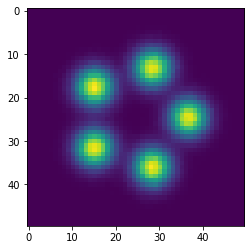

In [7]:
# Gaussian mixture 

import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns
# sns.set()  # for plot styling

# Number of samples
n_samples = 1000000

# Define the circle radius and angle for the 5 Gaussian mixtures
radius = 10
angles = np.linspace(0, 2 * np.pi, 6)[:-1]  # exclude the last angle because it's the same as the first

# Initialize an empty array for the samples
samples = np.empty((0, 2))

# Define mixing proportions
mixing_proportions = [0.2, 0.2, 0.2, 0.2, 0.2]  # equal proportions

# Initialize variances for each Gaussian distribution
variances = np.linspace(6, 6, 5)

# Create Gaussian mixtures
for angle, proportion, variance in zip(angles, mixing_proportions, variances):
    # Compute the mean of the Gaussian
    mean = radius * np.array([np.cos(angle), np.sin(angle)])

    # Covariance matrix of the Gaussian (diagonal for independent components)
    cov_matrix = np.diag([variance, variance])

    # Generate samples from the Gaussian distribution
    samples_gaussian = np.random.multivariate_normal(mean, cov_matrix, size=int(n_samples * proportion))

    # Append the generated samples to the main samples array
    samples = np.vstack([samples, samples_gaussian])

X_train = samples
X_train = X_train-X_train.min()
X_train = X_train/X_train.max()

np.random.shuffle(X_train)

# plt.figure(figsize=(3, 3))
# # Plot the Gaussian mixture
# plt.scatter(X_train[::1, 0], X_train[::1, 1], color='blue', alpha=0.5, s=1)
# plt.show()

# Define the range for both axes
axis_range = [(0, 1), (0, 1)]

# Define the number of bins
bins = 50

# Calculate the 2D histogram and return the matrix of histogram values
hist, xedges, yedges = np.histogram2d(X_train[:, 0], X_train[:, 1], bins=bins, range=axis_range, density=True)

# Normalize the histogram to make it a PDF
pdf = hist / np.sum(hist)
pdf = torch.from_numpy(pdf.T)

plt.imshow(pdf)
plt.show()

save_dataset.append(X_train[::10])

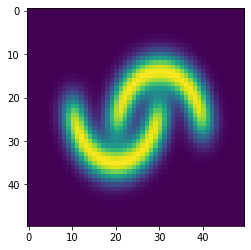

In [8]:
# two moon 

# producing matching results

# Neural Networks

X, y = make_moons(n_samples=100000000, noise=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

X_train = X_train-X_train.min(0)
X_train = X_train/X_train.max(0)

# Define the range for both axes
axis_range = [(0, 1), (0, 1)]

# Define the number of bins
bins = 50

# Calculate the 2D histogram and return the matrix of histogram values
hist, xedges, yedges = np.histogram2d(X_train[:, 0], X_train[:, 1], bins=bins, range=axis_range, density=True)

# Normalize the histogram to make it a PDF
pdf = hist / np.sum(hist)
pdf = torch.from_numpy(pdf.T)

plt.imshow(pdf)
plt.show()

save_dataset.append(X_train[:100000])

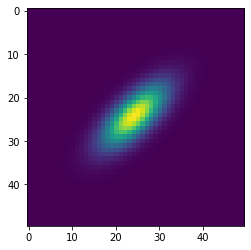

In [9]:
def generate_gaussian_data(n_samples=100000, mean=[0, 0], std_dev=[1, 1], rho=0):
    # Calculate the covariance using rho
    covariance = rho * std_dev[0] * std_dev[1]
    cov_matrix = [[std_dev[0]**2, covariance], [covariance, std_dev[1]**2]]
    
    # Sample from the multivariate Gaussian
    data = np.random.multivariate_normal(mean, cov_matrix, n_samples)
    data = data-data.min()
    data = data/data.max()

    return data

data = generate_gaussian_data(10000000, rho=-0.7)
data = data-data.mean(0)
data = data/data.max(0)
X_train = data

X_train = X_train-X_train.min()
X_train = X_train/X_train.max()

# plt.figure(figsize=(3, 3))
# plt.scatter(X_train[::1, 0], X_train[::1, 1], s=1, color='blue')
# plt.show()

# Define the range for both axes
axis_range = [(0, 1), (0, 1)]

# Define the number of bins
bins = 50

# Calculate the 2D histogram and return the matrix of histogram values
hist, xedges, yedges = np.histogram2d(X_train[:, 0], X_train[:, 1], bins=bins, range=axis_range, density=True)

# Normalize the histogram to make it a PDF
pdf = hist / np.sum(hist)
pdf = torch.from_numpy(pdf.T)

plt.imshow(pdf)
plt.show()

save_dataset.append(X_train[:100000])

In [10]:
def get_cost_nd():
    mean = decoded[:, :data_dim*center_dim].reshape(-1, center_dim, data_dim).permute(1, 0, 2)
    var = decoded[:, data_dim*center_dim:data_dim*center_dim*2].reshape(-1, center_dim, data_dim).permute(1, 0, 2)
    weights = decoded[:, data_dim*center_dim*2:data_dim*center_dim*2+center_dim].reshape(-1, center_dim, 1).permute(1, 0, 2).mean(-1)
    weight_multiple = weights.unsqueeze(1)*weights.unsqueeze(0)
    
    # decoder # difference for each sample
    L2 = ((mean.unsqueeze(1) - mean.unsqueeze(0))**2)
    L2_DATA = ((mean - batch_data.unsqueeze(0))**2)

    var_sum = (var.unsqueeze(1) + var.unsqueeze(0))
    var_data = var + var_noise
    #     var_data = var

    gauss_cross = torch.exp(-(L2/(2*var_sum)).sum(-1))
    gauss_cross = gauss_cross*(1/var_sum.prod(-1).sqrt())
#     gauss_cross = gauss_cross*(1/((2*np.pi)**(data_dim/2)))
#     gauss_cross = gauss_cross*(1/(2*np.pi*(var_sum.prod(-1).sqrt())))
#     gauss_cross = gauss_cross*(1/(((2*np.pi)**(data_dim/2))*var_sum.sqrt().prod(-1)))
    
    gauss_data = torch.exp(-(L2_DATA/(2*var_data)).sum(-1))
    gauss_data = gauss_data*(1/var_data.prod(-1).sqrt())
#     gauss_data = gauss_data*(1/((2*np.pi)**(data_dim/2)))

#     gauss_data = gauss_data*(1/(2*np.pi*(var_data.prod(-1).sqrt())))
#     gauss_data = gauss_data*(1/(((2*np.pi)**(data_dim/2))*var_data.sqrt().prod(-1)))

    gauss_cross = weight_multiple*gauss_cross
    gauss_data = weights*gauss_data

    numerator = gauss_data.mean()
    denominator = gauss_cross.mean()

    error = -(numerator**2)/(denominator)
#     error = error*(1/((2*np.pi)**(data_dim/2)))
    return error

class decoder(nn.Module):
    def __init__(self, input_dim = 784, HIDDEN = 2000, out_dim = 200):
        super(decoder, self).__init__()
        self.dim = out_dim
    
        self.fc1 = nn.Linear(input_dim+50, HIDDEN, bias=True)
#         self.fc1 = nn.Linear(input_dim, HIDDEN, bias=True)
        self.bn1 = torch.nn.BatchNorm1d(HIDDEN)
        self.fc2 = nn.Linear(HIDDEN, HIDDEN, bias=True)
        self.bn2 = torch.nn.BatchNorm1d(HIDDEN)
        self.fc3 = nn.Linear(HIDDEN, HIDDEN, bias=True)
        self.bn3 = torch.nn.BatchNorm1d(HIDDEN)
        self.fc4 = nn.Linear(HIDDEN, HIDDEN, bias=True)
        self.bn4 = torch.nn.BatchNorm1d(HIDDEN)
        self.fc6 = nn.Linear(HIDDEN, HIDDEN, bias=True)
        self.bn6 = torch.nn.BatchNorm1d(HIDDEN)
        self.fc7 = nn.Linear(HIDDEN, HIDDEN, bias=True)
        self.bn7 = torch.nn.BatchNorm1d(HIDDEN)

        self.fc8 = nn.Linear(HIDDEN, HIDDEN, bias=True)
        self.bn8 = torch.nn.BatchNorm1d(HIDDEN)
        self.fc9 = nn.Linear(HIDDEN, HIDDEN, bias=True)
        self.bn9 = torch.nn.BatchNorm1d(HIDDEN)

        self.fc5 = nn.Linear(HIDDEN, out_dim, bias=True)

    def forward(self, x):
        
        x = torch.cat((x, torch.zeros((x.shape[0], 50)).uniform_().cuda()), 1)
        
        x = torch.relu(self.bn1((self.fc1(x))))
        x = torch.relu(self.bn2((self.fc2(x))))
        x = torch.relu(self.bn3((self.fc3(x))))
        x = torch.relu(self.bn4((self.fc4(x))))
        x = torch.relu(self.bn6((self.fc6(x))))
        x = torch.relu(self.bn7((self.fc7(x))))
        x = torch.relu(self.bn8((self.fc8(x))))
        x = torch.relu(self.bn9((self.fc9(x))))

        x = torch.sigmoid(self.fc5(x))

        return x
    
class encoder(nn.Module):
    def __init__(self, input_dim = 784, HIDDEN = 2000, out_dim = 200):
        super(encoder, self).__init__()
        self.dim = out_dim
    
        self.fc1 = nn.Linear(input_dim+50, HIDDEN, bias=True)
#         self.fc1 = nn.Linear(input_dim, HIDDEN, bias=True)
        self.bn1 = torch.nn.BatchNorm1d(HIDDEN)
        self.fc2 = nn.Linear(HIDDEN, HIDDEN, bias=True)
        self.bn2 = torch.nn.BatchNorm1d(HIDDEN)
        self.fc3 = nn.Linear(HIDDEN, HIDDEN, bias=True)
        self.bn3 = torch.nn.BatchNorm1d(HIDDEN)
        self.fc4 = nn.Linear(HIDDEN, HIDDEN, bias=True)
        self.bn4 = torch.nn.BatchNorm1d(HIDDEN)
        self.fc6 = nn.Linear(HIDDEN, HIDDEN, bias=True)
        self.bn6 = torch.nn.BatchNorm1d(HIDDEN)
        self.fc7 = nn.Linear(HIDDEN, HIDDEN, bias=True)
        self.bn7 = torch.nn.BatchNorm1d(HIDDEN)
        
        self.fc8 = nn.Linear(HIDDEN, HIDDEN, bias=True)
        self.bn8 = torch.nn.BatchNorm1d(HIDDEN)
        self.fc9 = nn.Linear(HIDDEN, HIDDEN, bias=True)
        self.bn9 = torch.nn.BatchNorm1d(HIDDEN)

        self.fc5 = nn.Linear(HIDDEN, out_dim, bias=True)

    def forward(self, x):
        
        x = torch.cat((x, torch.zeros((x.shape[0], 50)).uniform_().cuda()), 1)
        
        x = torch.relu(self.bn1((self.fc1(x))))
        x = torch.relu(self.bn2((self.fc2(x))))
        x = torch.relu(self.bn3((self.fc3(x))))
        x = torch.relu(self.bn4((self.fc4(x))))
        x = torch.relu(self.bn6((self.fc6(x))))
        x = torch.relu(self.bn7((self.fc7(x))))
        x = torch.relu(self.bn8((self.fc8(x))))
        x = torch.relu(self.bn9((self.fc9(x))))

        x = torch.sigmoid(self.fc5(x))

        return x 

0 1 0 0.5703209474780463 4.685941696166992


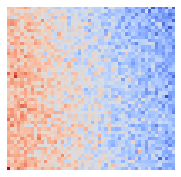

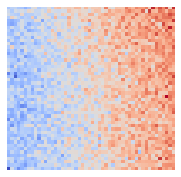

0 1 100 3.6821146075467803 15.710088729858398
0 1 200 8.555147677184172 17.17239761352539
0 1 300 11.450118196306704 19.258691787719727
0 1 400 13.339886436074865 20.904083251953125
0 1 500 15.363703664929734 22.352832794189453
0 1 600 16.390242848123297 23.377193450927734
0 1 700 17.43775344414447 24.01398468017578
0 1 800 18.296651250093387 24.386804580688477
0 1 900 20.170068320552502 24.85683822631836
0 1 1000 23.32782201998229 24.981584548950195


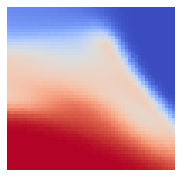

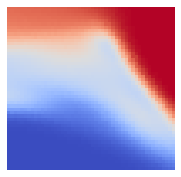

0 1 1100 23.719674526125367 25.157957077026367
0 1 1200 24.39212213167524 25.83733558654785
0 1 1300 24.5877363209927 26.00075340270996
0 1 1400 24.67058499780514 26.30208969116211
0 1 1500 24.906833044968877 26.430423736572266
0 1 1600 24.914108866036738 26.729717254638672
0 1 1700 25.221315596705754 26.897361755371094
0 1 1800 25.34184020410791 26.861791610717773
0 1 1900 25.629298277592735 27.241107940673828
0 1 2000 25.84425070561626 27.368144989013672


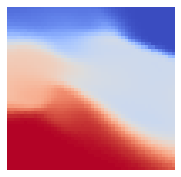

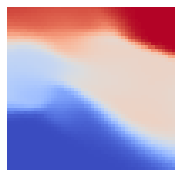

0 1 2100 25.56547941849984 27.21564292907715
0 1 2200 26.124998801260467 27.403078079223633
0 1 2300 25.70627481310274 27.390636444091797
0 1 2400 26.163126435027294 27.410581588745117
0 1 2500 25.859742181781776 27.532251358032227
0 1 2600 25.996773383242093 27.828243255615234
0 1 2700 26.281730089670877 27.625459671020508
0 1 2800 26.351384662390632 27.839252471923828
0 1 2900 26.262705128974744 28.05084991455078
0 1 3000 26.5696835795435 27.73123550415039


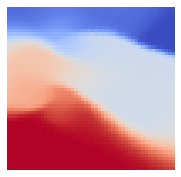

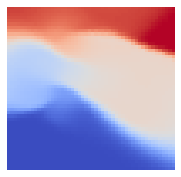

0 1 3100 26.334100944586904 27.913618087768555
0 1 3200 26.448668412776957 27.974750518798828
0 1 3300 26.756807691940654 27.937028884887695
0 1 3400 26.660286494229666 28.010175704956055
0 1 3500 26.62098346079767 28.365346908569336
0 1 3600 26.546654003045997 27.943071365356445
0 1 3700 26.804753798530363 28.157390594482422
0 1 3800 26.592460590823695 28.21147346496582
0 1 3900 26.620483187386462 28.271902084350586
0 1 4000 26.646854395989898 28.085020065307617


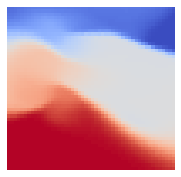

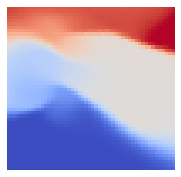

0 1 4100 26.988006863269916 28.317989349365234
0 1 4200 26.77012079310688 28.156396865844727
0 1 4300 26.953687135856363 28.31365394592285
0 1 4400 26.872997405949576 28.36444854736328
0 1 4500 26.895058006276827 28.465585708618164
0 1 4600 26.868079669747164 28.3060245513916
0 1 4700 27.21369088451737 28.3217716217041
0 1 4800 26.980468762937928 28.58194351196289
0 1 4900 26.63602566229778 28.40659523010254
0 1 5000 27.276667050048665 28.24746322631836


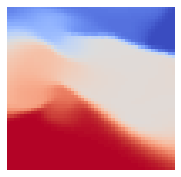

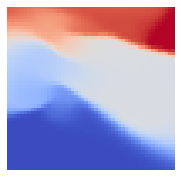

0 1 5100 26.742426045624274 28.269325256347656
0 1 5200 27.19907124405391 28.426877975463867
0 1 5300 27.385427946752316 28.697175979614258
0 1 5400 27.32781150655372 28.465198516845703
0 1 5500 27.219176892458723 28.204015731811523
0 1 5600 27.300296468937276 28.602262496948242
0 1 5700 26.879867665562717 28.624309539794922
0 1 5800 27.473847629415783 28.62734031677246
0 1 5900 27.036929231564997 28.4003849029541
0 1 6000 27.35858074985472 28.747636795043945


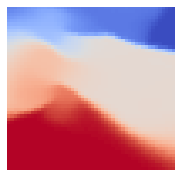

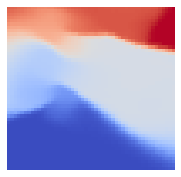

0 1 6100 27.591081603457805 28.560710906982422
0 1 6200 27.0423399556435 28.608932495117188
0 1 6300 27.119212065150194 28.650840759277344
0 1 6400 26.978887801818043 28.55634880065918
0 1 6500 27.149325610290873 28.410429000854492
0 1 6600 27.585170605968095 28.60899543762207
0 1 6700 27.356429088484184 28.503557205200195
0 1 6800 27.31475582762821 28.618152618408203
0 1 6900 27.227351262857393 28.47879981994629
0 1 7000 27.532991603476756 28.619613647460938


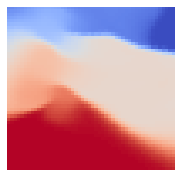

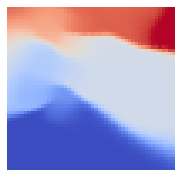

0 1 7100 27.322735917090494 28.536376953125
0 1 7200 27.279530265348733 28.472017288208008
0 1 7300 27.5098381728823 28.63920783996582
0 1 7400 27.151326703935705 28.464445114135742
0 1 7500 27.29076941751898 28.578353881835938
0 1 7600 27.441749990212205 28.573862075805664
0 1 7700 27.4321695115364 28.802412033081055
0 1 7800 27.535541540766893 28.574752807617188
0 1 7900 27.453006141964387 28.767444610595703
0 1 8000 27.312796018682363 28.986587524414062


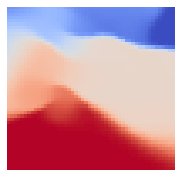

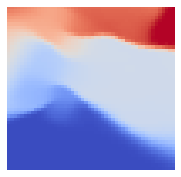

0 1 8100 27.661523013969944 28.69257354736328
0 1 8200 27.514857906576317 28.524032592773438
0 1 8300 27.532816750634 28.6406192779541
0 1 8400 27.63504495085149 28.664949417114258
0 1 8500 27.60927844166257 28.67786979675293
0 1 8600 27.669299108449014 28.461931228637695
0 1 8700 27.346965178370215 28.698959350585938
0 1 8800 27.641968637722144 28.569740295410156
0 1 8900 27.73682144789187 28.81456756591797
0 1 9000 27.744595113859233 28.674518585205078


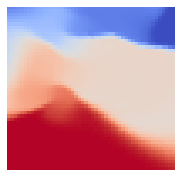

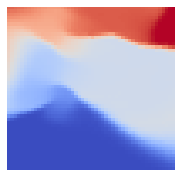

0 1 9100 27.81748689268161 28.913286209106445
0 1 9200 27.656190002265998 28.806798934936523
0 1 9300 27.63719418371032 28.66988182067871
0 1 9400 27.67419498804608 28.72565269470215
0 1 9500 27.452522868135112 28.742767333984375
0 1 9600 27.841716153961332 28.554819107055664
0 1 9700 27.50450273266665 28.793752670288086
0 1 9800 27.375500190902713 28.66396141052246
0 1 9900 27.761861832081028 28.79559898376465
0 1 10000 27.497056915779446 28.941415786743164


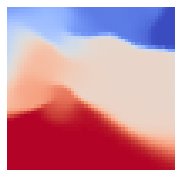

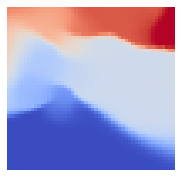

0 1 10100 27.570703961742044 28.755006790161133
0 1 10200 27.616675688315677 28.671443939208984
0 1 10300 27.834294622191177 28.910743713378906
0 1 10400 27.818026022280097 28.7913875579834
0 1 10500 27.63598235636958 28.4608211517334
0 1 10600 27.96221647624644 29.010149002075195
0 1 10700 27.59225457461127 28.700298309326172
0 1 10800 27.48675031210388 28.632692337036133
0 1 10900 27.75723794579491 29.0246524810791
0 1 11000 27.441749990212205 28.689556121826172


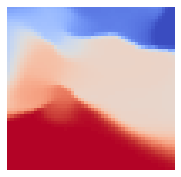

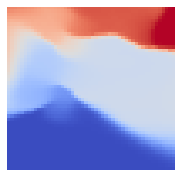

0 1 11100 27.535407972623123 28.791065216064453
0 1 11200 27.52446752739258 28.922311782836914
0 1 11300 27.868400640574702 28.840578079223633
0 1 11400 27.946120300666404 28.853425979614258
0 1 11500 27.88589321038505 28.87802505493164
0 1 11600 27.756353967534327 28.9006290435791
0 1 11700 27.76220668074312 28.831464767456055
0 1 11800 27.609616004789554 28.814224243164062
0 1 11900 28.069758260074234 29.132287979125977
0 1 12000 27.52690575314429 28.74997901916504


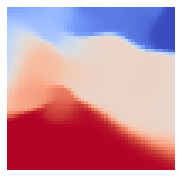

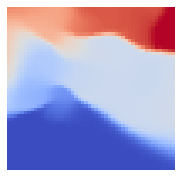

0 1 12100 27.81827130196229 28.728853225708008
0 1 12200 27.754700151063297 28.882190704345703
0 1 12300 27.741520618040838 28.730701446533203
0 1 12400 27.907244685294472 28.881370544433594
0 1 12500 27.801305719191905 28.812667846679688
0 1 12600 27.936051691137916 28.635129928588867
0 1 12700 27.8426438454326 28.72003173828125
0 1 12800 27.816323635574967 28.722124099731445
0 1 12900 28.065488936497033 28.809682846069336
0 1 13000 27.80421993323778 28.964033126831055


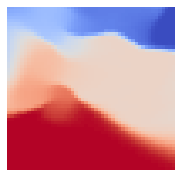

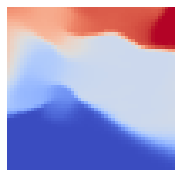

0 1 13100 27.967658770977106 28.94427490234375
0 1 13200 28.000577247136935 28.766366958618164
0 1 13300 27.857994467919234 28.913618087768555
0 1 13400 27.74928942698479 28.74608039855957
0 1 13500 27.468876465955866 28.852550506591797
0 1 13600 27.99077820240769 28.59831428527832
0 1 13700 27.780284521874346 28.850940704345703
0 1 13800 28.07041152972285 28.864980697631836
0 1 13900 27.877609556959655 28.730985641479492
0 1 14000 27.816226495106772 28.848814010620117


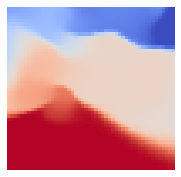

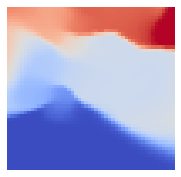

0 1 14100 27.86991360336685 28.80196762084961
0 1 14200 27.708480716295764 28.794057846069336
0 1 14300 27.56200746132682 28.75663948059082
0 1 14400 28.03162091226059 28.77037811279297
0 1 14500 27.508589917865987 28.763736724853516
0 1 14600 27.720722843800132 28.854625701904297
0 1 14700 27.664786933701322 28.92845344543457
0 1 14800 27.547001687502284 28.901813507080078
0 1 14900 27.86717909918714 28.827674865722656
0 1 15000 27.816794766845714 28.764873504638672


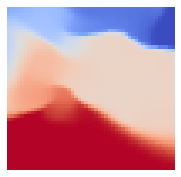

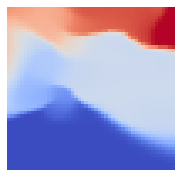

0 1 15100 27.990338641789105 28.870946884155273
0 1 15200 27.60336744417286 28.760595321655273
0 1 15300 27.694764482186525 29.11984634399414
0 1 15400 27.761383415275162 29.04253578186035
0 1 15500 28.02100103057509 28.89468765258789
0 1 15600 27.508174642364448 28.847530364990234
0 1 15700 27.71878246294792 28.831321716308594
0 1 15800 27.975842855422595 29.09164047241211
0 1 15900 27.92613364933513 28.818017959594727
0 1 16000 27.723850766876033 29.039188385009766


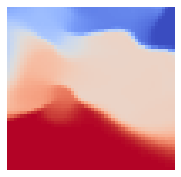

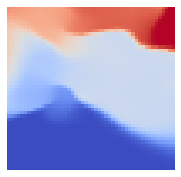

0 1 16100 27.927462045237707 29.05489730834961
0 1 16200 27.748101884761102 29.00812339782715
0 1 16300 27.782591607993997 28.87027359008789
0 1 16400 27.81186488808478 28.617218017578125
0 1 16500 27.923877561961287 28.978792190551758
0 1 16600 27.761366415693228 29.119218826293945
0 1 16700 27.691915837956685 28.867719650268555
0 1 16800 27.792674788592713 29.00953483581543
0 1 16900 28.096593314413305 28.837797164916992
0 1 17000 27.90546215770308 28.85356903076172
0 1 17600 28.127262988734405 28.881797790527344
0 1 17700 27.59200686641737 28.713817596435547
0 1 17800 27.56241787980495 28.82758331298828
0 1 17900 28.088013382559918 29.069406509399414
0 1 18000 28.193367077341605 29.052873611450195


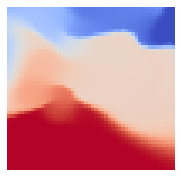

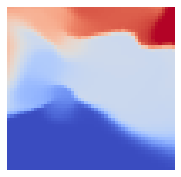

0 1 18100 28.341724857393544 29.212846755981445
0 1 18200 27.67335715150789 28.90684700012207
0 1 18300 27.95920997875578 29.168067932128906
0 1 18400 28.11108667226811 28.867263793945312
0 1 18500 28.299228331069614 28.870258331298828
0 1 18600 28.332083665925115 29.013853073120117
0 1 18700 27.949563930263945 28.99820327758789
0 1 18800 27.94154741312609 28.80837631225586
0 1 18900 28.0511801455318 28.778228759765625
0 1 19000 28.16235741138182 28.989952087402344


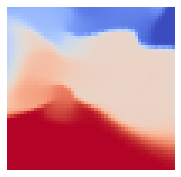

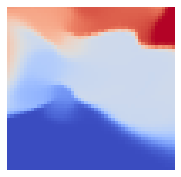

0 1 19100 27.885494934465445 29.012826919555664
0 1 19200 27.783830148963492 29.077537536621094
0 1 19300 27.92072778228004 28.942094802856445
0 1 19400 28.080742418515467 28.988445281982422
0 1 19500 27.386251212220277 28.88802719116211
0 1 19600 27.798969490931796 29.029861450195312
0 1 19700 28.015371740443147 28.867639541625977
0 1 19800 27.971167970390677 28.697839736938477
0 1 19900 27.766874280239925 28.908527374267578
0 1 20000 27.759338608419643 29.044208526611328


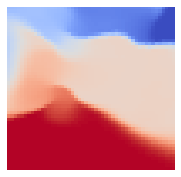

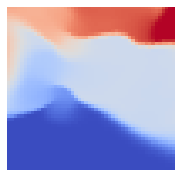

0 3 0 0.5118839359416636 4.68605375289917


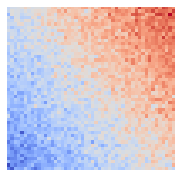

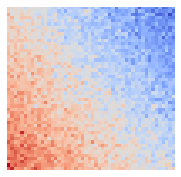

0 3 100 4.098212160295662 16.249528884887695
0 3 200 13.005798509344382 18.766185760498047
0 3 300 16.200737579999497 19.964990615844727
0 3 400 18.241379537945868 21.139842987060547
0 3 500 19.689617636135647 22.19461441040039
0 3 600 20.59273985448653 22.767810821533203
0 3 700 21.76130811622908 23.58594512939453
0 3 800 22.21735590077931 24.255502700805664
0 3 900 23.259852834385732 24.56522560119629
0 3 1000 23.659007875225424 25.66140365600586


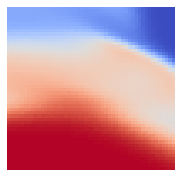

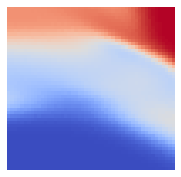

0 3 1100 23.886068862609548 25.800121307373047
0 3 1200 24.69248045933646 26.25663185119629
0 3 1300 25.262036880973408 26.678478240966797
0 3 1400 25.304839399772156 26.884435653686523
0 3 1500 25.3857064110334 26.94396209716797
0 3 1600 25.759935207734067 27.295028686523438
0 3 1700 25.88205534732634 27.21285057067871
0 3 1800 25.98901914536837 27.362030029296875
0 3 1900 26.04092129752535 27.62154769897461
0 3 2000 26.004185200965427 27.499635696411133


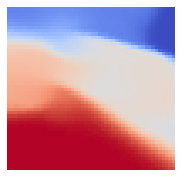

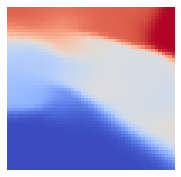

0 3 2100 26.01408624318628 27.299297332763672
0 3 2200 26.48815358458682 27.800695419311523
0 3 2300 26.37010848763536 27.784639358520508
0 3 2400 26.499582160670048 27.989198684692383
0 3 2500 26.678587758437743 27.811132431030273
0 3 2600 26.82302349208628 28.02847671508789
0 3 2700 26.777641893856934 28.26883316040039
0 3 2800 26.37925426271599 27.984336853027344
0 3 2900 26.778744438170957 28.262636184692383
0 3 3000 27.415604633197322 28.142410278320312


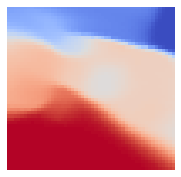

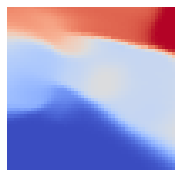

0 3 3100 27.177331207271703 28.176799774169922
0 3 3200 26.984308239943363 28.500131607055664
0 3 3300 27.364931307963015 28.344528198242188
0 3 3400 27.383443852689417 28.31252098083496
0 3 3500 27.48269955458012 28.541976928710938
0 3 3600 27.368185513647575 28.534757614135742
0 3 3700 27.495094678321895 28.426258087158203
0 3 3800 27.22948349613429 28.656049728393555
0 3 3900 27.67174461973584 28.390316009521484
0 3 4000 27.635994498928106 28.417787551879883


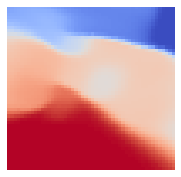

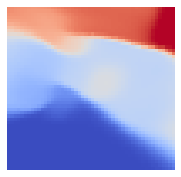

0 3 4100 27.63201173973208 28.501901626586914
0 3 4200 27.67928272006783 28.621044158935547
0 3 4300 27.501394237684387 28.7220516204834
0 3 4400 27.163318694734468 28.559953689575195
0 3 4500 27.517713836341272 28.782756805419922
0 3 4600 27.752509633505483 28.658588409423828
0 3 4700 27.70207187390655 28.64811134338379
0 3 4800 27.657826819155098 28.790725708007812
0 3 4900 27.819871691175816 28.434812545776367
0 3 5000 27.593344976366765 28.62582015991211


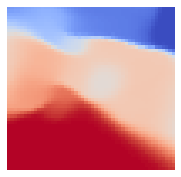

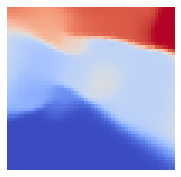

0 3 5100 28.074680853300052 28.655357360839844
0 3 5200 27.69393393118345 28.631027221679688
0 3 5300 28.050876581568687 29.042530059814453
0 3 5400 28.099070396352296 28.815685272216797
0 3 5500 27.998901574060557 28.534807205200195
0 3 5600 27.99612821369357 28.692535400390625
0 3 5700 28.001694362521185 28.481252670288086
0 3 5800 27.931167954099376 28.838632583618164
0 3 5900 27.927486330354757 28.460264205932617
0 3 6000 27.634551962975397 28.617647171020508


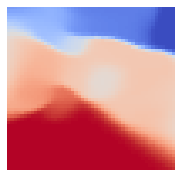

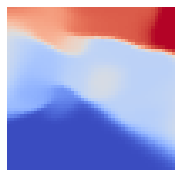

0 3 6100 27.597973719676293 28.56865882873535
0 3 6200 28.01731940683047 28.533937454223633
0 3 6300 27.80601217487599 28.75811195373535
0 3 6400 27.713726301578333 28.747169494628906
0 3 6500 28.09152258197349 28.744613647460938
0 3 6600 27.983461096640845 28.838987350463867
0 3 6700 27.843748818258327 28.886974334716797
0 3 6800 27.966225949071216 28.93641471862793
0 3 6900 27.646988371416157 28.50033187866211
0 3 7000 28.3426962620755 28.907167434692383


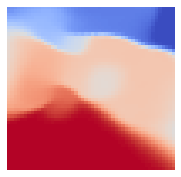

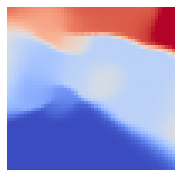

0 3 7100 28.227334670557948 28.872833251953125
0 3 7200 28.074413717012515 28.757503509521484
0 3 7300 28.33346063206179 28.974842071533203
0 3 7400 28.104850254209943 28.844255447387695
0 3 7500 28.1080534611487 28.777841567993164
0 3 7600 28.16771713671452 28.869579315185547
0 3 7700 28.022717988350447 28.82366371154785
0 3 7800 28.164781066063306 29.014732360839844
0 3 7900 28.488732384937563 28.727216720581055
0 3 8000 28.145017837808883 28.49665069580078


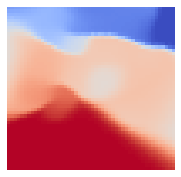

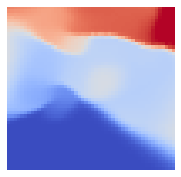

0 3 8100 28.494762379500813 28.808469772338867
0 3 8200 28.095942473276395 28.900615692138672
0 3 8300 27.78685121752438 28.93547821044922
0 3 8400 28.197019558945765 28.915569305419922
0 3 8500 28.195521167223845 28.991802215576172
0 3 8600 28.208824554343252 29.09895133972168
0 3 8700 28.2832924372621 28.58844566345215
0 3 8800 28.125281323183213 29.008689880371094
0 3 8900 28.145248546420845 28.759498596191406
0 3 9000 28.16811784114583 28.835243225097656


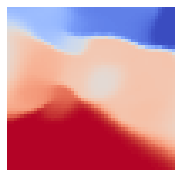

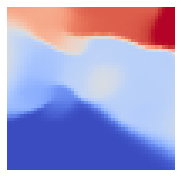

0 3 9100 28.30981178507954 28.768173217773438
0 3 9200 28.23602388543806 28.824913024902344
0 3 9300 28.125798596176356 28.94376564025879
0 3 9400 28.242673150486056 28.835857391357422
0 3 9500 28.010779424809193 29.04338836669922
0 3 9600 28.558957657907964 28.93885040283203
0 3 9700 28.443916629935458 28.9980525970459
0 3 9800 28.30329608817531 28.979978561401367
0 3 9900 28.053817509243313 28.865535736083984
0 3 10000 28.264330617870296 28.95848274230957


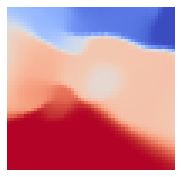

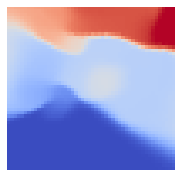

0 3 10100 28.521259870712903 29.112781524658203
0 3 10200 28.470421406682664 28.957141876220703
0 3 10300 28.69923335100602 29.03676414489746
0 3 10400 28.144998409715242 28.832630157470703
0 3 10500 28.201959151753517 28.938474655151367
0 3 10600 28.33169753256404 29.014577865600586
0 3 10700 28.43208492090922 28.772382736206055
0 3 10800 28.173035577348237 29.153606414794922
0 3 10900 28.456107758694024 29.070716857910156
0 3 11000 28.59174985145914 28.97568130493164


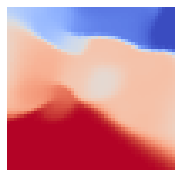

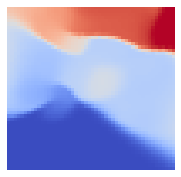

0 3 11100 28.397048782542722 29.168203353881836
0 3 11200 28.807986962174557 29.00263214111328
0 3 11300 28.29602998115427 28.968029022216797
0 3 11400 28.547405227727786 28.9930477142334
0 3 11500 28.541236807997358 29.09585952758789
0 3 11600 28.257715351986164 28.979564666748047
0 3 11700 28.64006266331629 28.954803466796875
0 3 11800 28.710504073828428 28.938493728637695
0 3 11900 28.452787983193435 28.972394943237305
0 3 12000 28.46440841170135 28.797060012817383


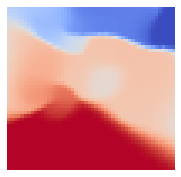

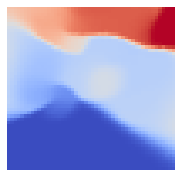

0 3 12100 28.797444792863615 28.843454360961914
0 3 12200 28.582669646194546 28.944252014160156
0 3 12300 28.451522728595187 28.804609298706055
0 3 12400 28.493786117795445 28.978153228759766
0 3 12500 28.371284701865505 29.182281494140625
0 3 12600 28.358255736568754 28.9853515625
0 3 12700 28.702249562543496 28.78557586669922
0 3 12800 28.32573310781682 28.867204666137695
0 3 12900 28.344505503295647 29.00227165222168
0 3 13000 28.387334735723147 29.12751579284668


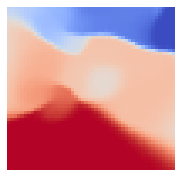

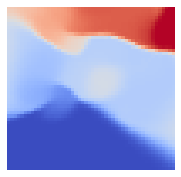

0 3 13100 28.508918174228636 29.183881759643555
0 3 13200 28.190814711539762 29.102027893066406
0 3 13300 28.673112279108185 29.155712127685547
0 3 13400 28.425634793821022 29.19182014465332
0 3 13500 28.528528406245652 29.39813232421875
0 3 13600 28.56199815456249 29.061256408691406
0 3 13700 28.14148921030167 28.97113800048828
0 3 13800 28.40112868220694 29.140623092651367
0 3 13900 28.90621297510238 29.057615280151367
0 3 14000 28.452481990718617 29.195653915405273


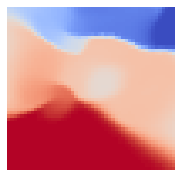

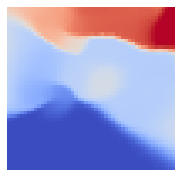

0 3 14100 28.500272672559216 29.089740753173828
0 3 14200 28.46262102708655 29.185544967651367
0 3 14300 28.382242146677985 29.023366928100586
0 3 14400 28.706178894482015 29.144906997680664
0 3 14500 28.685602114806453 29.11688995361328
0 3 14600 28.574337422535056 28.960086822509766
0 3 14700 28.84127457211353 29.171585083007812
0 3 14800 28.517007546717636 28.916288375854492
0 3 14900 28.37265681097877 29.037782669067383
0 3 15000 28.644613694251262 29.09050941467285


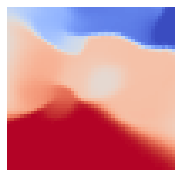

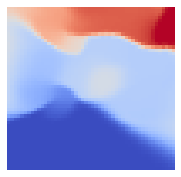

0 3 15100 28.762114804580825 29.179611206054688
0 3 15200 28.676194060461697 29.039810180664062
0 3 15300 28.465221963122488 29.124174118041992
0 3 15400 28.858764713412175 28.937591552734375
0 3 15500 28.512281662939913 29.07320213317871
0 3 15600 28.530580498636287 29.003768920898438
0 3 15700 28.93608366907257 29.16573143005371
0 3 15800 28.335282015840463 29.125776290893555
0 3 15900 28.6437904287833 29.05628776550293
0 3 16000 28.391162070170058 29.149877548217773


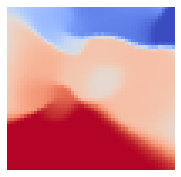

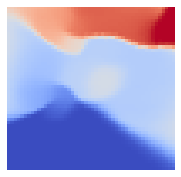

0 3 16100 28.57580910062822 29.10947036743164
0 3 16200 28.29656182521764 29.1217041015625
0 3 16300 28.711609046654157 29.18387794494629
0 3 16400 28.65739737986582 29.25885772705078
0 3 16500 28.84493676776451 28.99545669555664
0 3 16600 28.394042285052063 29.101215362548828
0 3 16700 28.63597790662866 29.26338005065918
0 3 16800 28.553457078896383 29.24020767211914
0 3 16900 28.51680598024613 29.013729095458984
0 3 17000 28.77255983342357 29.236581802368164


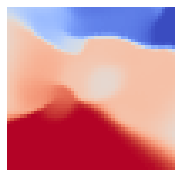

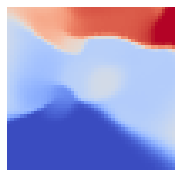

0 3 17100 28.679671689223103 29.128841400146484
0 3 17200 28.569822819275657 28.90109634399414
0 3 17300 28.581088685074658 29.035335540771484
0 3 17400 28.80566044796127 29.018396377563477
0 3 17500 28.61359674275636 29.091402053833008
0 3 17600 28.515263875313522 28.918006896972656
0 3 17700 28.61322760897722 29.034255981445312
0 3 17800 28.311349032988737 28.925901412963867
0 3 17900 28.585875281645002 28.879379272460938
0 3 18000 28.69094484055722 29.217294692993164


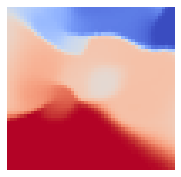

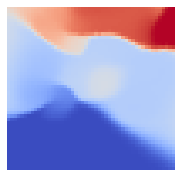

0 3 18100 28.896020511476944 29.146686553955078
0 3 18200 28.507910341871106 29.05489730834961
0 3 18300 29.23229409874183 29.005481719970703
0 3 18400 28.78594821845265 29.1370849609375
0 3 18500 28.657334238561493 29.131986618041992
0 3 18600 28.785350804573245 29.159353256225586
0 3 18700 28.83372675773472 29.087270736694336
0 3 18800 28.767688238943556 29.221715927124023
0 3 18900 28.680084536212934 29.137636184692383
0 3 19000 28.85156174769546 29.35775375366211


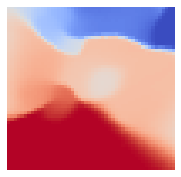

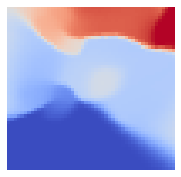

0 3 19100 28.74998438861488 29.197528839111328
0 3 19200 28.637279588902484 29.086898803710938
0 3 19300 28.65340733513468 29.18610382080078
0 3 19400 28.68246447768373 29.0594425201416
0 3 19500 28.622198531215094 29.02471160888672
0 3 19600 28.629250929206105 29.03249168395996
0 3 19700 28.421642320578176 28.87354850769043
0 3 19800 28.590363171275648 28.977306365966797
0 3 19900 28.86018782127124 29.116613388061523
0 3 20000 28.827118777385706 29.13688087463379


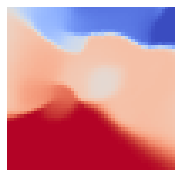

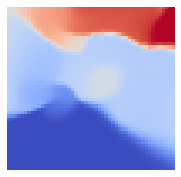

0 5 0 0.4999092862342926 4.684663772583008


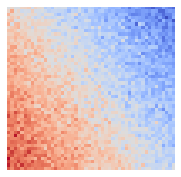

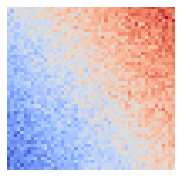

0 5 100 3.780379476661883 14.762707710266113
0 5 200 11.525245420153434 17.976367950439453
0 5 300 15.26414804184348 19.609201431274414
0 5 400 17.351746487859817 20.471254348754883
0 5 500 18.698086663423975 21.928375244140625
0 5 600 20.188233588105103 22.841529846191406
0 5 700 21.159454917428754 23.582408905029297
0 5 800 22.149411000299803 24.31974220275879
0 5 900 23.005128670171164 24.91083526611328
0 5 1000 23.679965931238655 25.734966278076172


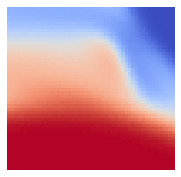

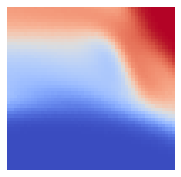

0 5 1100 24.103899077003373 25.992393493652344
0 5 1200 24.327693716144417 26.477617263793945
0 5 1300 24.859664062124732 26.38091278076172
0 5 1400 24.847312651593644 26.789701461791992
0 5 1500 25.053070734302445 26.844091415405273
0 5 1600 25.38636939472884 26.72455406188965
0 5 1700 25.461675114185876 27.10222816467285
0 5 1800 25.818226774186623 27.28485679626465
0 5 1900 25.78782666466477 27.38103675842285
0 5 2000 26.067644640325998 27.40884780883789


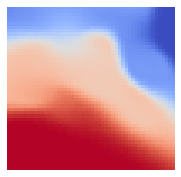

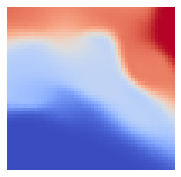

0 5 2100 25.965860857750506 27.54303550720215
0 5 2200 26.605020853361406 27.516551971435547
0 5 2300 26.234284256492376 27.74567222595215
0 5 2400 26.343402144416647 27.788991928100586
0 5 2500 26.489630119703396 27.874984741210938
0 5 2600 26.436399571643836 28.018888473510742
0 5 2700 26.82834921825511 28.205595016479492
0 5 2800 26.81514782862731 27.917877197265625
0 5 2900 26.78435430020926 28.197566986083984
0 5 3000 26.412260165297194 28.438495635986328


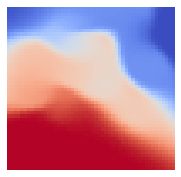

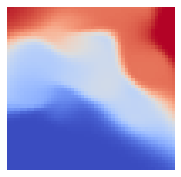

0 5 3100 26.852420626274014 28.343538284301758
0 5 3200 27.228145386184895 28.37673568725586
0 5 3300 26.829106913907037 28.23790740966797
0 5 3400 27.214409723982016 28.4055233001709
0 5 3500 27.1931602465642 28.186553955078125
0 5 3600 27.008214509166336 28.509811401367188
0 5 3700 27.14906090251504 28.326875686645508
0 5 3800 27.52216044127293 28.443553924560547
0 5 3900 27.121793573092496 28.45282554626465
0 5 4000 27.65347492617993 28.628644943237305


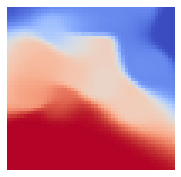

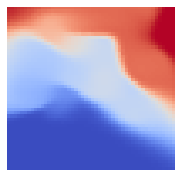

0 5 4100 27.60841874851904 28.720722198486328
0 5 4200 27.78684636050097 28.311803817749023
0 5 4300 27.560824776126537 28.88453483581543
0 5 4400 27.94791011379291 28.6259765625
0 5 4500 27.43116167917887 28.546358108520508
0 5 4600 27.77974539227586 28.618804931640625
0 5 4700 27.539213450464693 28.61463165283203
0 5 4800 27.801415002218626 28.677522659301758
0 5 4900 28.360927099444137 28.51991844177246
0 5 5000 27.57348946466756 28.400754928588867


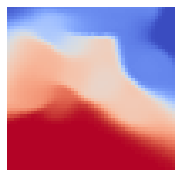

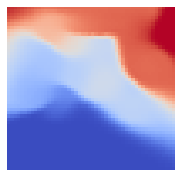

0 5 5100 27.853307440328788 28.70155143737793
0 5 5200 28.009640452819596 28.777267456054688
0 5 5300 27.69912851772022 28.521371841430664
0 5 5400 27.995846506335802 28.74030303955078
0 5 5500 27.773108269786388 28.62550926208496
0 5 5600 27.628628822927162 28.774951934814453
0 5 5700 28.32028352755104 28.3531551361084
0 5 5800 27.811821174874094 28.80447006225586
0 5 5900 28.293676753312226 28.938079833984375
0 5 6000 28.153087782204242 28.790447235107422


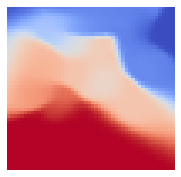

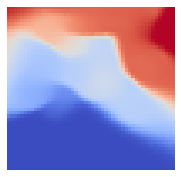

0 5 6100 28.114940720343775 28.85698699951172
0 5 6200 28.084662036407163 28.811498641967773
0 5 6300 28.009057610010423 28.741371154785156
0 5 6400 28.196339575668393 28.664718627929688
0 5 6500 28.349046820183798 28.91126251220703
0 5 6600 28.366187255796934 28.49886703491211
0 5 6700 28.21806504138037 28.890079498291016
0 5 6800 28.008622906415248 28.772674560546875
0 5 6900 28.149763149680243 28.540485382080078
0 5 7000 28.13164159533833 29.18073081970215


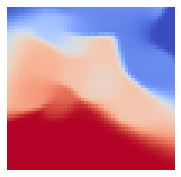

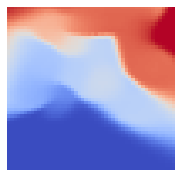

0 5 7100 27.983580093714387 28.91271209716797
0 5 7200 28.297088812257602 29.082714080810547
0 5 7300 28.218606599490563 29.1038761138916
0 5 7400 28.41993750536134 29.065900802612305
0 5 7500 28.412787966902133 28.873903274536133
0 5 7600 28.041827946956253 28.935457229614258
0 5 7700 28.384966936810876 28.868684768676758
0 5 7800 27.970689553584812 29.115055084228516
0 5 7900 28.22551328677928 28.993860244750977
0 5 8000 28.04354247621991 29.05293846130371


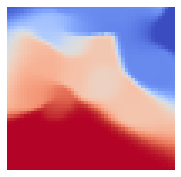

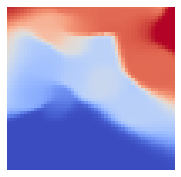

0 5 8100 28.1305851927467 28.946605682373047
0 5 8200 28.13751373664076 28.66461753845215
0 5 8300 28.253829733258335 28.889963150024414
0 5 8400 28.43930731471957 28.941577911376953
0 5 8500 28.229656327747826 28.867414474487305
0 5 8600 28.357393614913516 28.95415687561035
0 5 8700 28.419835507869735 28.980205535888672
0 5 8800 28.547184233162643 28.93791961669922
0 5 8900 28.09043218021799 29.050363540649414
0 5 9000 28.449519206438648 29.25193977355957


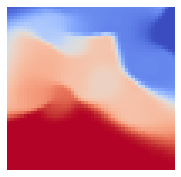

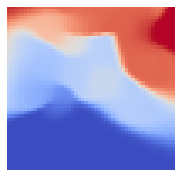

0 5 9100 28.138315145503377 28.847087860107422
0 5 9200 28.508090051737266 29.06527328491211
0 5 9300 28.697851527845934 29.029651641845703
0 5 9400 28.42516609106198 28.85405731201172
0 5 9500 28.56679203666795 29.104875564575195
0 5 9600 28.746317335940493 28.81998634338379
0 5 9700 28.334381037997947 29.184123992919922
0 5 9800 28.400757119916094 28.850994110107422
0 5 9900 28.289730421791777 29.0975399017334
0 5 10000 28.94311663896994 28.985637664794922


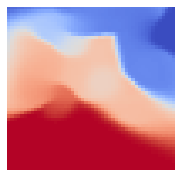

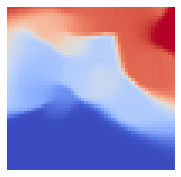

0 5 10100 28.231606422646855 28.97934341430664
0 5 10200 28.73865295299985 29.002586364746094
0 5 10300 28.59019560396801 29.02042007446289
0 5 10400 28.41074558855832 28.923023223876953
0 5 10500 28.210925216967983 28.894756317138672
0 5 10600 28.26296336578044 28.74364471435547
0 5 10700 28.404535884128908 28.955459594726562
0 5 10800 28.563923964344472 29.098886489868164
0 5 10900 28.309738929728393 28.95902442932129
0 5 11000 28.478804629087957 28.827974319458008


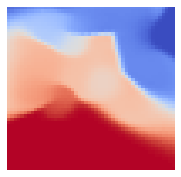

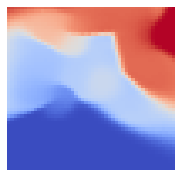

0 5 11100 28.251406078576853 29.09981346130371
0 5 11200 28.479100907515953 29.007831573486328
0 5 11300 28.472116507852682 29.021421432495117
0 5 11400 28.26256994688425 28.84684944152832
0 5 11500 28.872121527789087 29.065650939941406
0 5 11600 28.690828271995382 28.898754119873047
0 5 11700 28.516019142453743 29.10128402709961
0 5 11800 28.473257908353983 29.197668075561523
0 5 11900 28.629076076363354 29.249677658081055
0 5 12000 28.4548060764202 29.11573600769043


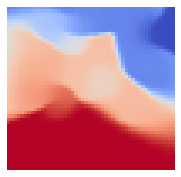

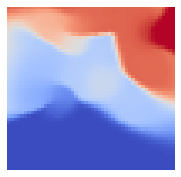

0 5 12100 28.627900676698186 29.197431564331055
0 5 12200 28.718833868976215 29.03209114074707
0 5 12300 28.41072130344127 29.012012481689453
0 5 12400 28.78076820298611 29.1490478515625
0 5 12500 28.60760074735698 29.15082359313965
0 5 12600 28.625474593504997 28.985984802246094
0 5 12700 28.459806382020577 29.05624008178711
0 5 12800 28.39990228379597 29.07152557373047
0 5 12900 28.607707601871997 28.89997100830078
0 5 13000 28.576238947199986 29.07883071899414


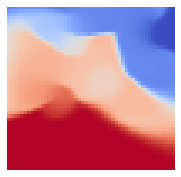

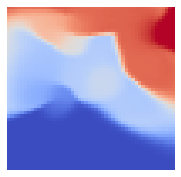

0 5 13100 28.77201341828997 28.921937942504883
0 5 13200 28.60514552202333 28.825443267822266
0 5 13300 28.865668972189184 29.148855209350586
0 5 13400 28.924829945832094 28.87921714782715
0 5 13500 28.89822317159328 29.170581817626953
0 5 13600 28.528831970208763 29.022857666015625
0 5 13700 28.94539458294913 29.12910270690918
0 5 13800 28.820382085916332 29.1241455078125
0 5 13900 28.607190328878854 29.11761474609375
0 5 14000 28.642211896175123 29.071529388427734


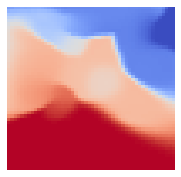

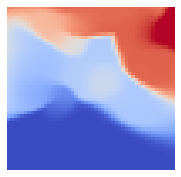

0 5 14100 28.72541756420818 29.18335723876953
0 5 14200 28.495299080587593 29.112180709838867
0 5 14300 28.62365078121462 29.167144775390625
0 5 14400 28.807778110167934 29.227611541748047
0 5 14500 28.86391558673825 29.31907844543457
0 5 14600 28.845186904470115 28.996334075927734
0 5 14700 28.671492461801023 29.140066146850586
0 5 14800 28.656190409548486 29.106090545654297
0 5 14900 28.621858539576408 28.981409072875977
0 5 15000 28.54914404210849 29.21197509765625


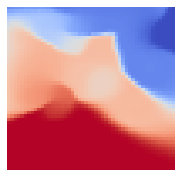

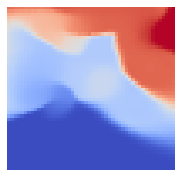

0 5 15100 28.48079115166256 29.117076873779297
0 5 15200 28.683931298753485 28.967662811279297
0 5 15300 28.67076147977785 29.259986877441406
0 5 15400 28.95896267784437 29.01160430908203
0 5 15500 28.872002530715548 28.939146041870117
0 5 15600 28.712357028259262 29.067813873291016
0 5 15700 28.99269956244875 28.88446044921875
0 5 15800 29.073078442857312 29.360477447509766
0 5 15900 28.579954570108473 29.17949867248535
0 5 16000 29.088504349206797 29.274118423461914


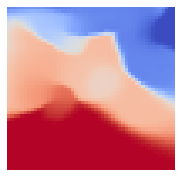

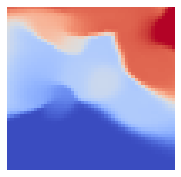

0 5 16100 28.936904506028824 29.109682083129883
0 5 16200 28.6566931114714 29.12917137145996
0 5 16300 28.72506057298756 29.20806884765625
0 5 16400 28.369497317250705 29.038015365600586
0 5 16500 28.65993274608573 29.38496971130371
0 5 16600 29.132788260145528 29.204580307006836
0 5 16700 28.386841747847054 29.024749755859375
0 5 16800 28.87092184300687 29.159242630004883
0 5 16900 28.696814553347945 29.1672420501709
0 5 17000 29.011554527325544 29.003049850463867


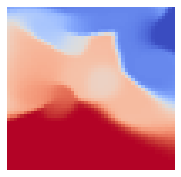

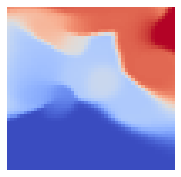

0 5 17100 28.821856192521203 29.04241180419922
0 5 17200 28.79896989821429 29.26110076904297
0 5 17300 28.778402832585545 29.107906341552734
0 5 17400 28.40561900034929 29.137170791625977
0 5 17500 28.606107212658472 29.25859832763672
0 5 17600 28.622805659141317 29.16106414794922
0 5 17700 28.91492404658783 29.072566986083984
0 5 17800 29.121850243426685 28.87993621826172
0 5 17900 28.767309391117593 29.05735206604004
0 5 18000 28.723746748155214 29.023637771606445


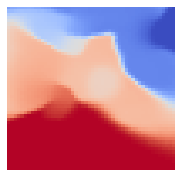

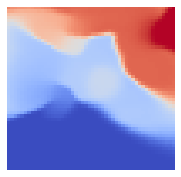

0 5 18100 28.760888406169855 29.074228286743164
0 5 18200 28.610366822188855 29.0336856842041
0 5 18300 28.907963932041607 29.136438369750977
0 5 18400 28.758952882341053 28.854389190673828
0 5 18500 29.048667043199725 29.33247184753418
0 5 18600 28.880990452535357 28.975841522216797
0 5 18700 28.659609754028978 29.134721755981445
0 5 18800 28.87009857753891 29.10739517211914
0 5 18900 28.824476556650783 29.28670883178711
0 5 19000 28.928795705446184 28.999225616455078


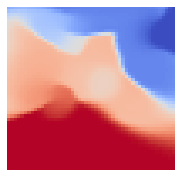

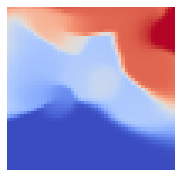

0 5 19100 28.728829623153555 28.958412170410156
0 5 19200 28.945608291979163 29.225805282592773
0 5 19300 28.77981379788609 29.274913787841797
0 5 19400 28.720830105597635 28.93588638305664
0 5 19500 28.787689461345057 29.014387130737305
0 5 19600 28.907446659048468 29.041833877563477
0 5 19700 28.816746603894106 29.073244094848633
0 5 19800 28.934131145661834 29.29644203186035
0 5 19900 28.691216833868165 29.11573028564453
0 5 20000 28.98575644748446 29.24881935119629


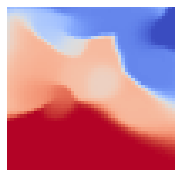

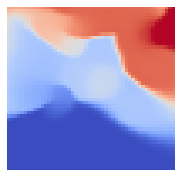

0 30 0 0.5065961173227259 4.685962677001953


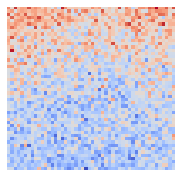

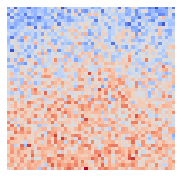

0 30 100 2.7574915608166255 10.598396301269531
0 30 200 4.8148219476350596 16.677019119262695
0 30 300 11.5101655767219 19.207366943359375
0 30 400 13.577257669902115 19.908843994140625
0 30 500 20.3070667371048 22.20549774169922
0 30 600 22.296707520736703 23.2865047454834
0 30 700 23.35175500283401 24.221988677978516
0 30 800 24.176166728317593 25.0262393951416
0 30 900 24.76467525529953 25.509489059448242
0 30 1000 25.279918012656537 26.177961349487305


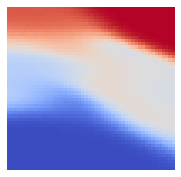

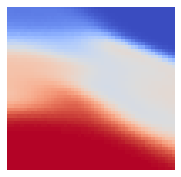

0 30 1100 25.683293806839337 26.32579231262207
0 30 1200 25.76683946651108 26.680330276489258
0 30 1300 25.906952449324905 26.782854080200195
0 30 1400 26.278886302464446 27.176132202148438
0 30 1500 26.31037195671839 27.33909797668457
0 30 1600 26.708453595384523 27.183115005493164
0 30 1700 26.54794111424959 27.39484977722168
0 30 1800 26.516200466266632 27.348297119140625
0 30 1900 26.542656672779742 27.656383514404297
0 30 2000 26.757890808161036 27.6320858001709


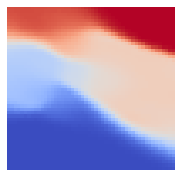

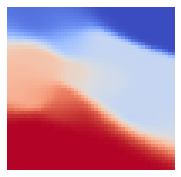

0 30 2100 27.058858692260184 27.73143196105957
0 30 2200 26.606919949514634 27.58893394470215
0 30 2300 27.05369567637558 27.79715347290039
0 30 2400 26.7814959419326 27.68849754333496
0 30 2500 27.11849079717384 27.884170532226562
0 30 2600 27.1320200358818 27.791790008544922
0 30 2700 27.177231638291804 27.88465690612793
0 30 2800 27.293040075963056 27.72431755065918
0 30 2900 27.322298784983612 27.991296768188477
0 30 3000 27.14198907643039 28.00128173828125


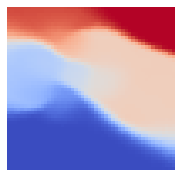

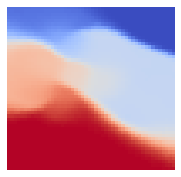

0 30 3100 27.35389129375257 27.961284637451172
0 30 3200 27.078910913407487 27.711252212524414
0 30 3300 27.386047217237063 27.95118522644043
0 30 3400 27.31517596015316 28.24477195739746
0 30 3500 27.4863641787428 28.18425941467285
0 30 3600 27.43442802742195 28.044883728027344
0 30 3700 27.48990737732024 28.132488250732422
0 30 3800 27.777574302811686 28.329477310180664
0 30 3900 27.751343947887133 28.235393524169922
0 30 4000 27.593194408641065 28.30944061279297


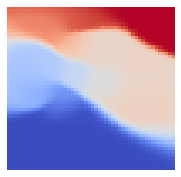

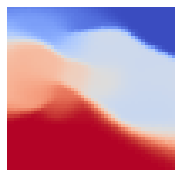

0 30 4100 27.573727458814638 28.531362533569336
0 30 4200 28.043353052306927 28.293996810913086
0 30 4300 27.616563976777254 28.3587646484375
0 30 4400 27.63471224474792 28.412275314331055
0 30 4500 28.05322980941073 28.38369369506836
0 30 4600 28.02893740682668 28.340221405029297
0 30 4700 27.847379443257143 28.378496170043945
0 30 4800 27.881424748848044 28.48072052001953
0 30 4900 28.026885314436047 28.425607681274414
0 30 5000 27.581000851370792 28.515504837036133


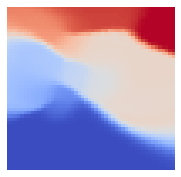

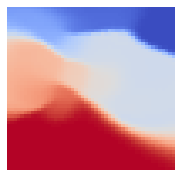

0 30 5100 27.811614751379178 28.11593246459961
0 30 5200 27.886723761388122 28.321552276611328
0 30 5300 28.047510664345705 28.34339141845703
0 30 5400 28.06151831985953 28.518362045288086
0 30 5500 28.118644200693737 28.39837074279785
0 30 5600 28.07353216726364 28.529483795166016
0 30 5700 27.728547508513298 28.591434478759766
0 30 5800 28.08804495321208 28.68719482421875
0 30 5900 28.27630803759883 28.6285457611084
0 30 6000 28.054747629226288 28.813100814819336


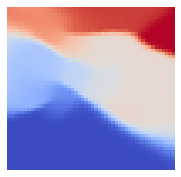

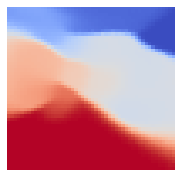

0 30 6100 27.915635193234877 28.58634376525879
0 30 6200 28.20512107399329 28.776456832885742
0 30 6300 28.059594938589257 28.841201782226562
0 30 6400 28.125332321929015 28.633102416992188
0 30 6500 28.517816241115366 28.832433700561523
0 30 6600 28.158326081951696 28.85790252685547
0 30 6700 28.436531525840877 28.809812545776367
0 30 6800 28.39516668597143 28.681955337524414
0 30 6900 28.352466164664285 28.720502853393555
0 30 7000 28.26759939462508 28.70452117919922


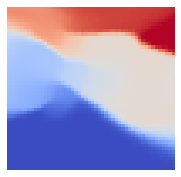

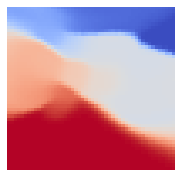

0 30 7100 28.51766324487796 28.792367935180664
0 30 7200 28.13462866473535 28.73830223083496
0 30 7300 27.934322590804033 28.587505340576172
0 30 7400 28.461975042973044 28.609529495239258
0 30 7500 28.276157469873127 28.555784225463867
0 30 7600 28.197978821069196 28.74764633178711
0 30 7700 28.44171396981912 28.798276901245117
0 30 7800 28.6063209216885 28.654460906982422
0 30 7900 28.44792853127194 28.845739364624023
0 30 8000 28.339323059317405 28.692243576049805


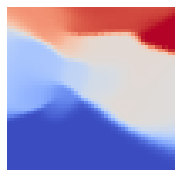

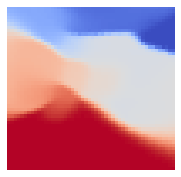

0 30 8100 27.883702692827235 28.771705627441406
0 30 8200 28.280817783834816 28.778600692749023
0 30 8300 28.315533358656268 28.876361846923828
0 30 8400 28.13179702008744 28.670429229736328
0 30 8500 28.490663051742953 28.696571350097656
0 30 8600 28.68420086355273 28.636396408081055
0 30 8700 28.469736566381886 28.863872528076172
0 30 8800 28.301501418025392 28.812917709350586
0 30 8900 28.372022969423792 28.783227920532227
0 30 9000 28.301996834413192 28.76007652282715


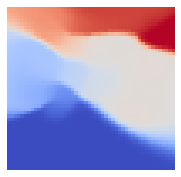

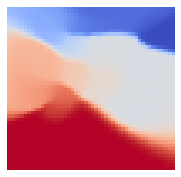

0 30 9100 28.000992522638473 28.537527084350586
0 30 9200 28.29647197028456 28.640092849731445
0 30 9300 28.246376630836018 28.613466262817383
0 30 9400 28.65909976657095 28.853046417236328
0 30 9500 28.442316240721933 28.82338523864746
0 30 9600 28.393362301774694 28.569889068603516
0 30 9700 28.449944195987005 28.92232322692871
0 30 9800 28.271026024640687 28.98064613342285
0 30 9900 28.533400000725667 28.916118621826172
0 30 10000 28.398110042157757 28.81875228881836


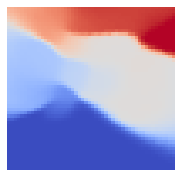

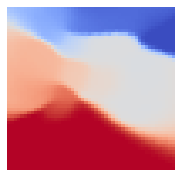

0 30 10100 28.48024959355237 28.813920974731445
0 30 10200 28.30907837454466 28.772119522094727
0 30 10300 28.6897937260091 28.837528228759766
0 30 10400 28.569266690095237 28.798194885253906
0 30 10500 28.5459724058219 28.84316062927246
0 30 10600 28.539782129486127 28.839948654174805
0 30 10700 28.57134792462633 28.989349365234375
0 30 10800 28.50829404672048 28.490678787231445
0 30 10900 28.393214162560692 28.671920776367188
0 30 11000 28.47066182934145 28.558853149414062


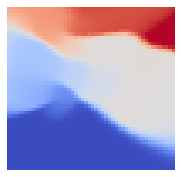

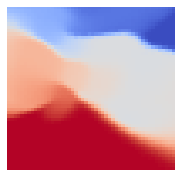

0 30 11100 28.457909714379056 28.810773849487305
0 30 11200 28.409038344829778 28.872255325317383
0 30 11300 28.0848271752031 28.86800765991211
0 30 11400 28.58310434978972 28.800031661987305
0 30 11500 28.408307362806607 28.83048439025879
0 30 11600 28.419920505779405 28.885229110717773
0 30 11700 28.44028600493664 29.01228904724121
0 30 11800 28.63983924023944 28.784757614135742
0 30 11900 28.515871003239745 28.97014617919922
0 30 12000 28.69300664699467 28.809568405151367


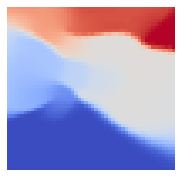

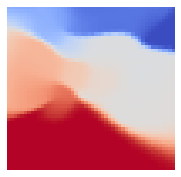

0 30 12100 28.628561231881914 28.846582412719727
0 30 12200 28.638054284136345 29.002784729003906
0 30 12300 28.16577675586231 28.85719108581543
0 30 12400 28.502254338110408 28.8568172454834
0 30 12500 28.6025494430108 29.041427612304688
0 30 12600 28.620889563406156 28.78711700439453
0 30 12700 28.639776098935112 29.108272552490234
0 30 12800 28.553988922959753 28.986236572265625
0 30 12900 28.707395578846167 28.995935440063477
0 30 13000 28.74744416537156 29.02463722229004


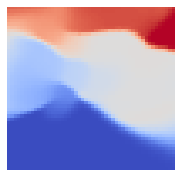

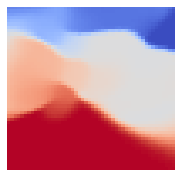

0 30 13100 28.551283560920503 28.89363670349121
0 30 13200 28.400091707708953 28.92534828186035
0 30 13300 28.658016650350568 28.54832649230957
0 30 13400 28.822983021952272 28.84286880493164
0 30 13500 28.56933711693468 28.939491271972656
0 30 13600 28.514559606919104 28.959142684936523
0 30 13700 28.89523124517285 29.186595916748047
0 30 13800 28.360426826032928 28.84088706970215
0 30 13900 28.698878788297105 29.027877807617188
0 30 14000 28.694755175422195 28.929311752319336


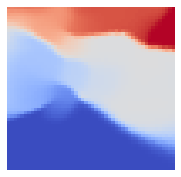

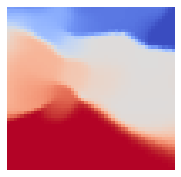

0 30 14100 28.43034853504022 28.958200454711914
0 30 14200 28.69656927366575 28.86309814453125
0 30 14300 28.56520864703636 28.998859405517578
0 30 14400 28.5899430387507 29.107229232788086
0 30 14500 28.81463865573426 28.849685668945312
0 30 14600 29.10698289476933 28.99393653869629
0 30 14700 28.52539076912293 28.95197868347168
0 30 14800 28.5642348138427 28.90228271484375
0 30 14900 28.641364345590112 28.8656063079834
0 30 15000 28.598100409567436 29.163362503051758


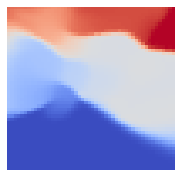

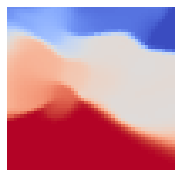

0 30 15100 28.424886812215913 28.928682327270508
0 30 15200 28.611513079713564 28.874977111816406
0 30 15300 28.60034435438276 28.818437576293945
0 30 15400 28.8842373726848 29.114545822143555
0 30 15500 28.653533617743335 29.016271591186523
0 30 15600 28.65084039826261 29.211166381835938
0 30 15700 28.80591544169028 29.02682876586914
0 30 15800 28.379684923852732 29.013574600219727
0 30 15900 28.640208374018584 29.15509033203125
0 30 16000 28.733047947984954 28.70992660522461


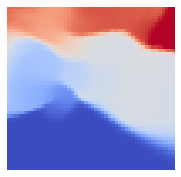

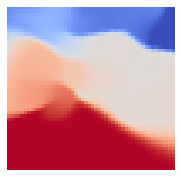

0 30 16100 28.56392882136788 29.164838790893555
0 30 16200 28.460381939294635 28.970932006835938
0 30 16300 28.43841362241217 29.094528198242188
0 30 16400 28.37598144350277 29.11631965637207
0 30 16500 29.079640281483936 28.92457389831543
0 30 16600 28.69009728997221 28.870302200317383
0 30 16700 28.5576851177746 29.157516479492188
0 30 16800 28.525288771631324 29.044506072998047
0 30 16900 28.8462724492022 29.102548599243164
0 30 17000 28.418747534625943 28.853416442871094


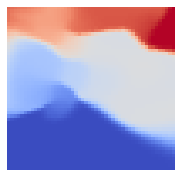

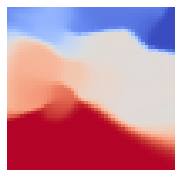

0 30 17100 29.041842925308973 29.031169891357422
0 30 17200 28.48590316880136 29.106983184814453
0 30 17300 28.58771366500561 29.07352066040039
0 30 17400 28.641818477278928 28.96002769470215
0 30 17500 28.69131397433636 28.959545135498047
0 30 17600 28.788915859756028 28.938751220703125
0 30 17700 28.661588991068466 29.053607940673828
0 30 17800 28.590800303382526 28.923215866088867
0 30 17900 28.53303572396993 29.083093643188477
0 30 18000 28.5905890228642 29.021148681640625


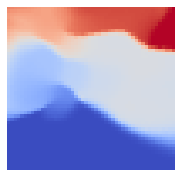

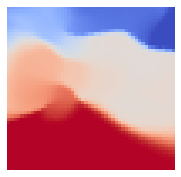

0 30 18100 28.981168988873915 29.018394470214844
0 30 18200 28.84617773724571 28.97271728515625
0 30 18300 28.946229990975613 29.126312255859375
0 30 18400 28.69119497726282 29.218957901000977
0 30 18500 28.7902418271469 28.99507713317871
0 30 18600 28.39427299366403 28.957477569580078
0 30 18700 29.099585648116225 28.86734390258789
0 30 18800 28.665498894913345 28.850549697875977
0 30 18900 29.13278583163382 29.128149032592773
0 30 19000 28.877386541165297 28.896085739135742


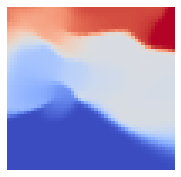

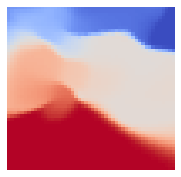

0 30 19100 28.830392411163903 29.10135841369629
0 30 19200 28.969679699998064 28.903663635253906
0 30 19300 28.72310562106512 28.849214553833008
0 30 19400 28.925063082955763 29.16606330871582
0 30 19500 28.812404424965756 29.051803588867188
0 30 19600 28.680337101430244 29.070510864257812
0 30 19700 28.497822304248977 29.107990264892578
0 30 19800 28.90345418580562 29.15183448791504
0 30 19900 28.954970204601526 28.9224910736084
0 30 20000 28.71901600735408 28.929494857788086


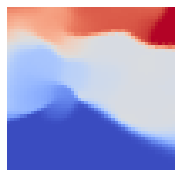

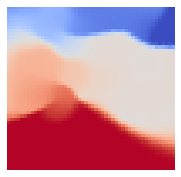

1 1 0 0.48362903705612714 4.401508808135986


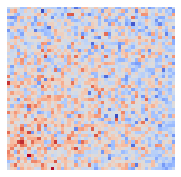

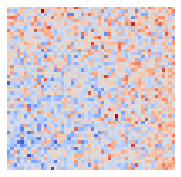

1 1 100 7.062982659276277 12.806863784790039
1 1 200 10.415850274612316 15.588848114013672
1 1 300 12.898419435800815 17.471303939819336
1 1 400 14.6771573346771 18.82592010498047
1 1 500 16.488765139479117 20.115238189697266
1 1 600 17.602095688238016 20.863767623901367
1 1 700 18.970606961412003 21.618505477905273
1 1 800 19.763721242298768 22.268312454223633
1 1 900 20.34244650987754 22.587398529052734
1 1 1000 21.139186558739713 23.18138885498047


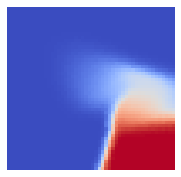

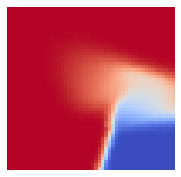

1 1 1100 21.095976049974546 23.342910766601562
1 1 1200 21.305452184103537 23.538406372070312
1 1 1300 21.922855143350297 23.84459114074707
1 1 1400 22.3716926766487 24.619186401367188
1 1 1500 23.396881607334343 25.264421463012695
1 1 1600 24.030514310304905 25.67209243774414
1 1 1700 23.425865894532244 25.892032623291016
1 1 1800 24.471920597786333 26.235761642456055
1 1 1900 24.40464353802567 26.264869689941406
1 1 2000 24.677139550896648 26.508068084716797


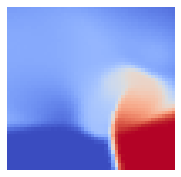

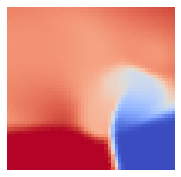

1 1 2100 24.81481430795876 26.538820266723633
1 1 2200 25.226099764764395 26.503957748413086
1 1 2300 25.273892875116697 26.868824005126953
1 1 2400 25.090154108036167 26.545209884643555
1 1 2500 25.297910855878094 26.77109146118164
1 1 2600 25.34652480318665 26.7431583404541
1 1 2700 25.29982452310155 26.993026733398438
1 1 2800 25.20820649052274 26.97410011291504
1 1 2900 25.356061568651768 27.076276779174805
1 1 3000 25.305091964989465 26.820363998413086


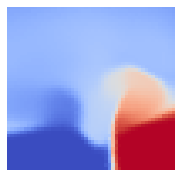

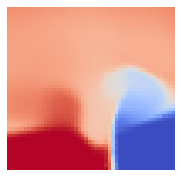

1 1 3100 25.5669972383154 26.80223274230957
1 1 3200 25.72919753508523 26.85356903076172
1 1 3300 25.857337955193934 27.202890396118164
1 1 3400 25.857080532953216 26.983795166015625
1 1 3500 25.741000101971014 27.079694747924805
1 1 3600 25.880923660871858 27.13681983947754
1 1 3700 25.657527297650418 27.485004425048828
1 1 3800 26.092417888227615 27.256990432739258
1 1 3900 26.208022330915657 27.236543655395508
1 1 4000 26.072793085140372 27.16005516052246


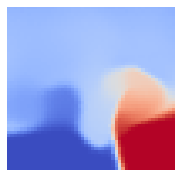

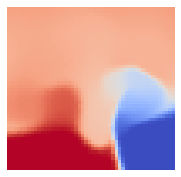

1 1 4100 25.945288935098354 27.450895309448242
1 1 4200 26.112402111047185 27.07402229309082
1 1 4300 25.967062971044427 27.240535736083984
1 1 4400 26.25500674687023 27.121131896972656
1 1 4500 25.92691967256254 27.092273712158203
1 1 4600 26.28659925563919 27.300806045532227
1 1 4700 26.29997306959804 27.28561782836914
1 1 4800 25.882492479433218 27.29622459411621
1 1 4900 26.19493022431458 27.44550323486328
1 1 5000 26.579616192416516 27.430727005004883


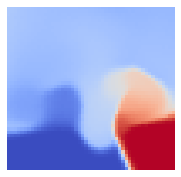

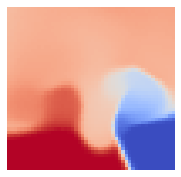

1 1 5100 26.71749494446184 27.5214900970459
1 1 5200 26.20848374813959 27.418733596801758
1 1 5300 26.39435717700872 27.478174209594727
1 1 5400 26.14775395593532 27.543909072875977
1 1 5500 26.313990439158683 27.320392608642578
1 1 5600 26.407505139379012 27.530437469482422
1 1 5700 26.34550280704138 27.4641170501709
1 1 5800 26.434226053667956 27.584152221679688
1 1 5900 26.429543883100923 27.652259826660156
1 1 6000 26.45884873384387 27.577741622924805


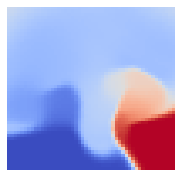

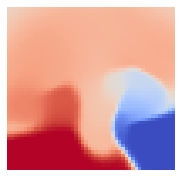

1 1 6100 26.609076467908576 27.663347244262695
1 1 6200 26.535997693684923 27.52973747253418
1 1 6300 26.39664483503473 27.62283706665039
1 1 6400 26.615179317822975 27.651411056518555
1 1 6500 26.482310585424845 27.616863250732422
1 1 6600 26.687631536026764 27.631000518798828
1 1 6700 26.295927169097684 27.6215763092041
1 1 6800 26.517655144777866 27.587055206298828
1 1 6900 26.713444186938077 27.462242126464844
1 1 7000 26.844085974102818 27.613569259643555


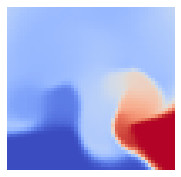

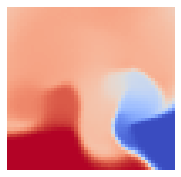

1 1 7100 26.50827866108527 27.657846450805664
1 1 7200 26.551552311154765 27.964069366455078
1 1 7300 26.517373437420098 27.49863052368164
1 1 7400 26.5798080448412 27.81740379333496
1 1 7500 26.77915728516079 28.003997802734375
1 1 7600 26.640668976677535 27.681034088134766
1 1 7700 26.74441499671058 27.75479507446289
1 1 7800 26.848294584887398 27.899517059326172
1 1 7900 26.860403144247996 27.6149845123291
1 1 8000 26.761040587842285 27.61599349975586


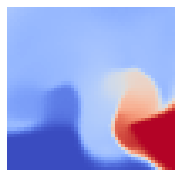

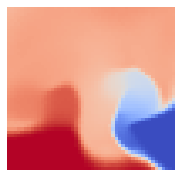

1 1 8100 26.86134297827779 27.919416427612305
1 1 8200 26.716732391786504 27.749250411987305
1 1 8300 26.625512635127297 27.67690086364746
1 1 8400 26.90377393478569 27.647445678710938
1 1 8500 26.870401326937042 27.88065528869629
1 1 8600 26.856988656790918 27.622400283813477
1 1 8700 26.692039284771145 27.744524002075195
1 1 8800 26.719950169795485 27.534324645996094
1 1 8900 26.518150561165662 27.720701217651367
1 1 9000 26.85927388630522 27.897550582885742


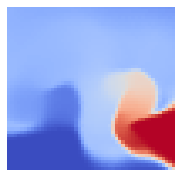

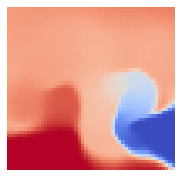

1 1 9100 27.12309525536632 27.6591854095459
1 1 9200 26.85199077970225 27.832015991210938
1 1 9300 26.690351469136246 27.7392520904541
1 1 9400 26.594872102946656 27.853466033935547
1 1 9500 26.63554967400362 27.61834144592285
1 1 9600 26.850332106207805 28.0931339263916
1 1 9700 26.692692554419764 27.756088256835938
1 1 9800 26.647293956608486 27.36720085144043
1 1 9900 26.84678162209525 27.83540153503418
1 1 10000 26.832783680628246 27.80828094482422


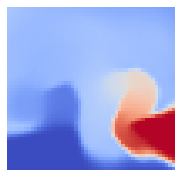

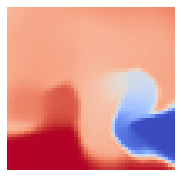

1 1 10100 27.084557203121367 28.01929473876953
1 1 10200 26.878085137971325 27.738161087036133
1 1 10300 26.762738117524005 27.962169647216797
1 1 10400 26.92039466889398 27.941402435302734
1 1 10500 26.67523641228499 27.70068359375
1 1 10600 26.842869289738665 27.896127700805664
1 1 10700 26.950551927245346 27.78830909729004
1 1 10800 26.70224874797852 27.96990394592285
1 1 10900 26.971823261268508 27.880754470825195
1 1 11000 27.08148756432638 27.89661407470703


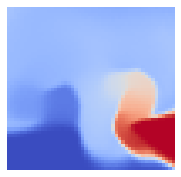

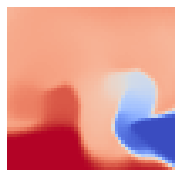

1 1 11100 27.08796926206674 27.91400909423828
1 1 11200 27.081562848189233 27.663795471191406
1 1 11300 27.200236929672258 28.040952682495117
1 1 11400 27.003971899217888 28.050493240356445
1 1 11500 27.001499674302305 27.937788009643555
1 1 11600 26.99010266887124 27.447362899780273
1 1 11700 26.801378167260562 27.85824966430664
1 1 11800 26.813707721186308 28.003646850585938
1 1 11900 27.12470293011496 27.883874893188477
1 1 12000 26.90435434908316 27.728654861450195


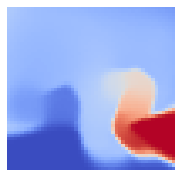

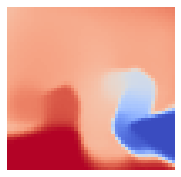

1 1 12100 27.06532339041861 28.052452087402344
1 1 12200 26.770152363759042 28.06167221069336
1 1 12300 26.91091618770978 27.860252380371094
1 1 12400 26.966723386688233 27.82235336303711
1 1 12500 26.867375401352746 28.02088737487793
1 1 12600 27.16709503043558 27.906017303466797
1 1 12700 26.88178376129788 27.873258590698242
1 1 12800 26.973110372472103 27.841794967651367
1 1 12900 26.992128047633123 27.755250930786133
1 1 13000 27.258708205990978 28.031639099121094


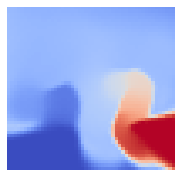

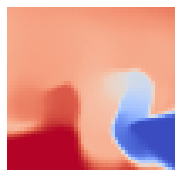

1 1 13100 27.06613208481634 27.90654182434082
1 1 13200 26.843391419755218 28.035579681396484
1 1 13300 26.8972776659751 27.916824340820312
1 1 13400 26.98575563291948 27.920730590820312
1 1 13500 26.74667108408443 28.00761604309082
1 1 13600 27.235452777904918 27.9074649810791
1 1 13700 26.98568034905663 27.784687042236328
1 1 13800 27.171905912122973 28.001182556152344
1 1 13900 27.078498066417655 27.902477264404297
1 1 14000 27.380743347673576 28.078584671020508


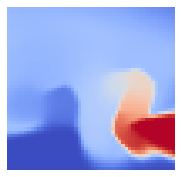

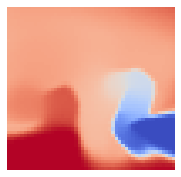

1 1 14100 26.98921869061066 27.981693267822266
1 1 14200 27.11693654968271 27.966590881347656
1 1 14300 27.073981034646554 27.967002868652344
1 1 14400 27.058994688915657 28.068796157836914
1 1 14500 27.00327248784688 27.883241653442383
1 1 14600 26.837589705292228 27.9857120513916
1 1 14700 27.286842514092168 28.015214920043945
1 1 14800 26.941294440626294 27.735200881958008
1 1 14900 26.881261631281326 27.675724029541016
1 1 15000 27.00012756518904 28.09177017211914


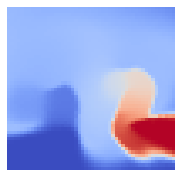

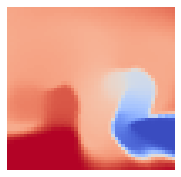

1 1 15100 27.185966994894304 28.06640625
1 1 15200 27.112968361556913 28.036399841308594
1 1 15300 27.108492614484796 28.148956298828125
1 1 15400 27.166072627007818 27.96030616760254
1 1 15500 27.14812835402036 27.926626205444336
1 1 15600 26.93862793477432 27.921146392822266
1 1 15700 27.230989173391325 27.980712890625
1 1 15800 27.22825709772332 28.16716766357422
1 1 15900 27.00463973993673 27.99086570739746
1 1 16000 27.002665359920655 28.065462112426758


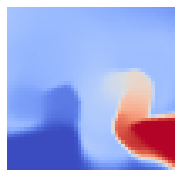

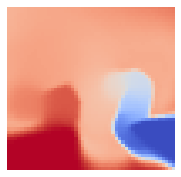

1 1 16100 27.116958406288052 27.862401962280273
1 1 16200 27.269947358161225 27.84400749206543
1 1 16300 27.21706651578717 28.189563751220703
1 1 16400 27.07189980011546 27.88556480407715
1 1 16500 26.94733172072466 27.94369125366211
1 1 16600 27.2912745479536 28.123638153076172
1 1 16700 27.319957699700094 27.82724952697754
1 1 16800 27.19732514413809 27.723854064941406
1 1 16900 27.300289183402164 28.078134536743164
1 1 17000 26.79437433950365 27.84507942199707


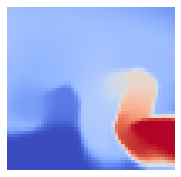

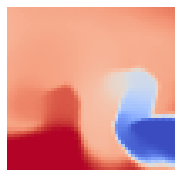

1 1 17100 27.167133886622857 27.892030715942383
1 1 17200 27.199787655006855 28.182397842407227
1 1 17300 27.077470805966488 28.031450271606445
1 1 17400 27.28276989996306 28.111013412475586
1 1 17500 27.330516868592973 27.982505798339844
1 1 17600 27.295004741932313 28.149715423583984
1 1 17700 27.15702642090709 27.98931312561035
1 1 17800 27.13419355385768 28.148193359375
1 1 17900 27.185267583523295 28.08786392211914
1 1 18000 27.019985505399955 27.957618713378906


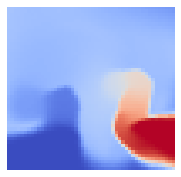

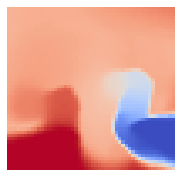

1 1 18100 27.18128968135068 28.05506706237793
1 1 18200 27.245868664607205 28.00665855407715
1 1 18300 27.362017093917142 28.085643768310547
1 1 18400 27.13777075159899 28.128597259521484
1 1 18500 27.148859336043532 27.939224243164062
1 1 18600 27.209722696391573 28.108739852905273
1 1 18700 27.42636294005 27.97504234313965
1 1 18800 27.308825402044864 28.00539207458496
1 1 18900 27.062244037576804 28.10369300842285
1 1 19000 27.477645821722234 28.134733200073242


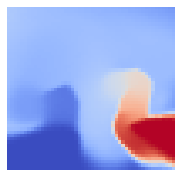

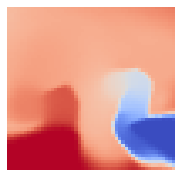

1 1 19100 27.336903854376843 27.94542121887207
1 1 19200 27.320756680051005 28.06451988220215
1 1 19300 26.947897563951898 28.146512985229492
1 1 19400 27.135315526265344 28.078889846801758
1 1 19500 27.09559721733181 27.874067306518555
1 1 19600 27.178938882020343 27.93128204345703
1 1 19700 27.129674093574874 27.893524169921875
1 1 19800 27.33716613364097 27.95395278930664
1 1 19900 27.245837093955043 28.167680740356445
1 1 20000 27.09990054007288 27.8925724029541


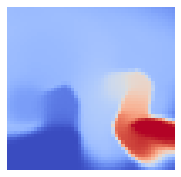

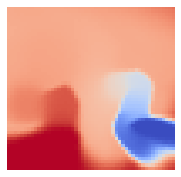

1 3 0 0.5149384344839887 4.401581764221191


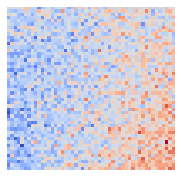

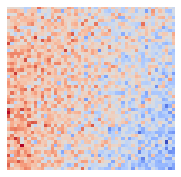

1 3 100 4.547310455038377 11.550999641418457
1 3 200 9.427966319353466 14.789782524108887
1 3 300 12.77877394963583 17.185640335083008
1 3 400 14.806170804743711 18.39325714111328
1 3 500 16.231222687431025 20.002836227416992
1 3 600 18.803044510797765 22.214174270629883
1 3 700 19.971868980525183 23.087678909301758
1 3 800 21.04914463025738 23.714406967163086
1 3 900 21.63401767521709 24.2574520111084
1 3 1000 22.329164579672604 24.933345794677734


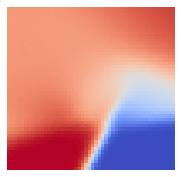

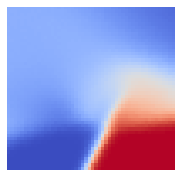

1 3 1100 22.98899120989215 24.97473907470703
1 3 1200 23.355111206010175 25.477474212646484
1 3 1300 23.692883184996983 25.784032821655273
1 3 1400 23.985193424868182 25.75560188293457
1 3 1500 24.224331400960743 26.12944221496582
1 3 1600 23.909579284424623 26.35293197631836
1 3 1700 24.69196561485502 26.170488357543945
1 3 1800 24.677428543789528 26.320648193359375
1 3 1900 24.452606644197317 26.216381072998047
1 3 2000 24.74028814075899 26.451087951660156


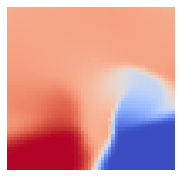

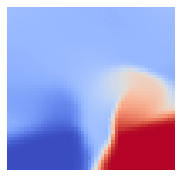

1 3 2100 24.665193701820275 26.411136627197266
1 3 2200 24.947661183751546 26.61304473876953
1 3 2300 24.828909389893962 26.373455047607422
1 3 2400 25.041379878955087 26.79023551940918
1 3 2500 25.143637221313035 26.71462631225586
1 3 2600 25.407655299822228 26.839689254760742
1 3 2700 25.528876890083687 26.87640380859375
1 3 2800 25.222386570367615 26.952129364013672
1 3 2900 25.767060461076223 26.992717742919922
1 3 3000 25.68146028050214 26.989503860473633


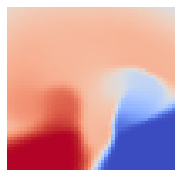

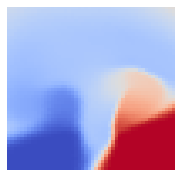

1 3 3100 25.640112440214626 26.942296981811523
1 3 3200 25.717591677647547 27.040719985961914
1 3 3300 25.791746282556467 27.23082733154297
1 3 3400 25.711250833586067 26.810251235961914
1 3 3500 25.979071961425127 27.22568130493164
1 3 3600 25.985189382409754 27.022104263305664
1 3 3700 25.911503480259874 27.065622329711914
1 3 3800 26.157786137788232 27.208332061767578
1 3 3900 26.129863110205367 27.24279022216797
1 3 4000 25.946753327656403 27.058109283447266


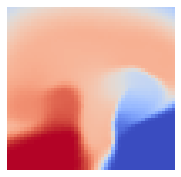

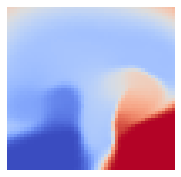

1 3 4100 26.464434310765125 27.441030502319336
1 3 4200 26.130190959285528 27.234296798706055
1 3 4300 26.13857903871423 27.444547653198242
1 3 4400 26.33991965863183 27.413198471069336
1 3 4500 26.247565787006437 27.080598831176758
1 3 4600 26.265811195445302 27.495559692382812
1 3 4700 26.304839807054645 27.498498916625977
1 3 4800 26.49009396543903 27.324295043945312
1 3 4900 26.775125955730665 27.539857864379883
1 3 5000 26.87455893897582 27.595338821411133


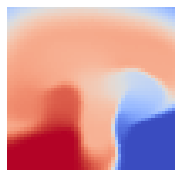

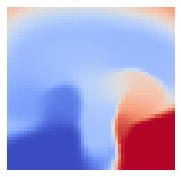

1 3 5100 26.490210534000862 27.718685150146484
1 3 5200 26.709461427742053 27.461002349853516
1 3 5300 26.555928489246984 27.750659942626953
1 3 5400 26.528950152717325 27.645174026489258
1 3 5500 26.723014951567063 27.61581802368164
1 3 5600 26.52411498591288 27.654645919799805
1 3 5700 26.491322792361704 27.70769500732422
1 3 5800 27.08162113247015 27.562021255493164
1 3 5900 27.00454988500365 27.402917861938477
1 3 6000 26.945403482430972 27.617908477783203


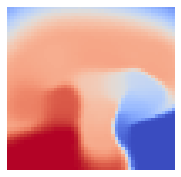

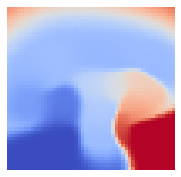

1 3 6100 27.178771314712705 27.69922637939453
1 3 6200 27.17908459272264 27.752641677856445
1 3 6300 27.211007379083462 27.6417293548584
1 3 6400 27.01988350790835 27.909650802612305
1 3 6500 27.11528516172338 27.83100128173828
1 3 6600 26.999180445624134 27.800621032714844
1 3 6700 26.895910413885243 27.739221572875977
1 3 6800 27.241827621130263 27.938390731811523
1 3 6900 27.35565925027373 27.799177169799805
1 3 7000 27.350051816747133 27.72180938720703


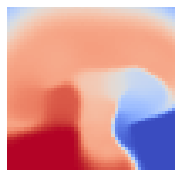

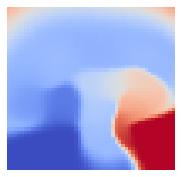

1 3 7100 26.945311198986186 27.895368576049805
1 3 7200 26.87831341807159 27.82059097290039
1 3 7300 27.295570585159556 27.860055923461914
1 3 7400 27.129902373675137 28.01529312133789
1 3 7500 27.161728019567764 27.786239624023438
1 3 7600 26.959777843212237 27.949054718017578
1 3 7700 27.27590449737333 28.00364112854004
1 3 7800 27.253843897046075 27.912769317626953
1 3 7900 27.69675100476113 27.92934226989746
1 3 8000 27.391263660379174 28.113807678222656


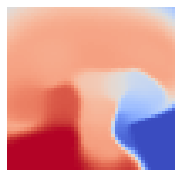

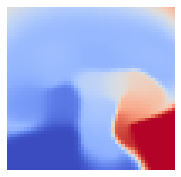

1 3 8100 27.07047426374469 27.836708068847656
1 3 8200 27.367512815905318 27.958951950073242
1 3 8300 27.290363856064264 27.840179443359375
1 3 8400 27.19476306428943 27.849092483520508
1 3 8500 27.16762687449895 27.85675811767578
1 3 8600 27.418224997326902 28.030012130737305
1 3 8700 27.209817408348062 28.095781326293945
1 3 8800 27.43323077115144 28.070119857788086
1 3 8900 27.55663073641219 28.05436134338379
1 3 9000 27.534742560415985 27.899700164794922


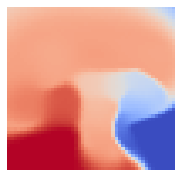

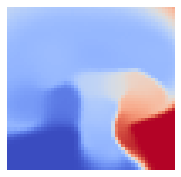

1 3 9100 27.513818503566622 27.7698974609375
1 3 9200 27.485431630248122 27.87070655822754
1 3 9300 27.433833042054253 28.01061248779297
1 3 9400 27.449853933771433 27.944393157958984
1 3 9500 27.442240549576592 28.008668899536133
1 3 9600 27.25356704671172 28.07034683227539
1 3 9700 27.36597071097271 27.92305564880371
1 3 9800 27.234274949728047 27.986156463623047
1 3 9900 27.310634643265008 27.853252410888672
1 3 10000 27.143633178854603 27.899436950683594


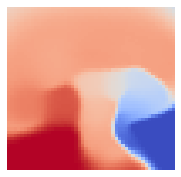

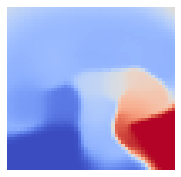

1 3 10100 27.167330596070954 27.918622970581055
1 3 10200 27.36507701866531 27.938901901245117
1 3 10300 27.558733827548625 27.654863357543945
1 3 10400 27.51292966828263 27.75967788696289
1 3 10500 27.4640801553387 28.133953094482422
1 3 10600 27.319263145352494 28.028783798217773
1 3 10700 27.66875269331541 28.010761260986328
1 3 10800 27.410667468901273 27.937829971313477
1 3 10900 27.490300796216435 27.995853424072266
1 3 11000 27.463322459686772 27.78603172302246


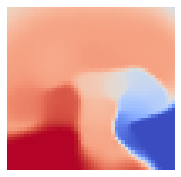

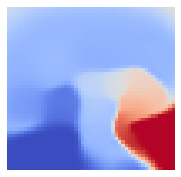

1 3 11100 28.035088826975176 28.103809356689453
1 3 11200 27.606580365158436 28.093170166015625
1 3 11300 27.695568319560845 27.695940017700195
1 3 11400 27.709762970475946 28.01406478881836
1 3 11500 27.457328892799097 27.96474266052246
1 3 11600 27.693057238457985 27.82140350341797
1 3 11700 27.47241237899819 27.884571075439453
1 3 11800 27.72020071378358 28.230375289916992
1 3 11900 27.527000465100784 28.112220764160156
1 3 12000 27.489538243541098 27.954702377319336


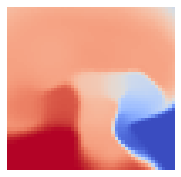

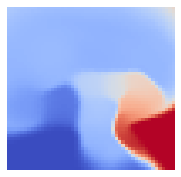

1 3 12100 27.816279922364277 27.967336654663086
1 3 12200 27.60044837310358 28.051477432250977
1 3 12300 27.60132749434075 27.9621524810791
1 3 12400 27.678114605937775 28.183849334716797
1 3 12500 27.792655360499076 28.05264663696289
1 3 12600 27.653117934959308 28.069538116455078
1 3 12700 27.552198702550758 28.15993881225586
1 3 12800 27.398748333453657 28.1192569732666
1 3 12900 27.83446947503393 28.05954360961914
1 3 13000 27.352747464739565 28.214950561523438


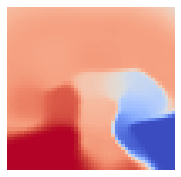

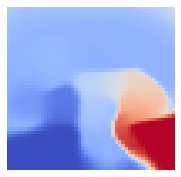

1 3 13100 27.66643832166065 28.08661460876465
1 3 13200 27.696292016048904 28.20038414001465
1 3 13300 27.67148719749512 27.961702346801758
1 3 13400 27.327019811737923 28.06004524230957
1 3 13500 27.56113805413647 27.99506187438965
1 3 13600 27.345522642417507 28.245128631591797
1 3 13700 27.48488521511452 28.18837547302246
1 3 13800 27.54572914736892 28.142282485961914
1 3 13900 27.88087104817933 27.977102279663086
1 3 14000 27.642685048675087 28.046287536621094


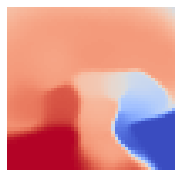

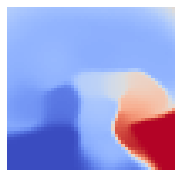

1 3 14100 27.537957909913263 28.12388801574707
1 3 14200 27.704318247233576 28.123640060424805
1 3 14300 27.89138650386152 28.073278427124023
1 3 14400 27.52608977321145 28.066808700561523
1 3 14500 27.818706005557466 28.317279815673828
1 3 14600 27.58312337060087 28.150943756103516
1 3 14700 27.22491303710568 28.11937141418457
1 3 14800 27.384325402438296 27.947664260864258
1 3 14900 27.127663285883223 28.0643310546875
1 3 15000 27.760878284840544 28.18470573425293


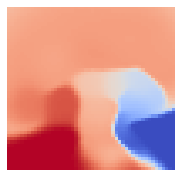

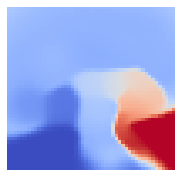

1 3 15100 27.516572435839972 28.100194931030273
1 3 15200 27.654470615978934 28.180992126464844
1 3 15300 28.098400127121746 28.007465362548828
1 3 15400 27.5104817284841 27.904001235961914
1 3 15500 27.764581765190506 28.147563934326172
1 3 15600 27.367932948430266 28.26484489440918
1 3 15700 27.73001190107135 28.076927185058594
1 3 15800 27.958000579926743 28.25044822692871
1 3 15900 27.37553419006658 27.980159759521484
1 3 16000 28.02551320532278 28.24706268310547


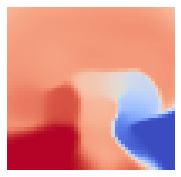

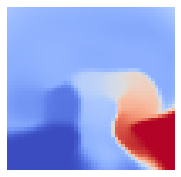

1 3 16100 27.69866710049629 28.174747467041016
1 3 16200 27.46873561227698 28.16042709350586
1 3 16300 27.47453246971656 28.074554443359375
1 3 16400 27.87089715060733 28.290834426879883
1 3 16500 27.62196741532064 28.094470977783203
1 3 16600 27.848375133056148 28.169191360473633
1 3 16700 27.437283957186906 28.025802612304688
1 3 16800 27.508937195039785 28.019567489624023
1 3 16900 27.663555678266942 28.434223175048828
1 3 17000 27.676516645235957 28.082828521728516


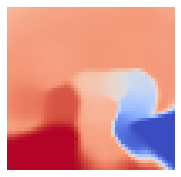

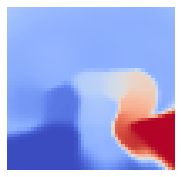

1 3 17100 27.761903116780008 28.136112213134766
1 3 17200 27.662931550758785 28.03436279296875
1 3 17300 28.090840170184414 28.250457763671875
1 3 17400 27.611284392330816 28.16440200805664
1 3 17500 28.081218406809626 28.14733123779297
1 3 17600 27.6603597568633 28.19121742248535
1 3 17700 28.04404032111941 28.34367561340332
1 3 17800 27.702159300327928 28.307573318481445
1 3 17900 27.701030042385153 28.304737091064453
1 3 18000 27.815242947866288 28.17258644104004


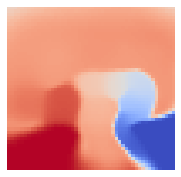

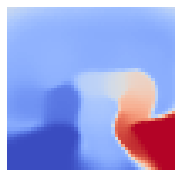

1 3 18100 27.665831193734427 28.303585052490234
1 3 18200 27.71985829363319 28.292375564575195
1 3 18300 27.87611359374944 28.245174407958984
1 3 18400 27.995346232924593 28.182973861694336
1 3 18500 27.66406080870156 28.147825241088867
1 3 18600 27.76531760423709 28.08232879638672
1 3 18700 27.69153699013072 28.415939331054688
1 3 18800 27.79333777228815 28.145065307617188
1 3 18900 27.932884911874737 28.21213150024414
1 3 19000 27.87095543488825 28.316301345825195


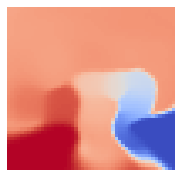

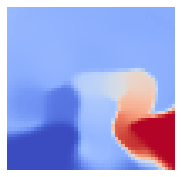

1 3 19100 27.664225947497492 28.064592361450195
1 3 19200 27.849557818256432 28.186222076416016
1 3 19300 27.782035478813576 28.059186935424805
1 3 19400 27.86354118865321 27.99754524230957
1 3 19500 27.664524654437194 28.442407608032227
1 3 19600 27.660456897331496 28.209924697875977
1 3 19700 27.690536443308307 28.20551872253418
1 3 19800 27.887797163561686 28.22814178466797
1 3 19900 27.699929926582833 28.2025146484375
1 3 20000 27.88415682451605 28.19580078125


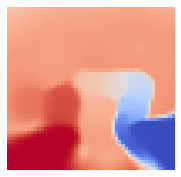

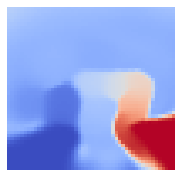

1 5 0 0.5505297154480265 4.401511192321777


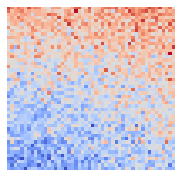

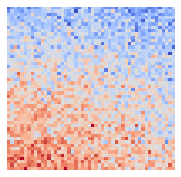

1 5 100 5.372912758385281 11.237239837646484
1 5 200 8.974288762227213 14.885543823242188
1 5 300 12.597144344970998 16.93560028076172
1 5 400 14.740076430183331 18.17833709716797
1 5 500 16.397198105646112 19.141538619995117
1 5 600 19.113433806056044 21.3359375
1 5 700 20.44474392267862 22.95181655883789
1 5 800 21.74349012585028 23.65437126159668
1 5 900 22.197029257809355 24.169097900390625
1 5 1000 23.053441482028315 24.473791122436523


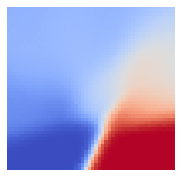

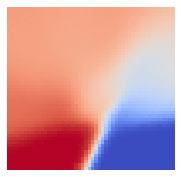

1 5 1100 23.25822573154345 24.991649627685547
1 5 1200 23.721117062078072 25.214088439941406
1 5 1300 24.371623064374234 25.75088882446289
1 5 1400 24.664907137439098 25.910320281982422
1 5 1500 24.766156647439516 26.03312110900879
1 5 1600 24.84712808470407 26.151546478271484
1 5 1700 25.01393769668979 26.347387313842773
1 5 1800 24.977332739761934 26.36852264404297
1 5 1900 25.21085113976937 26.398632049560547
1 5 2000 25.167086930335486 26.438390731811523


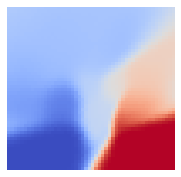

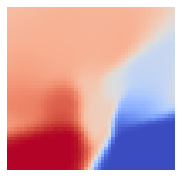

1 5 2100 25.394755045645834 26.553512573242188
1 5 2200 25.45946274002272 26.7637996673584
1 5 2300 25.566356111225307 26.572154998779297
1 5 2400 25.91723233937172 26.823833465576172
1 5 2500 25.721309729067737 26.639690399169922
1 5 2600 25.86038816589528 26.920406341552734
1 5 2700 25.900973453507458 27.181116104125977
1 5 2800 26.093564145752325 27.04438018798828
1 5 2900 26.037815231054793 26.88844108581543
1 5 3000 26.129190412463114 26.84821891784668


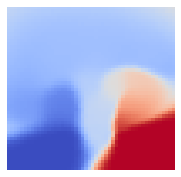

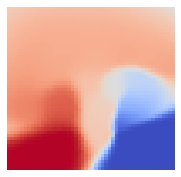

1 5 3100 25.69604592180173 26.899288177490234
1 5 3200 26.447864575402637 27.040185928344727
1 5 3300 26.089542530369023 26.99752426147461
1 5 3400 25.958764746548805 27.152938842773438
1 5 3500 26.214292748137694 27.191242218017578
1 5 3600 26.138889888212457 27.189960479736328
1 5 3700 26.547197989667893 27.212472915649414
1 5 3800 26.420291253505276 27.437448501586914
1 5 3900 26.66036177809252 27.3953914642334
1 5 4000 26.553626260150747 27.007383346557617


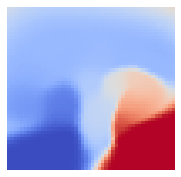

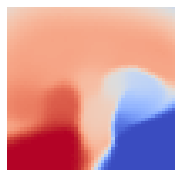

1 5 4100 26.63164948420556 27.383922576904297
1 5 4200 26.57431232285303 27.237384796142578
1 5 4300 26.655686893060597 27.55118751525879
1 5 4400 26.73215101260087 27.22354507446289
1 5 4500 27.090934474858415 27.349712371826172
1 5 4600 26.76929267061551 27.166675567626953
1 5 4700 26.593293570338474 27.441375732421875
1 5 4800 26.346998770251595 27.673095703125
1 5 4900 26.730659906414065 27.45806312561035
1 5 5000 26.87977052509452 27.43564224243164


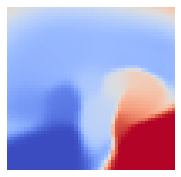

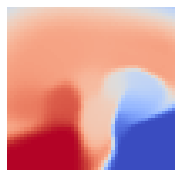

1 5 5100 26.46626298007891 27.37071418762207
1 5 5200 26.768619972873257 27.32085609436035
1 5 5300 26.868754796001127 27.272672653198242
1 5 5400 26.695543627161307 27.611404418945312
1 5 5500 26.64007156279813 27.561342239379883
1 5 5600 26.754267468697336 27.32056427001953
1 5 5700 26.964440585685633 27.690156936645508
1 5 5800 27.126560741569204 27.64763069152832
1 5 5900 26.94252812457238 27.7271785736084
1 5 6000 27.19330352875479 27.59090232849121


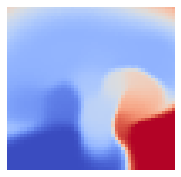

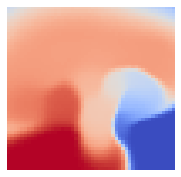

1 5 6100 27.022443159245306 27.720556259155273
1 5 6200 27.14961217467205 27.73629379272461
1 5 6300 27.089066949357353 27.559412002563477
1 5 6400 27.303516675457967 27.796056747436523
1 5 6500 26.983793395461927 27.752544403076172
1 5 6600 26.893445474504777 27.859418869018555
1 5 6700 27.128151416735907 27.752357482910156
1 5 6800 27.153502650423288 27.65484619140625
1 5 6900 27.324469874447786 27.815776824951172
1 5 7000 27.10843190169217 27.722251892089844


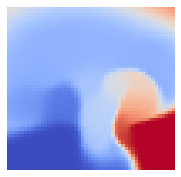

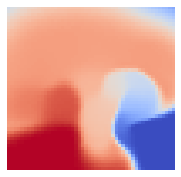

1 5 7100 27.223118366955763 27.55341911315918
1 5 7200 27.35760691666106 27.650821685791016
1 5 7300 27.055276637495467 27.869874954223633
1 5 7400 27.2228876583438 27.581134796142578
1 5 7500 27.203503277915342 27.952085494995117
1 5 7600 27.508203784504907 27.950410842895508
1 5 7700 27.18968018929109 27.831079483032227
1 5 7800 27.069286721520996 27.835988998413086
1 5 7900 27.355098264069902 27.931299209594727
1 5 8000 27.38112705252295 27.953275680541992


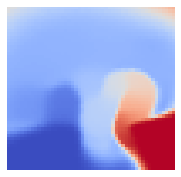

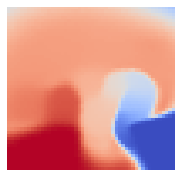

1 5 8100 27.22347778668809 27.8250732421875
1 5 8200 27.47526102322803 27.94416046142578
1 5 8300 27.512215685841394 27.999685287475586
1 5 8400 27.30262055463886 28.035018920898438
1 5 8500 27.43912719757092 27.841773986816406
1 5 8600 27.211937499066437 27.961809158325195
1 5 8700 27.826525813247223 27.995372772216797
1 5 8800 27.254562736510724 27.96940040588379
1 5 8900 27.423900429181238 27.861047744750977
1 5 9000 27.50246278283454 27.97995376586914


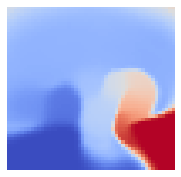

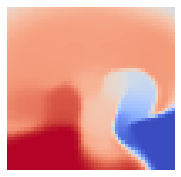

1 5 9100 27.468456333430918 27.837451934814453
1 5 9200 27.596074623523066 28.020034790039062
1 5 9300 27.278527290014612 27.75945281982422
1 5 9400 27.67271116739439 28.050893783569336
1 5 9500 27.452292159523147 28.09882354736328
1 5 9600 27.273580411671745 27.6932430267334
1 5 9700 27.477643393210528 27.688526153564453
1 5 9800 27.494400123974295 27.929468154907227
1 5 9900 27.575454130636817 27.893922805786133
1 5 10000 27.38948598981119 28.16237449645996


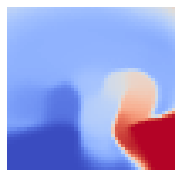

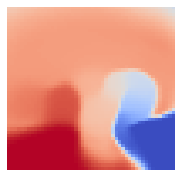

1 5 10100 27.057748862411046 28.018781661987305
1 5 10200 27.546154136917277 27.5714111328125
1 5 10300 27.74967070332246 27.926496505737305
1 5 10400 27.49229946134956 27.94013214111328
1 5 10500 27.22292165750767 28.041288375854492
1 5 10600 27.671205490137353 27.82481575012207
1 5 10700 27.12881440043134 27.967702865600586
1 5 10800 27.489715524895555 27.682035446166992
1 5 10900 27.572287351373635 27.88640022277832
1 5 11000 27.43230307968017 27.71494483947754


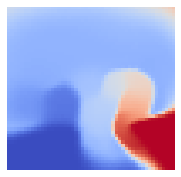

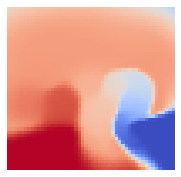

1 5 11100 27.565329665339117 27.944637298583984
1 5 11200 27.37908710269084 27.95878028869629
1 5 11300 27.42668593210675 27.987911224365234
1 5 11400 27.56230859677823 27.68574333190918
1 5 11500 27.524858517777066 28.087247848510742
1 5 11600 27.408406524504016 27.967802047729492
1 5 11700 27.412955126927283 27.901657104492188
1 5 11800 27.606769789071418 27.8404483795166
1 5 11900 27.324975004882404 27.773427963256836
1 5 12000 27.48791599772223 27.94332504272461


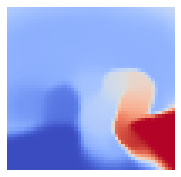

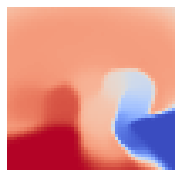

1 5 12100 27.431525955934603 27.91585922241211
1 5 12200 27.624235645253012 28.00534439086914
1 5 12300 28.0805117099035 28.034912109375
1 5 12400 27.65911393035869 27.924245834350586
1 5 12500 27.36237165662606 27.84100914001465
1 5 12600 27.484389798726724 27.99300765991211
1 5 12700 27.497078772384793 28.05455780029297
1 5 12800 27.534446281987986 27.889911651611328
1 5 12900 27.37381723229122 27.976213455200195
1 5 13000 27.729361059934437 27.994243621826172


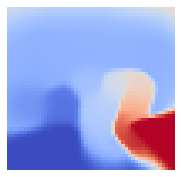

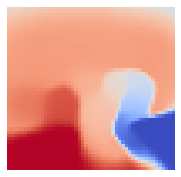

1 5 13100 27.41095403328245 27.8818416595459
1 5 13200 27.78241918366295 28.160036087036133
1 5 13300 27.552900542433473 27.888771057128906
1 5 13400 27.700495769810075 27.890846252441406
1 5 13500 27.44442378159929 27.904747009277344
1 5 13600 27.453729838452443 27.84052085876465
1 5 13700 27.536114669529248 28.161361694335938
1 5 13800 27.592412427872087 27.8614501953125
1 5 13900 27.81974540856716 28.137710571289062
1 5 14000 27.547164397786513 28.033533096313477


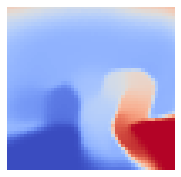

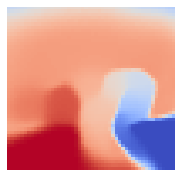

1 5 14100 27.479294781169855 28.10419464111328
1 5 14200 27.524156677894354 28.011425018310547
1 5 14300 27.703706262283944 28.288864135742188
1 5 14400 27.614898017747695 27.825572967529297
1 5 14500 27.700058637703194 28.024229049682617
1 5 14600 27.795484576635275 27.946338653564453
1 5 14700 27.753677747635535 27.96305274963379
1 5 14800 27.395906974758933 28.073589324951172
1 5 14900 27.59948668246844 28.023723602294922
1 5 15000 27.717262214620657 28.22793197631836


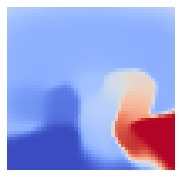

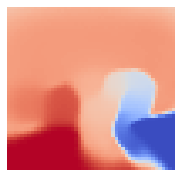

1 5 15100 27.448797531179807 28.122278213500977
1 5 15200 27.92912557575556 28.1715030670166
1 5 15300 27.751156952485857 27.897127151489258
1 5 15400 27.729191064115096 28.089841842651367
1 5 15500 27.272463296287494 27.997472763061523
1 5 15600 27.663188972999503 28.062166213989258
1 5 15700 27.509665748551253 28.04128074645996
1 5 15800 27.767906397714505 28.081600189208984
1 5 15900 27.747162050731305 28.348857879638672
1 5 16000 27.34071418924182 28.095361709594727


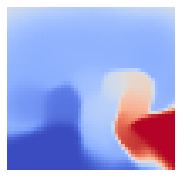

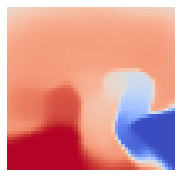

1 5 16100 27.7287466464731 28.024402618408203
1 5 16200 27.68790636513191 28.032779693603516
1 5 16300 27.69596659548045 28.036548614501953
1 5 16400 27.7711290327469 28.23244857788086
1 5 16500 27.47773810516702 28.08210563659668
1 5 16600 27.898353903942855 27.974348068237305
1 5 16700 27.77455809127421 28.18446159362793
1 5 16800 27.661071310792835 28.143245697021484
1 5 16900 28.02655503684418 27.997093200683594
1 5 17000 27.705498503922154 27.99981117248535


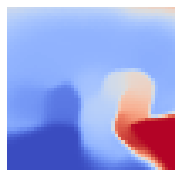

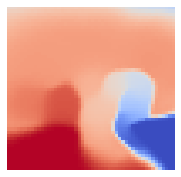

1 5 17100 27.653562352601305 27.897165298461914
1 5 17200 27.84505050053215 28.084897994995117
1 5 17300 27.516740003147607 28.32819175720215
1 5 17400 27.54269593624951 27.97087860107422
1 5 17500 27.373965371505218 28.289730072021484
1 5 17600 27.932855769734278 28.18531036376953
1 5 17700 27.682604924080124 27.979473114013672
1 5 17800 27.44237897474377 28.039016723632812
1 5 17900 27.752730628070626 28.12539291381836
1 5 18000 27.87309009667685 28.20380401611328


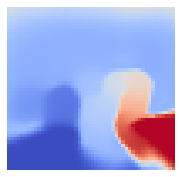

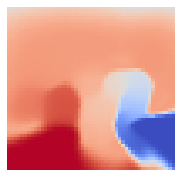

1 5 18100 27.46476013861607 28.149627685546875
1 5 18200 27.958546995060345 27.910654067993164
1 5 18300 27.798520216266393 28.27798843383789
1 5 18400 27.845276352120706 28.10833740234375
1 5 18500 27.582589098025792 27.943220138549805
1 5 18600 27.622266122260342 27.942461013793945
1 5 18700 27.410215765724164 27.93042755126953
1 5 18800 27.64493385051382 27.98582649230957
1 5 18900 27.85374942945908 27.948232650756836
1 5 19000 27.783963717107262 28.21415901184082


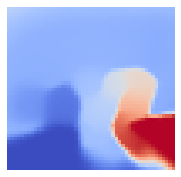

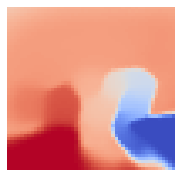

1 5 19100 27.710098105091223 28.07388687133789
1 5 19200 27.66694102358356 28.134836196899414
1 5 19300 27.997952025983945 28.094593048095703
1 5 19400 27.71438442825036 28.12462615966797
1 5 19500 27.520759190019206 27.75661277770996
1 5 19600 27.530261956320455 28.102432250976562
1 5 19700 27.724644890203535 28.23222541809082
1 5 19800 27.603379586731386 27.964569091796875
1 5 19900 27.86370147042573 27.714998245239258
1 5 20000 27.81389269535837 28.32903480529785


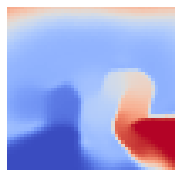

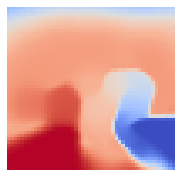

1 30 0 0.5546436901671068 4.40047550201416


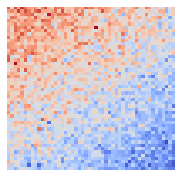

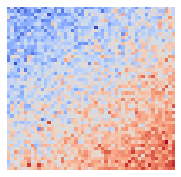

1 30 100 2.7386372030677593 10.43769359588623
1 30 200 8.350284501038626 13.98036003112793
1 30 300 11.871486833711057 16.51519203186035
1 30 400 14.882897203548113 18.02701187133789
1 30 500 17.390248112429195 19.740921020507812
1 30 600 19.969005765225113 22.064725875854492
1 30 700 21.49911385001026 23.005958557128906
1 30 800 22.273228669573793 23.686113357543945
1 30 900 23.043584153018152 24.100358963012695
1 30 1000 23.8704608178822 24.5892391204834


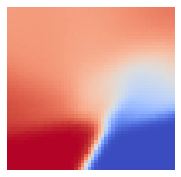

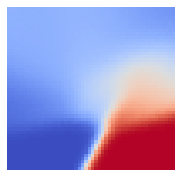

1 30 1100 23.8847550377772 25.10981559753418
1 30 1200 24.539702787981614 25.67259407043457
1 30 1300 25.10329721338305 26.003406524658203
1 30 1400 24.931125447552926 26.149150848388672
1 30 1500 25.288437231717303 26.277164459228516
1 30 1600 25.73465440088613 26.420974731445312
1 30 1700 25.783049782141244 26.694087982177734
1 30 1800 25.5882394301981 26.469757080078125
1 30 1900 26.070789562983837 27.009674072265625
1 30 2000 25.781830669265386 27.06886863708496


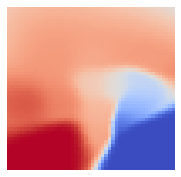

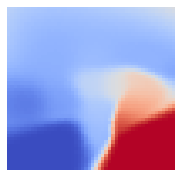

1 30 2100 25.936398153746737 26.698209762573242
1 30 2200 26.036768542509982 27.030542373657227
1 30 2300 26.34813288521778 27.125940322875977
1 30 2400 26.450373227993794 27.207338333129883
1 30 2500 26.11556160477525 27.022296905517578
1 30 2600 26.303895116001442 27.348962783813477
1 30 2700 26.23776431376549 27.218202590942383
1 30 2800 26.548866377209155 27.247644424438477
1 30 2900 26.488384293198784 27.329025268554688
1 30 3000 26.584376075358108 27.404205322265625


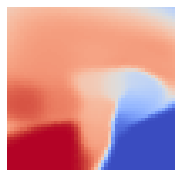

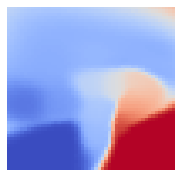

1 30 3100 26.710634398895515 27.28595542907715
1 30 3200 26.889389859957607 27.297534942626953
1 30 3300 26.54082557495425 27.232746124267578
1 30 3400 26.672926897653635 27.394763946533203
1 30 3500 26.622003435713726 27.44667625427246
1 30 3600 26.801895440253706 27.6748046875
1 30 3700 26.630510512215967 27.603546142578125
1 30 3800 26.84546051172779 27.533681869506836
1 30 3900 27.037244938086634 27.768028259277344
1 30 4000 26.950071081927778 27.464706420898438


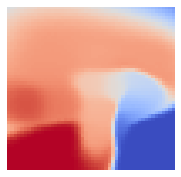

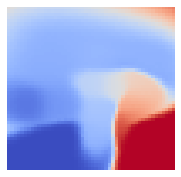

1 30 4100 27.047206693100105 27.720476150512695
1 30 4200 26.98554678091286 27.665945053100586
1 30 4300 26.707283052742763 27.31573486328125
1 30 4400 26.859324885051024 27.27783966064453
1 30 4500 27.241193779575287 27.621959686279297
1 30 4600 27.104393286726935 27.625709533691406
1 30 4700 27.004962731993484 27.71696662902832
1 30 4800 27.249054871964027 27.850990295410156
1 30 4900 27.27927041459631 27.791576385498047
1 30 5000 27.081052860731205 27.73004722595215


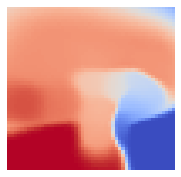

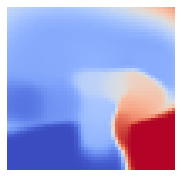

1 30 5100 26.839326091161226 27.644729614257812
1 30 5200 27.063242155887515 27.58564567565918
1 30 5300 27.335041185899186 27.64153289794922
1 30 5400 27.215687121138792 27.78362464904785
1 30 5500 27.331157995683064 27.799928665161133
1 30 5600 27.316436357727998 27.66520881652832
1 30 5700 27.106651802612486 27.819013595581055
1 30 5800 27.35691479082516 27.615467071533203
1 30 5900 27.245222680493704 27.65605354309082
1 30 6000 27.33974278455986 27.910661697387695


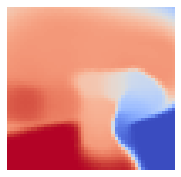

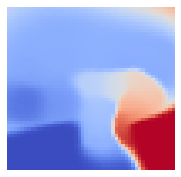

1 30 6100 27.130677068908998 27.484628677368164
1 30 6200 26.99119307062674 27.765531539916992
1 30 6300 27.46386158928526 27.996742248535156
1 30 6400 27.73702058585167 27.629863739013672
1 30 6500 27.53328545339305 27.913148880004883
1 30 6600 27.21502656595506 27.909822463989258
1 30 6700 27.527240887759568 27.895240783691406
1 30 6800 27.346302194674777 28.03321075439453
1 30 6900 27.278073158325796 27.96039390563965
1 30 7000 27.574290873530174 27.94892692565918


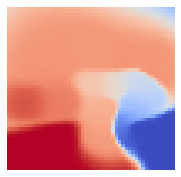

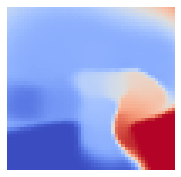

1 30 7100 27.259912747796605 27.945554733276367
1 30 7200 27.554415933737324 28.044126510620117
1 30 7300 27.539621440431116 27.64356803894043
1 30 7400 27.581632264414065 28.00414276123047
1 30 7500 27.44026859807222 27.992727279663086
1 30 7600 27.41261999231201 28.080717086791992
1 30 7700 27.565341807897642 28.029924392700195
1 30 7800 27.38763789240377 27.883657455444336
1 30 7900 27.65999790861927 27.784772872924805
1 30 8000 27.246696787098575 27.56144905090332


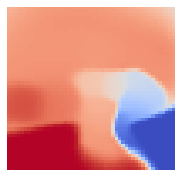

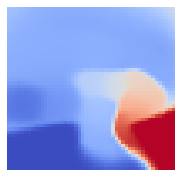

1 30 8100 27.243539721882215 27.785303115844727
1 30 8200 27.460012398233005 27.965293884277344
1 30 8300 27.18893220768598 27.75530242919922
1 30 8400 27.55472678323555 27.959918975830078
1 30 8500 27.632990429949153 27.9423770904541
1 30 8600 27.203202142463933 27.746240615844727
1 30 8700 27.92198817985488 27.920310974121094
1 30 8800 27.889346554029405 27.978422164916992
1 30 8900 27.633444561637965 28.096364974975586
1 30 9000 27.1101318598856 27.98525047302246


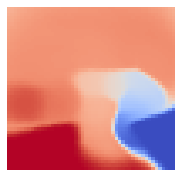

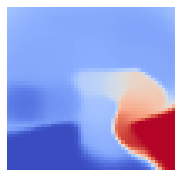

1 30 9100 27.655973864724263 27.97564125061035
1 30 9200 27.4733619270748 28.085433959960938
1 30 9300 27.57575769459993 28.089889526367188
1 30 9400 27.746377641450625 27.76078987121582
1 30 9500 27.954338384275765 27.933504104614258
1 30 9600 27.81175560505806 28.10025405883789
1 30 9700 27.518430247294216 27.81960105895996
1 30 9800 27.78448341861211 27.872108459472656
1 30 9900 27.683180481354185 27.914377212524414
1 30 10000 27.496602784090634 27.93041229248047


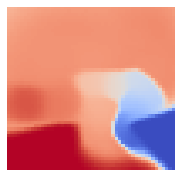

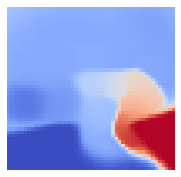

1 30 10100 27.798129225881905 28.033140182495117
1 30 10200 27.754148878906285 28.027267456054688
1 30 10300 27.60799133045898 28.215280532836914
1 30 10400 27.447243283688675 28.03374671936035
1 30 10500 27.519918924969314 28.03142738342285
1 30 10600 27.755545273136597 28.043176651000977
1 30 10700 27.74185818116782 27.992950439453125
1 30 10800 27.83674741901312 28.219585418701172
1 30 10900 27.760079304489633 27.983379364013672
1 30 11000 27.79849835966105 28.267601013183594


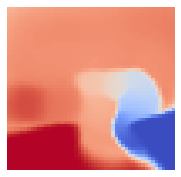

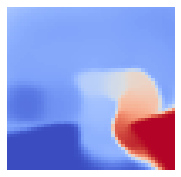

1 30 11100 27.686670252674116 28.266408920288086
1 30 11200 27.583154941253035 27.97806739807129
1 30 11300 27.65324664607967 28.070781707763672
1 30 11400 27.386421208039618 27.95022964477539
1 30 11500 28.06834243775028 27.989931106567383
1 30 11600 27.8090939562295 27.866456985473633
1 30 11700 27.774953938682106 28.19162368774414
1 30 11800 27.545126876466107 27.960905075073242
1 30 11900 27.76634486468826 28.181169509887695
1 30 12000 27.66069246296687 28.32058334350586


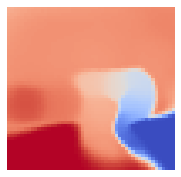

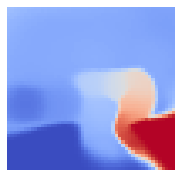

1 30 12100 28.19905708026617 28.09181022644043
1 30 12200 27.78648936928035 28.06943130493164
1 30 12300 27.550331177049696 27.91357421875
1 30 12400 27.76587373341751 28.246158599853516
1 30 12500 27.664563510624472 28.21326446533203
1 30 12600 27.91612332408756 28.254364013671875
1 30 12700 27.987057722475793 28.101533889770508
1 30 12800 27.962231047316667 28.012243270874023
1 30 12900 27.479520632758412 28.148839950561523
1 30 13000 27.72787238225934 27.94985580444336


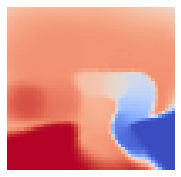

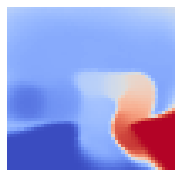

1 30 13100 27.745751085430765 27.81500244140625
1 30 13200 27.704024397317284 28.04383087158203
1 30 13300 27.8236868830642 28.076618194580078
1 30 13400 27.571298947109746 27.982662200927734
1 30 13500 27.831727685319105 28.21933364868164
1 30 13600 27.85438569952576 28.111921310424805
1 30 13700 28.02273498793238 28.03883934020996
1 30 13800 27.81086191275066 28.27266502380371
1 30 13900 27.71857846796471 28.25397300720215
1 30 14000 27.859638570343446 28.099912643432617


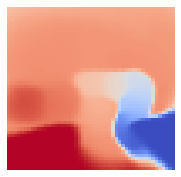

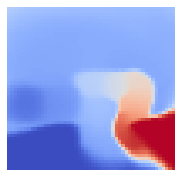

1 30 14100 27.668347131860695 27.93404197692871
1 30 14200 27.770162485088353 28.008337020874023
1 30 14300 27.55543105162997 28.11827850341797
1 30 14400 27.811677892683505 28.119020462036133
1 30 14500 27.79905934586488 28.206035614013672
1 30 14600 27.701807166130717 28.05547523498535
1 30 14700 27.9345047291819 28.368938446044922
1 30 14800 28.002806620882026 27.937501907348633
1 30 14900 27.68182294331115 28.276634216308594
1 30 15000 27.517696836759338 28.07382583618164


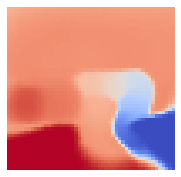

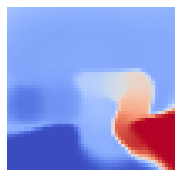

1 30 15100 27.869969459136062 28.123985290527344
1 30 15200 28.01672927848618 28.01080894470215
1 30 15300 27.624876772343104 28.44024085998535
1 30 15400 27.811704606312258 28.111608505249023
1 30 15500 27.975230870472963 28.119190216064453
1 30 15600 27.875931455371575 28.15134048461914
1 30 15700 27.917881566561903 28.32843589782715
1 30 15800 27.921378623416953 27.97806739807129
1 30 15900 28.024592799386625 28.379682540893555
1 30 16000 27.521516885671133 28.12110710144043


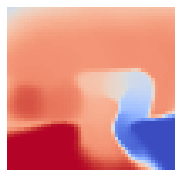

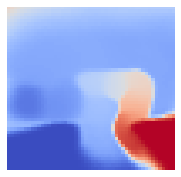

1 30 16100 27.996473062355665 28.04960060119629
1 30 16200 27.9239334177305 28.30465316772461
1 30 16300 27.973793191543667 28.26773452758789
1 30 16400 27.717548779001834 28.256357192993164
1 30 16500 27.9877547053351 28.255258560180664
1 30 16600 27.98533347916532 28.167816162109375
1 30 16700 27.95906669656519 28.298368453979492
1 30 16800 27.85388299760285 28.33140754699707
1 30 16900 28.088950788078005 28.33946990966797
1 30 17000 28.075419120858342 28.282018661499023


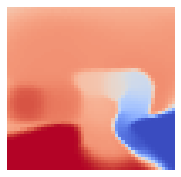

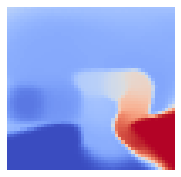

1 30 17100 27.932515778095592 28.158933639526367
1 30 17200 28.31145588750375 28.22716522216797
1 30 17300 28.090764886321562 28.020389556884766
1 30 17400 28.322459474038624 28.085487365722656
1 30 17500 27.863803467917336 28.191055297851562
1 30 17600 27.857550050277236 28.14661407470703
1 30 17700 27.379694230617062 28.096677780151367
1 30 17800 28.023553396376933 28.110118865966797
1 30 17900 27.83171554276058 28.046489715576172
1 30 18000 27.47488946093718 28.219287872314453


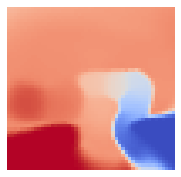

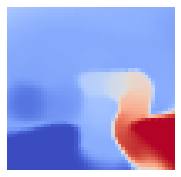

1 30 18100 27.878257969584862 28.197938919067383
1 30 18200 28.05334880648427 28.291292190551758
1 30 18300 27.778608848797973 28.184228897094727
1 30 18400 27.76702970498904 28.211870193481445
1 30 18500 28.04010370364578 28.476106643676758
1 30 18600 27.851024639326187 28.19295883178711
1 30 18700 27.9588724156288 28.197587966918945
1 30 18800 28.243685839866995 28.54083824157715
1 30 18900 28.175158096578315 28.254520416259766
1 30 19000 27.830892277292623 28.103267669677734


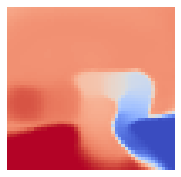

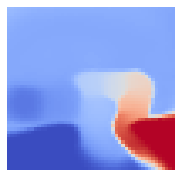

1 30 19100 27.768545096292893 28.078388214111328
1 30 19200 27.97955604981938 28.365245819091797
1 30 19300 28.007644216198177 28.318931579589844
1 30 19400 27.892187912724133 28.15615463256836
1 30 19500 27.9624447563467 28.264341354370117
1 30 19600 28.12419820696283 28.249361038208008
1 30 19700 27.85332929693413 28.05156898498535
1 30 19800 27.801723423205146 28.078739166259766
1 30 19900 27.86455873505756 28.1890811920166
1 30 20000 28.040905112508394 28.232975006103516


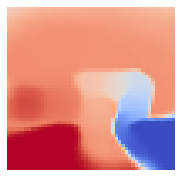

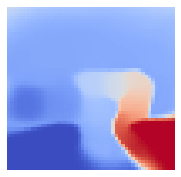

2 1 0 0.423658496269095 4.743422985076904


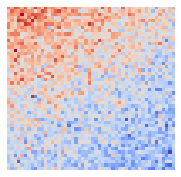

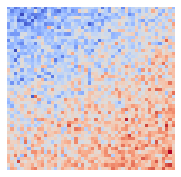

2 1 100 3.2856910352471664 14.436196327209473
2 1 200 6.645055830085685 15.530919075012207
2 1 300 12.458167905635062 20.128087997436523
2 1 400 16.13682765171767 22.110849380493164
2 1 500 19.372362938287633 25.334890365600586
2 1 600 21.886689747041025 26.39375114440918
2 1 700 23.576686185452946 27.12765884399414
2 1 800 24.60876237533367 27.48050880432129
2 1 900 25.111209304517594 27.853384017944336
2 1 1000 25.28347821081591 28.004056930541992


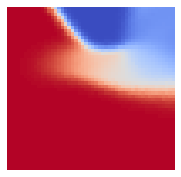

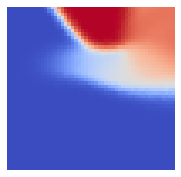

2 1 1100 26.011099173789262 28.304134368896484
2 1 1200 26.580038753453167 28.563995361328125
2 1 1300 26.606599385969584 28.82935905456543
2 1 1400 27.0691895810528 29.16968536376953
2 1 1500 27.335067899527942 29.305374145507812
2 1 1600 27.287216504894722 29.38779640197754
2 1 1700 27.956298193221613 29.52256202697754
2 1 1800 27.763479220876484 29.635343551635742
2 1 1900 27.95046976512987 29.41139030456543
2 1 2000 27.747625896466943 29.61043357849121


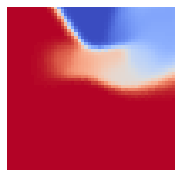

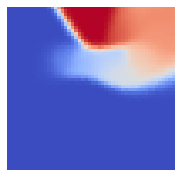

2 1 2100 28.135417931039438 29.674413681030273
2 1 2200 28.017938677315218 29.92095947265625
2 1 2300 27.963119882600658 29.603862762451172
2 1 2400 28.042437503394183 29.715787887573242
2 1 2500 28.25944930934346 29.72855567932129
2 1 2600 28.187045661373766 29.932056427001953
2 1 2700 28.227504666377293 29.850542068481445
2 1 2800 28.637027023685174 30.054336547851562
2 1 2900 28.628765226865127 29.81875228881836
2 1 3000 28.185709979936075 29.851909637451172


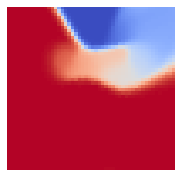

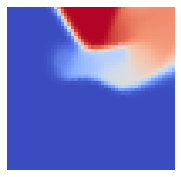

2 1 3100 28.505826678828306 30.031169891357422
2 1 3200 28.478814343134776 29.930212020874023
2 1 3300 28.351111055132957 30.122089385986328
2 1 3400 28.496372482761156 29.906757354736328
2 1 3500 28.64398228120799 30.074087142944336
2 1 3600 28.641250205539983 30.167234420776367
2 1 3700 28.452013287959574 30.023618698120117
2 1 3800 28.40856235653562 30.202293395996094
2 1 3900 28.731211993136057 30.194015502929688
2 1 4000 28.447265547576507 30.03412437438965


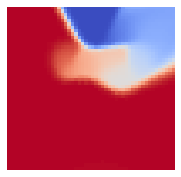

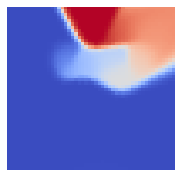

2 1 4100 28.908092643161968 30.19920539855957
2 1 4200 28.533567568033305 30.11051368713379
2 1 4300 28.313194701884456 29.996734619140625
2 1 4400 28.964837247658508 30.335878372192383
2 1 4500 28.671470605195676 30.07216453552246
2 1 4600 29.18766776765271 30.534528732299805
2 1 4700 28.808851512341498 30.463682174682617
2 1 4800 29.026443732588245 30.27585792541504
2 1 4900 28.98255566905741 30.280881881713867
2 1 5000 29.107599736742372 30.191265106201172


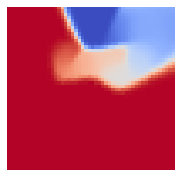

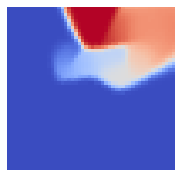

2 1 5100 29.050568567864655 30.499074935913086
2 1 5200 29.017358670300236 30.39752769470215
2 1 5300 28.8973391933327 30.325931549072266
2 1 5400 28.651289672928012 30.263729095458984
2 1 5500 28.87488274559755 30.580699920654297
2 1 5600 29.304270328651462 30.44074058532715
2 1 5700 28.76370062272412 30.36000633239746
2 1 5800 29.01205965776016 30.370573043823242
2 1 5900 29.101912162329512 30.266687393188477
2 1 6000 28.924771661551176 30.368684768676758


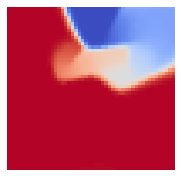

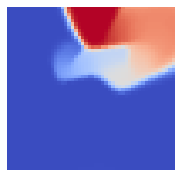

2 1 6100 29.141339049858455 30.383920669555664
2 1 6200 29.021254003074887 30.4825496673584
2 1 6300 29.278630102071197 30.559921264648438
2 1 6400 29.205825749670197 30.230457305908203
2 1 6500 28.95122058252917 30.385690689086914
2 1 6600 28.980180584610025 30.292224884033203
2 1 6700 28.93260604031116 30.43160629272461
2 1 6800 28.942358943318013 30.529239654541016
2 1 6900 29.099925639754908 30.497041702270508
2 1 7000 29.31127172789667 30.435977935791016


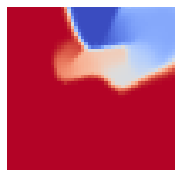

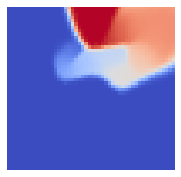

2 1 7100 28.919946208793554 30.29229736328125
2 1 7200 29.341948687752883 30.50108528137207
2 1 7300 29.18401042902514 30.52424430847168
2 1 7400 29.059760484667677 30.754196166992188
2 1 7500 29.52906551461492 30.42981719970703
2 1 7600 28.92507279700258 30.424047470092773
2 1 7700 29.003982427829683 30.6320858001709
2 1 7800 29.53335912330917 30.52208137512207
2 1 7900 29.2924774758125 30.4506893157959
2 1 8000 29.47277261329549 30.6323299407959


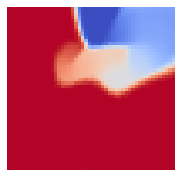

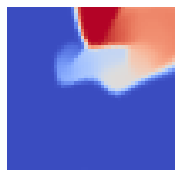

2 1 8100 28.953775376842717 30.6468505859375
2 1 8200 29.110647518932012 30.532699584960938
2 1 8300 29.670363611140736 30.423580169677734
2 1 8400 29.295576256747943 30.740150451660156
2 1 8500 29.05780067572183 30.380874633789062
2 1 8600 29.093378372198515 30.688411712646484
2 1 8700 29.177873579946873 30.20110511779785
2 1 8800 29.234751752587183 30.576631546020508
2 1 8900 29.616967924285245 30.668781280517578
2 1 9000 29.30536073040696 30.48665428161621


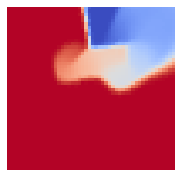

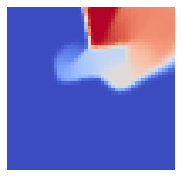

2 1 9100 29.130415604209848 30.330589294433594
2 1 9200 29.34893551592786 30.461650848388672
2 1 9300 29.605320782148574 30.65823745727539
2 1 9400 29.154389871760554 30.302053451538086
2 1 9500 29.621370816006216 30.679407119750977
2 1 9600 29.368625888831136 30.466873168945312
2 1 9700 29.40184792895408 30.74555015563965
2 1 9800 29.180617798173405 30.4497013092041
2 1 9900 29.36620951968477 30.65741539001465
2 1 10000 29.30109383534146 30.689241409301758


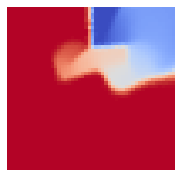

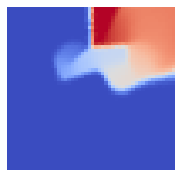

2 1 10100 29.250058661863125 30.70608901977539
2 1 10200 29.586779095281713 30.658178329467773
2 1 10300 29.183804005530224 30.730941772460938
2 1 10400 29.660144433886543 30.517833709716797
2 1 10500 29.426108760885963 30.564559936523438
2 1 10600 29.204966056526665 30.77568817138672
2 1 10700 29.14659192067614 30.397274017333984
2 1 10800 29.61737348573996 30.534862518310547
2 1 10900 29.38802241181812 30.479148864746094
2 1 11000 29.30819480356657 30.642980575561523


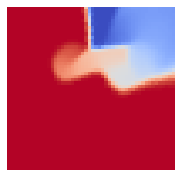

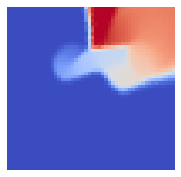

2 1 11100 29.636408160482915 30.659690856933594
2 1 11200 29.609832956896266 30.449138641357422
2 1 11300 29.51094638878471 30.744497299194336
2 1 11400 29.411904395924044 30.571720123291016
2 1 11500 29.344311629641744 30.59028434753418
2 1 11600 29.609162687665716 30.88112449645996
2 1 11700 29.466108777177265 30.666074752807617
2 1 11800 29.490209327336625 30.596046447753906
2 1 11900 29.51260263376745 30.696102142333984
2 1 12000 29.448557923086 30.669906616210938


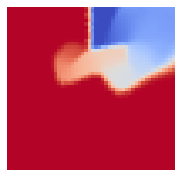

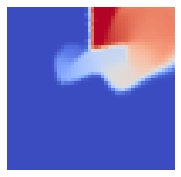

2 1 12100 29.541560207336598 30.64093017578125
2 1 12200 29.84885436442699 30.642751693725586
2 1 12300 29.333711176049885 30.630800247192383
2 1 12400 29.701178996164128 30.575746536254883
2 1 12500 29.585902402556247 30.631549835205078
2 1 12600 29.5571439669469 30.65301513671875
2 1 12700 29.382371265080835 30.619178771972656
2 1 12800 29.477576209447772 30.85814666748047
2 1 12900 29.50340828845272 30.789613723754883
2 1 13000 29.79544410650127 30.768733978271484


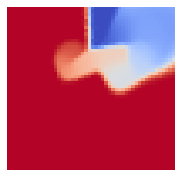

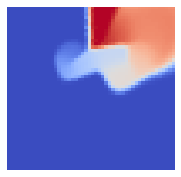

2 1 13100 29.58797878006393 30.662874221801758
2 1 13200 29.51300576671046 30.658737182617188
2 1 13300 29.332322067354685 30.83828353881836
2 1 13400 29.7957573845112 30.630237579345703
2 1 13500 29.363909719100235 30.860183715820312
2 1 13600 29.424743937307813 30.70371437072754
2 1 13700 29.557020112849948 30.477415084838867
2 1 13800 29.925690046258115 30.5605411529541
2 1 13900 29.55912320398639 30.5679931640625
2 1 14000 29.77986034689097 30.779407501220703


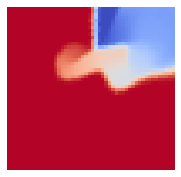

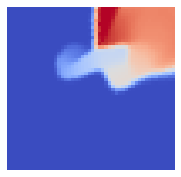

2 1 14100 29.377533669764688 30.763826370239258
2 1 14200 29.576763913010733 30.943445205688477
2 1 14300 29.91797952159508 30.6008358001709
2 1 14400 29.774308769133583 30.72453498840332
2 1 14500 29.857631005728475 30.687904357910156
2 1 14600 30.15450684760488 30.71887969970703
2 1 14700 29.564138080656992 30.139694213867188
2 1 14800 29.581351371621277 30.73149299621582
2 1 14900 29.687856180951083 30.72170066833496
2 1 15000 29.701856550929794 30.89712142944336


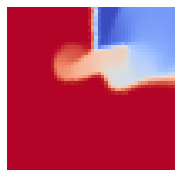

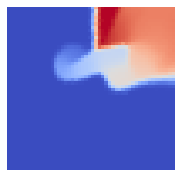

2 1 15100 29.24268570032707 30.55441665649414
2 1 15200 29.781278597726626 30.67713165283203
2 1 15300 29.4048859970969 30.861804962158203
2 1 15400 29.7188828464928 30.828001022338867
2 1 15500 29.570461925136534 30.35365867614746
2 1 15600 29.428595556871777 30.551172256469727
2 1 15700 29.64214187661817 30.656190872192383
2 1 15800 29.320184365853628 30.475784301757812
2 1 15900 29.73068055635517 30.57991600036621
2 1 16000 29.45834482525672 30.730758666992188


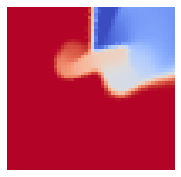

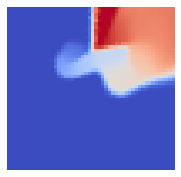

2 1 16100 29.475735397575463 30.96190071105957
2 1 16200 29.39761989007586 30.348464965820312
2 1 16300 29.73090155092032 30.901500701904297
2 1 16400 29.83121122689094 30.59698486328125
2 1 16500 29.509977412614457 30.77674674987793
2 1 16600 29.347988396362954 30.767263412475586
2 1 16700 29.567841561006954 30.461753845214844
2 1 16800 29.770673287111357 30.575992584228516
2 1 16900 29.987711806689386 30.758087158203125
2 1 17000 29.571770892945473 30.695737838745117


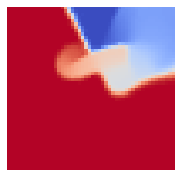

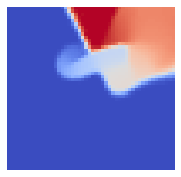

2 1 17100 29.62094582645786 30.659133911132812
2 1 17200 29.911898528286024 30.717206954956055
2 1 17300 29.652443623270326 30.78767967224121
2 1 17400 29.592942657988733 30.662078857421875
2 1 17500 29.599317501214077 30.81625747680664
2 1 17600 29.960548903270155 30.957122802734375
2 1 17700 29.493043400496237 30.708520889282227
2 1 17800 29.63162156391257 30.7291202545166
2 1 17900 29.73970733436226 30.71756362915039
2 1 18000 29.5695026630131 30.759449005126953


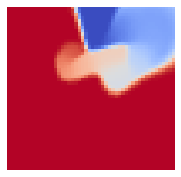

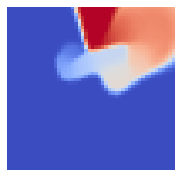

2 1 18100 29.957442836799597 30.81707191467285
2 1 18200 29.90227676491124 30.735912322998047
2 1 18300 29.47553625961566 30.75921058654785
2 1 18400 29.728378327258934 30.869522094726562
2 1 18500 29.279511651820073 30.951257705688477
2 1 18600 29.62844992762598 30.91925048828125
2 1 18700 29.546111238271568 30.792098999023438
2 1 18800 29.71378540042423 30.863018035888672
2 1 18900 29.494835642134447 30.51032829284668
2 1 19000 29.50906914923683 30.650493621826172


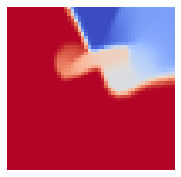

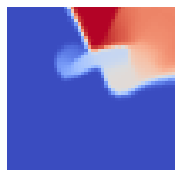

2 1 19100 29.796755502821913 30.791229248046875
2 1 19200 29.7574427553431 30.9481143951416
2 1 19300 29.865258960993547 30.747682571411133
2 1 19400 29.671517154200558 30.64100456237793
2 1 19500 29.748950249911086 30.67928123474121
2 1 19600 29.830159681322723 30.76418685913086
2 1 19700 29.40773464132674 30.675777435302734
2 1 19800 29.862835306312064 30.700632095336914
2 1 19900 29.985589287459312 30.767440795898438
2 1 20000 29.78073461110473 30.830493927001953


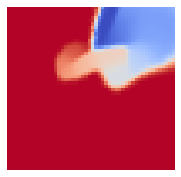

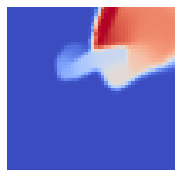

2 3 0 0.5173266860182744 4.743655681610107


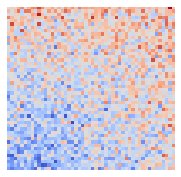

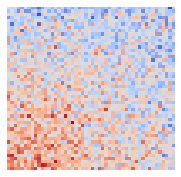

2 3 100 3.6763608561899614 14.09615707397461
2 3 200 7.27644215972922 16.058361053466797
2 3 300 11.037546842553327 19.366455078125
2 3 400 15.837484441949096 21.700756072998047
2 3 500 18.15879921167682 23.003793716430664
2 3 600 20.56182247197153 25.11050033569336
2 3 700 22.56541262683634 26.264907836914062
2 3 800 23.948452471284853 27.383941650390625
2 3 900 25.101789107614312 27.651226043701172
2 3 1000 25.735586949380806 28.261981964111328


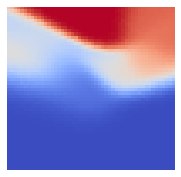

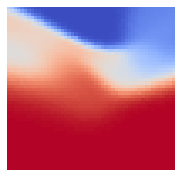

2 3 1100 26.2621878559816 28.412813186645508
2 3 1200 26.511581437003926 28.971403121948242
2 3 1300 26.8637302052837 29.009193420410156
2 3 1400 27.44123514573077 29.158618927001953
2 3 1500 27.077776798441302 29.405397415161133
2 3 1600 27.796844543190016 29.662799835205078
2 3 1700 27.23525606845682 29.77862548828125
2 3 1800 27.747101337938684 29.796398162841797
2 3 1900 28.12285766850173 30.15334701538086
2 3 2000 28.409120914227746 30.347732543945312


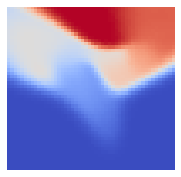

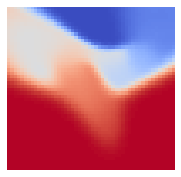

2 3 2100 28.323061744941437 30.41558074951172
2 3 2200 28.77796812899037 30.24669075012207
2 3 2300 28.618655332637655 30.416372299194336
2 3 2400 28.978871616801086 30.620868682861328
2 3 2500 29.46642934072231 30.548784255981445
2 3 2600 29.43899930101554 30.710113525390625
2 3 2700 29.211608036039546 30.67641258239746
2 3 2800 29.162311676941915 30.706520080566406
2 3 2900 29.319999798964055 30.686574935913086
2 3 3000 29.328157169780795 30.801244735717773


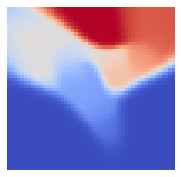

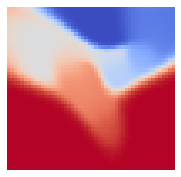

2 3 3100 29.619651429719152 30.50873374938965
2 3 3200 29.271203713277632 30.774702072143555
2 3 3300 29.461960879185305 30.600635528564453
2 3 3400 29.522690671389576 30.684839248657227
2 3 3500 29.602311856146212 30.660743713378906
2 3 3600 29.629273193093937 30.6903133392334
2 3 3700 29.60982567136115 30.755355834960938
2 3 3800 29.809602329740798 30.69007682800293
2 3 3900 29.606258187666665 30.65995979309082
2 3 4000 29.7490571044261 30.82456398010254


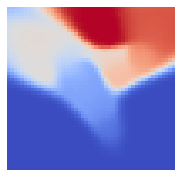

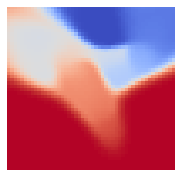

2 3 4100 29.598219813923468 30.91534423828125
2 3 4200 29.553812048887785 30.77231788635254
2 3 4300 29.88081357846339 30.810930252075195
2 3 4400 30.077705164937623 30.95762062072754
2 3 4500 29.87724123774549 30.974267959594727
2 3 4600 30.12993759468647 31.02409553527832
2 3 4700 30.027493256927247 30.872697830200195
2 3 4800 30.303231332924256 31.0061092376709
2 3 4900 30.050683115197273 30.846105575561523
2 3 5000 30.271218691630352 31.13178062438965


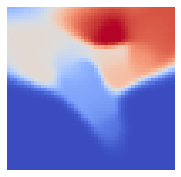

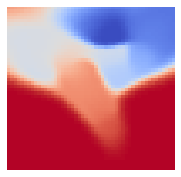

2 3 5100 30.06969350482318 30.993423461914062
2 3 5200 30.07801601443585 31.090574264526367
2 3 5300 30.525316299825054 31.02862548828125
2 3 5400 30.169092488904468 31.18036460876465
2 3 5500 30.323723114690146 31.00600814819336
2 3 5600 30.341383251808132 31.098186492919922
2 3 5700 30.043788570467083 31.229244232177734
2 3 5800 30.238159361791638 30.917041778564453
2 3 5900 30.131399558732817 31.255386352539062
2 3 6000 30.070660052481728 31.243722915649414


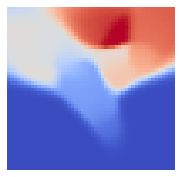

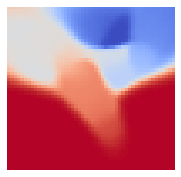

2 3 6100 30.343610197041517 31.324111938476562
2 3 6200 30.326258480910056 31.27487564086914
2 3 6300 30.527181396814413 31.368520736694336
2 3 6400 30.61928998875761 31.095046997070312
2 3 6500 30.382837946610664 31.38825035095215
2 3 6600 30.494804478764774 31.5258846282959
2 3 6700 30.73435287333546 31.252239227294922
2 3 6800 30.649704669349696 31.314926147460938
2 3 6900 30.294661115117687 31.422178268432617
2 3 7000 30.597389670202883 31.310049057006836


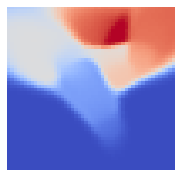

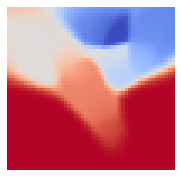

2 3 7100 30.634502186077064 31.369884490966797
2 3 7200 30.621104087001164 31.310501098632812
2 3 7300 30.68229286791766 31.411386489868164
2 3 7400 30.62718993733363 31.487817764282227
2 3 7500 30.157394348021995 31.314592361450195
2 3 7600 30.45044042693978 31.261993408203125
2 3 7700 30.618911140931647 31.224231719970703
2 3 7800 31.046882901661604 31.35508918762207
2 3 7900 30.827498439776647 31.51406478881836
2 3 8000 30.40398299802517 31.520225524902344


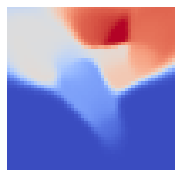

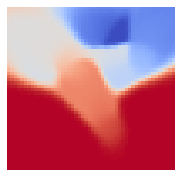

2 3 8100 30.941857055960078 31.53230094909668
2 3 8200 30.74703698997012 31.22136688232422
2 3 8300 30.77228379765419 31.39605712890625
2 3 8400 30.715964182706006 31.57941436767578
2 3 8500 30.967213146670872 31.327600479125977
2 3 8600 30.752474427677377 31.241329193115234
2 3 8700 30.95260079174253 31.47911262512207
2 3 8800 30.74382649749625 31.547447204589844
2 3 8900 30.876316382068417 31.379737854003906
2 3 9000 30.84691924788068 31.426559448242188


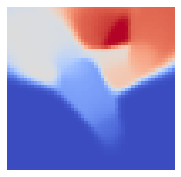

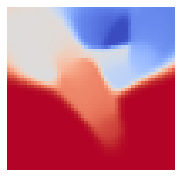

2 3 9100 30.86540993600174 31.59687614440918
2 3 9200 30.58906473207851 31.474882125854492
2 3 9300 30.43517965938623 31.503883361816406
2 3 9400 30.658916014246355 31.344751358032227
2 3 9500 30.75986196028366 31.219202041625977
2 3 9600 30.981140661298436 31.362268447875977
2 3 9700 31.02424431554859 31.68589210510254
2 3 9800 30.625152416013222 31.48822593688965
2 3 9900 30.60790026886166 31.481351852416992
2 3 10000 30.939496542582923 31.472158432006836


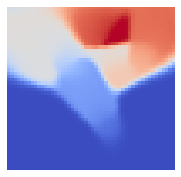

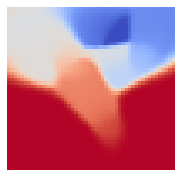

2 3 10100 31.10935636526999 31.393049240112305
2 3 10200 30.926215012068862 31.145784378051758
2 3 10300 30.867513027138177 31.275070190429688
2 3 10400 31.166008686321742 31.252887725830078
2 3 10500 30.822988693540662 31.471336364746094
2 3 10600 30.807533645050718 31.61577606201172
2 3 10700 30.983493889140476 31.387601852416992
2 3 10800 30.98534684357131 31.632957458496094
2 3 10900 31.047208322230063 31.627471923828125
2 3 11000 30.958936778780593 31.368324279785156


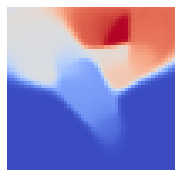

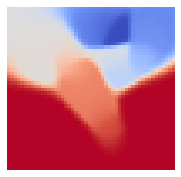

2 3 11100 30.592323794786473 31.55310821533203
2 3 11200 30.96789798697165 31.582935333251953
2 3 11300 30.856713435586517 31.341569900512695
2 3 11400 31.03638444556135 31.500049591064453
2 3 11500 30.9797831232554 31.325641632080078
2 3 11600 31.268564735619393 31.710195541381836
2 3 11700 30.90364928130699 31.42066192626953
2 3 11800 30.684978801863274 31.63056755065918
2 3 11900 30.993771350675587 31.425945281982422
2 3 12000 31.171909969764634 31.446592330932617


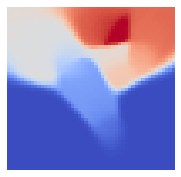

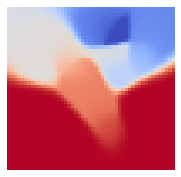

2 3 12100 31.227692883626034 31.650060653686523
2 3 12200 31.099239185507404 31.493099212646484
2 3 12300 31.218819101856354 31.53990364074707
2 3 12400 31.101303420456563 31.699016571044922
2 3 12500 30.97216002501374 31.70423126220703
2 3 12600 30.6847456647396 31.4953670501709
2 3 12700 30.940584515826714 31.553573608398438
2 3 12800 31.241455259457666 31.522872924804688
2 3 12900 31.01116678001774 31.439777374267578
2 3 13000 31.05012739329934 31.615795135498047


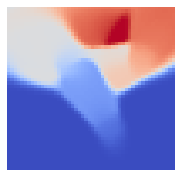

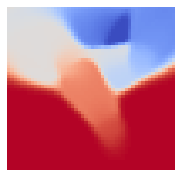

2 3 13100 30.438501863398525 31.4385929107666
2 3 13200 31.254520652429992 31.651844024658203
2 3 13300 31.09052325699854 31.537494659423828
2 3 13400 31.238103913304915 31.49969482421875
2 3 13500 30.80339546110558 31.60239028930664
2 3 13600 31.24835466121127 31.576862335205078
2 3 13700 31.31152753619066 31.57709312438965
2 3 13800 31.22139089575184 31.4503116607666
2 3 13900 31.02502386780586 31.661251068115234
2 3 14000 31.20538214659318 31.660484313964844


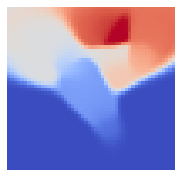

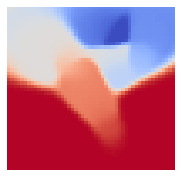

2 3 14100 31.315170303748 31.630403518676758
2 3 14200 30.90541966633986 31.298641204833984
2 3 14300 31.13517387320471 31.501388549804688
2 3 14400 31.150050935908887 31.59966278076172
2 3 14500 31.109990206824964 31.521778106689453
2 3 14600 30.937935009556675 31.66380500793457
2 3 14700 31.122106051720678 31.44268798828125
2 3 14800 30.988069205192495 31.44329833984375
2 3 14900 30.883805912166306 31.58418083190918
2 3 15000 31.189043119842655 31.610164642333984


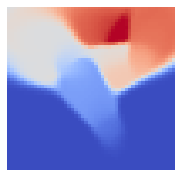

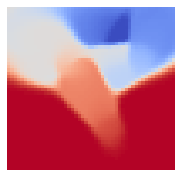

2 3 15100 31.067503394547856 31.681625366210938
2 3 15200 31.09883119554098 31.62041664123535
2 3 15300 30.953734906708714 31.320571899414062
2 3 15400 31.114082249047712 31.52042579650879
2 3 15500 30.964192078109985 31.607730865478516
2 3 15600 30.774403888372564 31.93699836730957
2 3 15700 31.12986757512952 31.515363693237305
2 3 15800 31.09315333517494 31.48202896118164
2 3 15900 30.95550043471817 31.62200355529785
2 3 16000 30.911993647525005 31.64655113220215


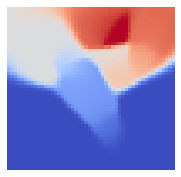

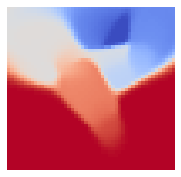

2 3 16100 31.240124435043384 31.508380889892578
2 3 16200 30.836668499974326 31.51453971862793
2 3 16300 31.17379935187104 31.5357608795166
2 3 16400 31.176958845599106 31.400075912475586
2 3 16500 31.140079466848594 31.623750686645508
2 3 16600 31.038718245309752 31.569894790649414
2 3 16700 31.29737902699795 31.40055274963379
2 3 16800 31.252529272831982 31.318410873413086
2 3 16900 30.931443597769498 31.565181732177734
2 3 17000 30.699205023430537 31.7362003326416


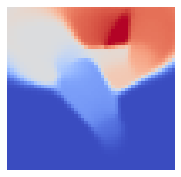

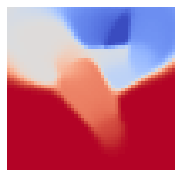

2 3 17100 31.12105936317587 31.688358306884766
2 3 17200 31.026762682186565 31.518978118896484
2 3 17300 31.407033616009006 31.877214431762695
2 3 17400 31.236714804609715 31.669811248779297
2 3 17500 31.10801825532059 31.340547561645508
2 3 17600 31.209078341408027 31.545089721679688
2 3 17700 30.92803639584753 31.45928192138672
2 3 17800 31.209768038732218 31.518373489379883
2 3 17900 30.980470392067886 31.663623809814453
2 3 18000 31.422651374783175 31.64624786376953


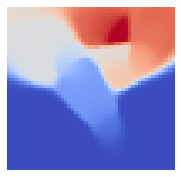

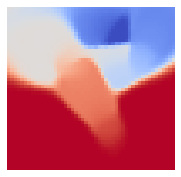

2 3 18100 31.24300464992539 31.645309448242188
2 3 18200 31.36373082379905 31.9454345703125
2 3 18300 31.193339157048612 31.394811630249023
2 3 18400 31.59781749554543 31.55937957763672
2 3 18500 31.31985490282674 31.779193878173828
2 3 18600 31.240071007785875 31.732511520385742
2 3 18700 31.50208313562683 31.410625457763672
2 3 18800 31.265057964717524 31.522581100463867
2 3 18900 31.039279231513586 31.826669692993164
2 3 19000 31.357625545372947 31.643667221069336


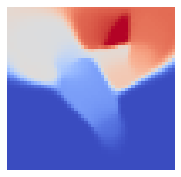

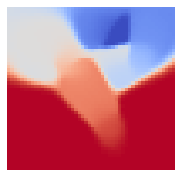

2 3 19100 31.399808793686947 31.689350128173828
2 3 19200 31.3160639960554 31.656129837036133
2 3 19300 31.377714194195825 31.682579040527344
2 3 19400 31.297842872733586 31.681480407714844
2 3 19500 31.03426435484298 31.653417587280273
2 3 19600 30.944312281293726 31.72910499572754
2 3 19700 31.84348088258904 31.68435287475586
2 3 19800 31.112428432576678 31.527780532836914
2 3 19900 31.134809596448978 31.684221267700195
2 3 20000 31.028564637871593 31.676132202148438


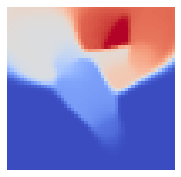

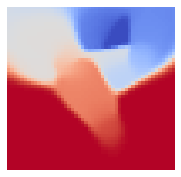

2 5 0 0.5076746800836617 4.744405269622803


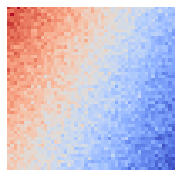

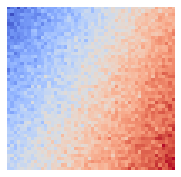

2 5 100 2.859085312351211 13.542269706726074
2 5 200 6.096316003655155 15.905900955200195
2 5 300 9.324303475846312 18.182884216308594
2 5 400 15.368435619986718 21.60271453857422
2 5 500 18.010838493288627 22.80287742614746
2 5 600 20.415361359561114 24.92204475402832
2 5 700 22.35637848183764 26.459423065185547
2 5 800 23.683970547040023 27.4232234954834
2 5 900 25.0637197581284 27.690200805664062
2 5 1000 25.377753035199873 28.250717163085938


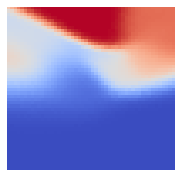

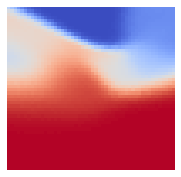

2 5 1100 26.188467954667857 28.655187606811523
2 5 1200 26.747453064853403 28.630435943603516
2 5 1300 27.09788487535782 29.01305389404297
2 5 1400 26.932386659692742 29.111726760864258
2 5 1500 27.499196434591457 29.288808822631836
2 5 1600 27.821731931141763 29.72821617126465
2 5 1700 28.361726079795044 29.926986694335938
2 5 1800 28.601949600619694 30.143169403076172
2 5 1900 28.51855936569706 30.569377899169922
2 5 2000 28.480147596060764 30.303022384643555


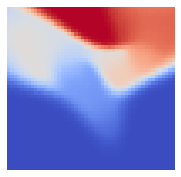

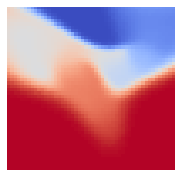

2 5 2100 28.6463209379798 30.351808547973633
2 5 2200 28.856056922861217 30.272777557373047
2 5 2300 29.433076160967303 30.706525802612305
2 5 2400 28.95235226898365 30.539419174194336
2 5 2500 29.36764477010236 30.62128257751465
2 5 2600 29.092508965008165 30.494876861572266
2 5 2700 29.447365523838897 30.78874397277832
2 5 2800 29.702160114892905 30.530569076538086
2 5 2900 29.33886204937596 30.50486946105957
2 5 3000 29.747922989459916 30.883365631103516


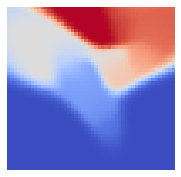

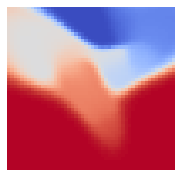

2 5 3100 29.75774631930621 30.676528930664062
2 5 3200 29.740275606101207 30.841075897216797
2 5 3300 29.59822224243517 30.853565216064453
2 5 3400 29.729789292559477 30.762231826782227
2 5 3500 29.804378601063572 30.497554779052734
2 5 3600 29.97572710142574 30.64849281311035
2 5 3700 29.683722854029355 31.011730194091797
2 5 3800 29.654070726112604 30.906993865966797
2 5 3900 29.976518796241535 30.89630699157715
2 5 4000 29.959851920410852 30.999324798583984


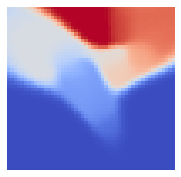

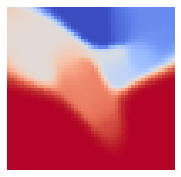

2 5 4100 29.9297529463404 30.882080078125
2 5 4200 30.07018406418757 31.01959228515625
2 5 4300 30.09302421677209 30.9908504486084
2 5 4400 30.192833619331505 31.103939056396484
2 5 4500 30.15099036265619 30.885677337646484
2 5 4600 30.1413661707697 30.983036041259766
2 5 4700 30.255702930347788 30.958322525024414
2 5 4800 30.44194306448436 30.997783660888672
2 5 4900 30.111995750210717 30.994365692138672
2 5 5000 30.150684370181377 30.972293853759766


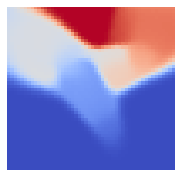

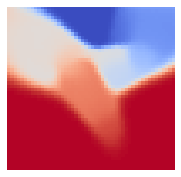

2 5 5100 30.492492535621714 31.07870864868164
2 5 5200 30.092502086755538 31.119394302368164
2 5 5300 30.098262516519547 31.05239486694336
2 5 5400 30.594254461591863 31.057924270629883
2 5 5500 30.211491874760203 30.961151123046875
2 5 5600 30.26622081454168 31.174312591552734
2 5 5700 30.24491548135465 30.977397918701172
2 5 5800 30.513659443641565 31.173355102539062
2 5 5900 30.34878292697294 31.197755813598633
2 5 6000 30.54706119363067 31.17599868774414


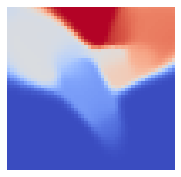

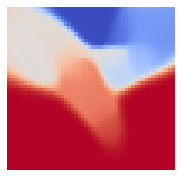

2 5 6100 30.10809070338925 31.117799758911133
2 5 6200 30.178099838817918 30.932952880859375
2 5 6300 30.323917395626538 31.073841094970703
2 5 6400 30.556423106253035 31.17029571533203
2 5 6500 30.56263523919415 31.004274368286133
2 5 6600 30.43528894241295 31.102540969848633
2 5 6700 30.42124971624696 31.188461303710938
2 5 6800 30.240133741807714 31.191648483276367
2 5 6900 30.43578435880075 31.163942337036133
2 5 7000 30.53151143318424 31.22224998474121


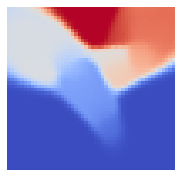

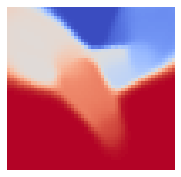

2 5 7100 30.481714800675398 31.389148712158203
2 5 7200 30.750772040972244 31.301254272460938
2 5 7300 30.46888740185015 31.304489135742188
2 5 7400 30.701983240820937 31.057153701782227
2 5 7500 30.916639390416467 31.27164077758789
2 5 7600 30.745407458616135 30.95473861694336
2 5 7700 30.599555902643647 31.197689056396484
2 5 7800 30.458214092907145 31.20613670349121
2 5 7900 30.670143023858078 31.304019927978516
2 5 8000 30.463702529360205 31.222318649291992


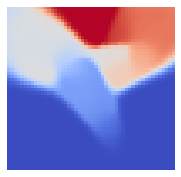

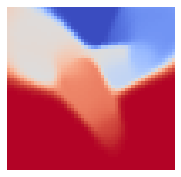

2 5 8100 30.62865432989168 31.52163314819336
2 5 8200 30.582250328234576 31.236541748046875
2 5 8300 30.3724342024669 31.118038177490234
2 5 8400 30.53806355776404 31.18855094909668
2 5 8500 30.600065890101675 31.195796966552734
2 5 8600 30.68313070445585 31.14337921142578
2 5 8700 30.81606986369342 31.04006576538086
2 5 8800 30.390988031892284 31.41191864013672
2 5 8900 30.606477161002594 31.48771095275879
2 5 9000 30.697381211140165 31.068706512451172


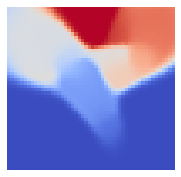

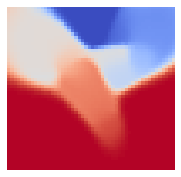

2 5 9100 30.700467849517082 31.12090492248535
2 5 9200 30.59341419654197 31.16496467590332
2 5 9300 30.62228677220145 31.31601333618164
2 5 9400 30.554463297307187 31.55123519897461
2 5 9500 30.379967445775478 31.225244522094727
2 5 9600 30.66657068314018 31.077407836914062
2 5 9700 30.032284710521 31.268545150756836
2 5 9800 30.682200584472874 31.340824127197266
2 5 9900 30.521930954508434 31.21234130859375
2 5 10000 30.49052058411734 31.1247615814209


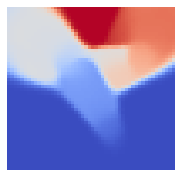

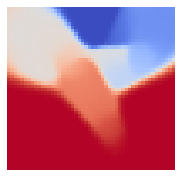

2 5 10100 30.70833865595264 31.352540969848633
2 5 10200 30.5425611614415 31.447586059570312
2 5 10300 30.709208063142995 31.240245819091797
2 5 10400 30.53008832532517 31.422698974609375
2 5 10500 30.94460613121002 31.322053909301758
2 5 10600 30.899372672194673 31.392414093017578
2 5 10700 30.39117502729356 31.075475692749023
2 5 10800 30.769969425999427 31.426895141601562
2 5 10900 30.541271621726203 31.311124801635742
2 5 11000 31.038946525410015 31.398832321166992


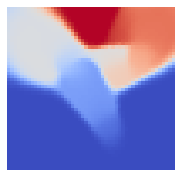

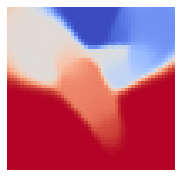

2 5 11100 30.53358295366851 31.355104446411133
2 5 11200 30.589261441526602 31.39942741394043
2 5 11300 30.52632656069429 31.32415008544922
2 5 11400 30.934131960226814 31.570735931396484
2 5 11500 31.079526955998784 31.305212020874023
2 5 11600 30.447841919415545 31.297258377075195
2 5 11700 30.9023135998693 31.487770080566406
2 5 11800 30.806647238278433 31.223676681518555
2 5 11900 30.783382096145555 31.373533248901367
2 5 12000 30.669113334895204 31.341075897216797


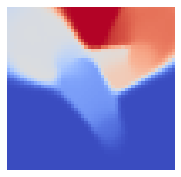

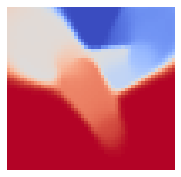

2 5 12100 30.649782381724254 31.502092361450195
2 5 12200 30.904266123280035 31.385051727294922
2 5 12300 30.949555438064593 31.186494827270508
2 5 12400 30.659744136737725 31.549060821533203
2 5 12500 30.905650374951822 31.40393829345703
2 5 12600 31.04872128502221 31.331750869750977
2 5 12700 30.549295424399173 31.41024398803711
2 5 12800 30.819433352404698 31.408855438232422
2 5 12900 30.830687075645173 31.38427734375
2 5 13000 30.751381597410173 31.562345504760742


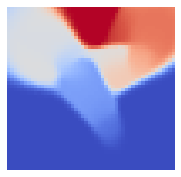

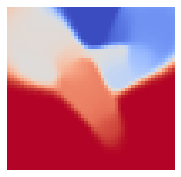

2 5 13100 30.73777707483936 31.54841423034668
2 5 13200 30.792598298065624 31.484102249145508
2 5 13300 30.99153469139538 31.309200286865234
2 5 13400 31.10738198525391 31.279836654663086
2 5 13500 30.845508282580138 31.537120819091797
2 5 13600 31.21813183304387 31.51875114440918
2 5 13700 30.91147880304357 31.55848503112793
2 5 13800 30.675891311063562 31.595705032348633
2 5 13900 31.26461840409894 31.216903686523438
2 5 14000 30.912277783394476 31.502582550048828


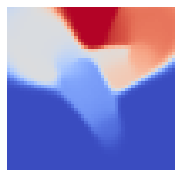

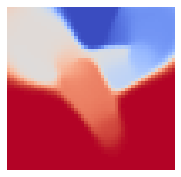

2 5 14100 31.043815691378324 31.198060989379883
2 5 14200 30.98557512367157 31.723718643188477
2 5 14300 31.080090370714316 31.538619995117188
2 5 14400 30.82080060449455 31.56669807434082
2 5 14500 31.312984643213596 31.403560638427734
2 5 14600 31.10195669010518 31.301687240600586
2 5 14700 31.20446416916873 31.354475021362305
2 5 14800 30.788207548903177 31.53982925415039
2 5 14900 31.06955062991508 31.309951782226562
2 5 15000 31.072173422556364 31.443235397338867


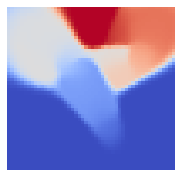

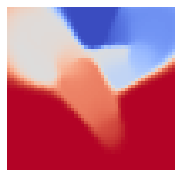

2 5 15100 31.111316174215837 31.336673736572266
2 5 15200 31.071831002405975 31.507780075073242
2 5 15300 31.14674815999023 31.463098526000977
2 5 15400 30.988807472750786 31.360286712646484
2 5 15500 31.232630047922083 31.362539291381836
2 5 15600 30.74946550167501 31.49347686767578
2 5 15700 30.68971682819952 31.465044021606445
2 5 15800 31.0891147202097 31.35707664489746
2 5 15900 30.969019959379313 31.359458923339844
2 5 16000 31.244163050008623 31.31568145751953


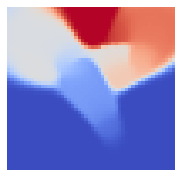

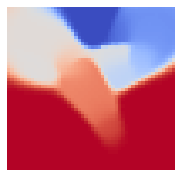

2 5 16100 30.9282695329712 31.395709991455078
2 5 16200 30.81298808233991 31.409608840942383
2 5 16300 30.75181144398194 31.399614334106445
2 5 16400 30.643242399702974 31.334768295288086
2 5 16500 30.7685171759999 31.482097625732422
2 5 16600 30.908693300118056 31.396982192993164
2 5 16700 31.231767926266848 31.614198684692383
2 5 16800 30.935695921764765 31.394126892089844
2 5 16900 30.63697198248094 31.519845962524414
2 5 17000 31.12260389662018 31.203399658203125


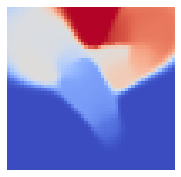

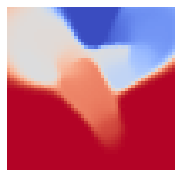

2 5 17100 31.074405224813162 31.56413459777832
2 5 17200 30.95001685528852 31.431249618530273
2 5 17300 31.178867655799152 31.630287170410156
2 5 17400 31.206880538315097 31.550373077392578
2 5 17500 31.327703852656956 31.75724983215332
2 5 17600 31.094282593117715 31.541357040405273
2 5 17700 31.02379746939489 31.590904235839844
2 5 17800 31.104144779151287 31.363332748413086
2 5 17900 30.931956013739228 31.53245735168457
2 5 18000 31.14020089243384 31.517593383789062


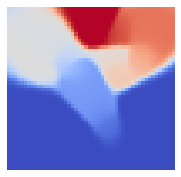

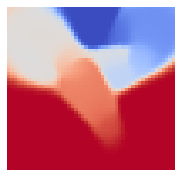

2 5 18100 31.113875825552796 31.372385025024414
2 5 18200 30.720862490814778 31.488094329833984
2 5 18300 30.981801216482168 31.517955780029297
2 5 18400 30.735559843652794 31.368579864501953
2 5 18500 30.911024671354753 31.449329376220703
2 5 18600 31.01644393595247 31.425004959106445
2 5 18700 31.073096257004224 31.39668083190918
2 5 18800 30.969024816402722 31.50485610961914
2 5 18900 31.138020088922847 31.594449996948242
2 5 19000 31.19799218547519 31.469009399414062


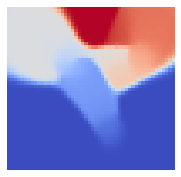

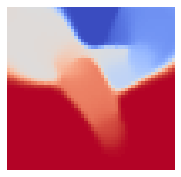

2 5 19100 31.057978771641263 31.478071212768555
2 5 19200 31.17647557176983 31.456335067749023
2 5 19300 30.974093120330835 31.437164306640625
2 5 19400 30.95245750955194 31.410724639892578
2 5 19500 30.980351394994344 31.695261001586914
2 5 19600 31.346651100978534 31.391605377197266
2 5 19700 31.26770989949927 31.813247680664062
2 5 19800 31.005496205186812 31.385597229003906
2 5 19900 31.13252193842297 31.392358779907227
2 5 20000 31.039820789623775 31.65741539001465


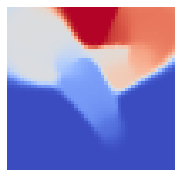

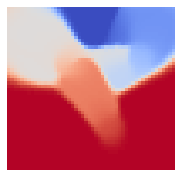

2 30 0 0.5325748936128509 4.743551254272461


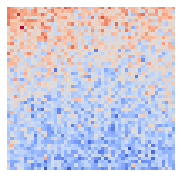

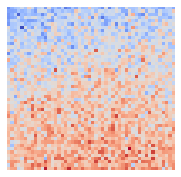

2 30 100 1.970100067762441 11.93200969696045
2 30 200 6.8137724308876715 15.748393058776855
2 30 300 12.841078631680723 18.916458129882812
2 30 400 16.752568294702428 21.400056838989258
2 30 500 19.510824533142134 23.393346786499023
2 30 600 21.62855838090449 25.121740341186523
2 30 700 24.325969472833943 26.82982635498047
2 30 800 26.02283617085901 28.04173469543457
2 30 900 26.995314254989943 28.603652954101562
2 30 1000 27.644962992654275 29.2453670501709


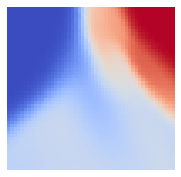

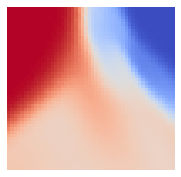

2 30 1100 28.148092333627275 29.58620834350586
2 30 1200 27.939840169397552 29.890178680419922
2 30 1300 28.88725601273398 29.914352416992188
2 30 1400 29.00120178192758 30.001901626586914
2 30 1500 28.71467382842573 30.003843307495117
2 30 1600 28.86964201733839 30.290910720825195
2 30 1700 29.36410642854833 30.235166549682617
2 30 1800 29.323370573210447 30.433353424072266
2 30 1900 29.069224394781646 30.287704467773438
2 30 2000 29.615097970272476 30.521631240844727


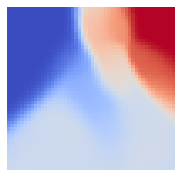

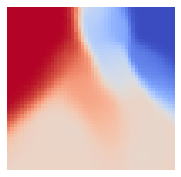

2 30 2100 29.359975530138307 30.666873931884766
2 30 2200 29.98808094046853 30.61648941040039
2 30 2300 29.44693567726713 30.56635093688965
2 30 2400 29.593744066851347 30.541606903076172
2 30 2500 29.694146026266758 30.434642791748047
2 30 2600 29.846433138257215 30.763704299926758
2 30 2700 29.764910428835645 30.512727737426758
2 30 2800 29.85428208808743 30.70783042907715
2 30 2900 29.857623720193363 30.82799530029297
2 30 3000 30.29320400809475 31.04483413696289


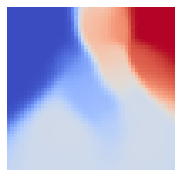

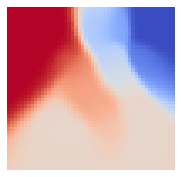

2 30 3100 30.039150113110736 30.754501342773438
2 30 3200 29.763251755341205 30.858295440673828
2 30 3300 29.969835532029666 30.755420684814453
2 30 3400 29.991386144898893 30.824783325195312
2 30 3500 30.271442114707202 30.88558578491211
2 30 3600 30.267284502668424 31.01252555847168
2 30 3700 29.95017915829026 30.882436752319336
2 30 3800 29.995694324663372 30.858137130737305
2 30 3900 30.181650322930473 30.873926162719727
2 30 4000 30.213031551181103 31.113479614257812


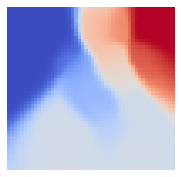

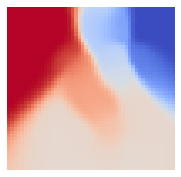

2 30 4100 29.907257642417974 30.899221420288086
2 30 4200 30.18853272510214 30.866100311279297
2 30 4300 30.035667627325918 31.05854606628418
2 30 4400 30.412599357554132 30.86458969116211
2 30 4500 30.319686928236614 30.924480438232422
2 30 4600 30.28614189605692 30.752147674560547
2 30 4700 30.362314594192608 30.873943328857422
2 30 4800 29.85071460439294 31.034090042114258
2 30 4900 30.28808227690913 31.107139587402344
2 30 5000 30.31860866903964 30.932941436767578


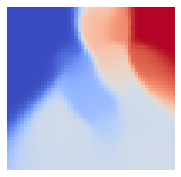

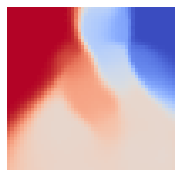

2 30 5100 30.48427688052406 30.93178939819336
2 30 5200 30.12552498891868 31.04058074951172
2 30 5300 30.273681202499112 30.996044158935547
2 30 5400 30.433941118416733 30.990602493286133
2 30 5500 30.367589321615636 30.86890411376953
2 30 5600 30.177410141493727 31.007741928100586
2 30 5700 30.621431936081326 31.125526428222656
2 30 5800 30.245282186622088 30.907636642456055
2 30 5900 30.81304150959742 31.08685302734375
2 30 6000 30.118052458402722 31.122726440429688


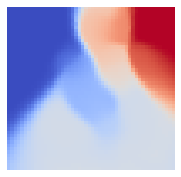

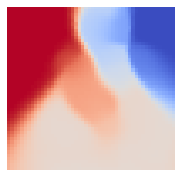

2 30 6100 30.36606178775326 30.882728576660156
2 30 6200 30.17199698890352 30.889793395996094
2 30 6300 30.25319427775663 30.919769287109375
2 30 6400 30.372779051128994 30.93311309814453
2 30 6500 30.3495551936951 30.928754806518555
2 30 6600 30.41173480738719 31.034351348876953
2 30 6700 30.56289266143487 31.072002410888672
2 30 6800 30.201216841736798 31.088762283325195
2 30 6900 30.658454597022427 30.904024124145508
2 30 7000 30.30195879279089 30.882829666137695


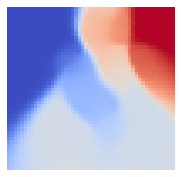

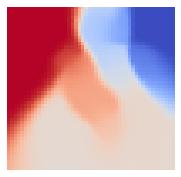

2 30 7100 30.41879691942502 31.047225952148438
2 30 7200 30.509739825749868 31.250322341918945
2 30 7300 30.61603335456135 31.12528419494629
2 30 7400 30.479648137214532 31.200218200683594
2 30 7500 30.338838171541404 30.857017517089844
2 30 7600 30.543260572812514 31.234058380126953
2 30 7700 30.52826208452309 31.188644409179688
2 30 7800 30.897361864503022 31.066368103027344
2 30 7900 30.859290086505407 31.11262321472168
2 30 8000 30.329060983417502 31.177555084228516


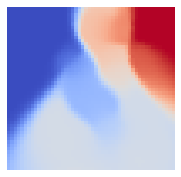

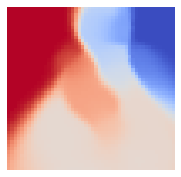

2 30 8100 30.425902744673536 30.848405838012695
2 30 8200 30.618862570697548 31.156259536743164
2 30 8300 30.6946199933317 31.150440216064453
2 30 8400 30.911755653377927 31.08514404296875
2 30 8500 30.58032208994089 30.99732780456543
2 30 8600 30.852927385838587 30.896060943603516
2 30 8700 30.54227216854862 31.034704208374023
2 30 8800 30.592003231241428 31.0716609954834
2 30 8900 30.27076698845324 31.01043128967285
2 30 9000 30.98523756054459 31.33024024963379


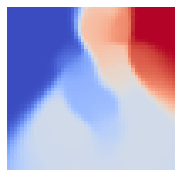

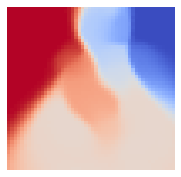

2 30 9100 30.359480521032996 31.33116340637207
2 30 9200 30.82927611034463 31.19712257385254
2 30 9300 30.886365563503265 31.268062591552734
2 30 9400 30.711296583209204 30.892396926879883
2 30 9500 30.59880792103854 31.148517608642578
2 30 9600 30.843983177229465 31.214153289794922
2 30 9700 30.90789674827885 30.949356079101562
2 30 9800 30.5766040385207 31.154720306396484
2 30 9900 30.988673904607015 31.07977867126465
2 30 10000 30.63555858866869 30.986989974975586


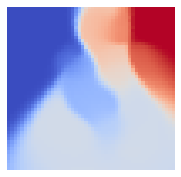

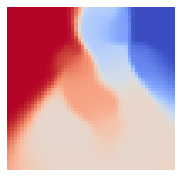

2 30 10100 30.6865816195885 31.185354232788086
2 30 10200 30.7872264301744 31.29100227355957
2 30 10300 30.737291372498383 31.016502380371094
2 30 10400 30.77210894481144 31.195560455322266
2 30 10500 30.353081392690605 31.17160415649414
2 30 10600 30.835765093620104 31.381235122680664
2 30 10700 30.629234744189148 31.090429306030273
2 30 10800 30.657480763828765 31.25440788269043
2 30 10900 30.793343851159026 31.00426483154297
2 30 11000 30.792899433517032 31.194910049438477


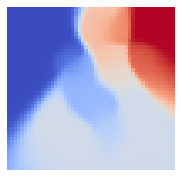

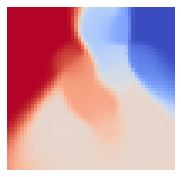

2 30 11100 30.335902100890188 31.319591522216797
2 30 11200 30.932674853203878 31.15157127380371
2 30 11300 30.317440554909588 31.277381896972656
2 30 11400 30.665370998357965 31.000835418701172
2 30 11500 30.79669519731178 31.1162109375
2 30 11600 30.848087362010734 31.115636825561523
2 30 11700 30.896601740339392 31.334501266479492
2 30 11800 30.610195212422784 31.26788330078125
2 30 11900 30.720996058958548 31.2906436920166
2 30 12000 30.87519683817246 31.108549118041992


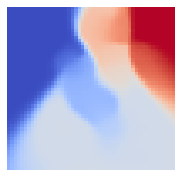

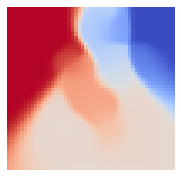

2 30 12100 30.760549229096146 31.086280822753906
2 30 12200 30.927735260396123 31.482789993286133
2 30 12300 30.736970808953338 31.133148193359375
2 30 12400 31.147066295023574 31.31587791442871
2 30 12500 30.96584832309272 31.137893676757812
2 30 12600 30.593416625053678 31.264862060546875
2 30 12700 30.984266155862635 31.01164436340332
2 30 12800 30.862529721119735 31.178747177124023
2 30 12900 30.70422718563626 31.293285369873047
2 30 13000 30.693680159301906 31.220285415649414


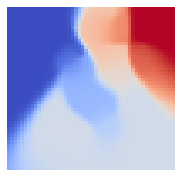

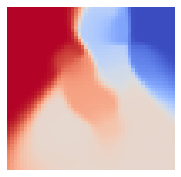

2 30 13100 30.900645212328037 31.30889892578125
2 30 13200 30.996335859035952 31.361047744750977
2 30 13300 30.729772700260032 31.225019454956055
2 30 13400 30.71933009992899 31.277509689331055
2 30 13500 30.852626250387182 31.244693756103516
2 30 13600 30.802462912610903 31.140871047973633
2 30 13700 30.321831304072035 31.299577713012695
2 30 13800 30.783025104924935 31.20058250427246
2 30 13900 30.985805832283535 31.14838218688965
2 30 14000 31.097092381160277 31.297748565673828


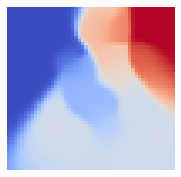

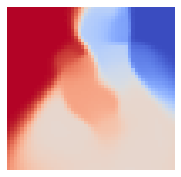

2 30 14100 30.925012898774938 31.044273376464844
2 30 14200 30.642523560238327 31.361047744750977
2 30 14300 30.921928688909723 31.20673942565918
2 30 14400 30.785475473235174 31.42063331604004
2 30 14500 30.886112998285956 31.262781143188477
2 30 14600 31.09111824236624 31.227027893066406
2 30 14700 30.85745413165651 31.331787109375
2 30 14800 31.011429059281866 31.18204689025879
2 30 14900 30.542213884267703 31.356428146362305
2 30 15000 31.155592799619455 31.223575592041016


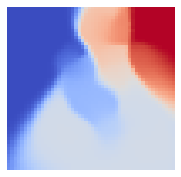

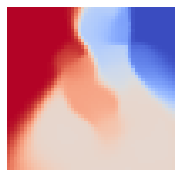

2 30 15100 30.84572684863358 31.291099548339844
2 30 15200 31.1139778230444 31.260446548461914
2 30 15300 30.64060017896805 31.272245407104492
2 30 15400 30.82277498451063 31.130329132080078
2 30 15500 30.769270014628418 31.28325843811035
2 30 15600 30.99560001998937 31.390193939208984
2 30 15700 30.726115361632463 31.335634231567383
2 30 15800 31.055931536274038 31.44619369506836
2 30 15900 31.061929960185125 31.49834632873535
2 30 16000 31.036476729006136 31.416500091552734


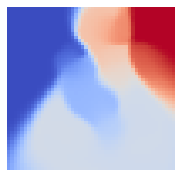

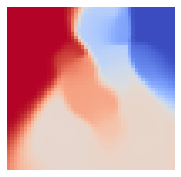

2 30 16100 30.868440718609445 31.271604537963867
2 30 16200 30.83102706728386 31.224748611450195
2 30 16300 31.04897385023952 31.355932235717773
2 30 16400 30.89881411450255 31.471094131469727
2 30 16500 31.005413635788845 31.419294357299805
2 30 16600 30.953317202695473 31.253631591796875
2 30 16700 31.11941768926336 31.23995590209961
2 30 16800 31.171686546687784 31.185426712036133
2 30 16900 31.038431680928575 31.40688705444336
2 30 17000 30.718686544327195 31.271671295166016


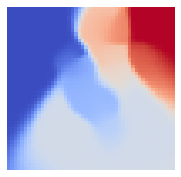

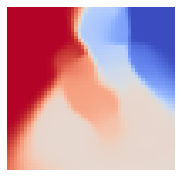

2 30 17100 30.886627842767393 31.166494369506836
2 30 17200 30.942248046344567 31.553634643554688
2 30 17300 31.090957960593716 31.314390182495117
2 30 17400 30.801843642126155 31.13631248474121
2 30 17500 30.97325285528094 31.24378204345703
2 30 17600 31.095380280408328 31.095680236816406
2 30 17700 30.755138505017644 31.383487701416016
2 30 17800 31.033268665043973 31.421310424804688
2 30 17900 31.14186199443999 31.238513946533203
2 30 18000 31.142709545024996 31.328323364257812


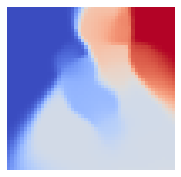

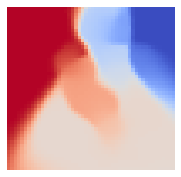

2 30 18100 30.822226140865325 31.115209579467773
2 30 18200 30.965746325601117 31.217025756835938
2 30 18300 30.72286844148302 31.27826499938965
2 30 18400 31.034589775411433 31.29645538330078
2 30 18500 31.398344401128895 31.22829818725586
2 30 18600 30.962535833127248 31.20680046081543
2 30 18700 30.855258757075283 31.20989227294922
2 30 18800 30.82563334278729 31.162982940673828
2 30 18900 30.97176417760584 31.256868362426758
2 30 19000 30.9895603113793 31.29347801208496


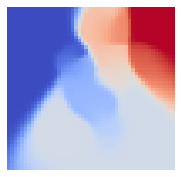

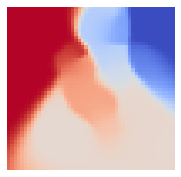

2 30 19100 31.09702923985595 31.416250228881836
2 30 19200 30.941582634137426 31.41410255432129
2 30 19300 30.816455997054497 31.4167537689209
2 30 19400 31.092242643285605 31.364675521850586
2 30 19500 31.126317091016965 31.337284088134766
2 30 19600 30.909931841087552 31.521339416503906
2 30 19700 30.9629583941639 31.21463966369629
2 30 19800 31.137893806314192 31.499967575073242
2 30 19900 31.07181885984745 31.125064849853516
2 30 20000 31.065754866120333 31.256101608276367


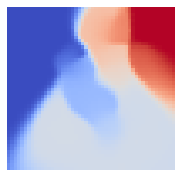

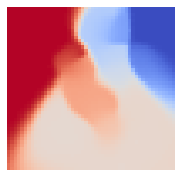

3 1 0 0.5362867219717989 3.708012104034424


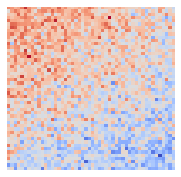

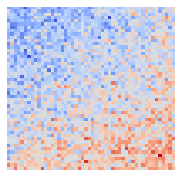

3 1 100 3.2523597120975043 10.923632621765137
3 1 200 6.489173913644059 14.120362281799316
3 1 300 8.469878381329881 15.821329116821289
3 1 400 11.481577136931893 17.46398162841797
3 1 500 14.394274577244294 19.992015838623047
3 1 600 17.44900473887324 21.09206771850586
3 1 700 19.187328560212542 22.00402069091797
3 1 800 20.54420847657594 22.83467674255371
3 1 900 21.448355526866283 23.085948944091797
3 1 1000 21.983866642912332 23.377946853637695


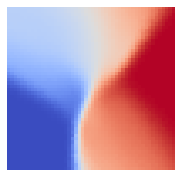

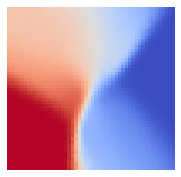

3 1 1100 21.93862346985017 23.501148223876953
3 1 1200 22.34595530960024 24.152111053466797
3 1 1300 22.634343503068038 23.915164947509766
3 1 1400 22.823315712872613 24.079837799072266
3 1 1500 22.291704786624624 23.807403564453125
3 1 1600 23.339806725245936 24.42954444885254
3 1 1700 23.407564630324167 24.57945442199707
3 1 1800 23.64373010808994 24.789798736572266
3 1 1900 23.376564678411203 24.65744972229004
3 1 2000 23.323581838545543 24.735027313232422


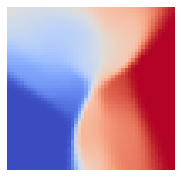

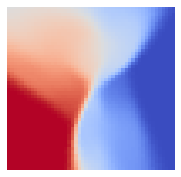

3 1 2100 23.68543251108637 24.788488388061523
3 1 2200 23.668889489352637 24.890825271606445
3 1 2300 23.422618974382804 24.663345336914062
3 1 2400 23.48226079334328 24.465351104736328
3 1 2500 24.016941358386255 24.797534942626953
3 1 2600 23.45133369678146 24.894922256469727
3 1 2700 23.791203909881297 24.7934627532959
3 1 2800 23.681818885669486 24.92013168334961
3 1 2900 23.731868083395636 24.971235275268555
3 1 3000 23.93198959043738 24.889720916748047


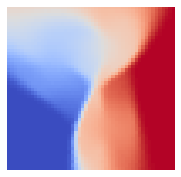

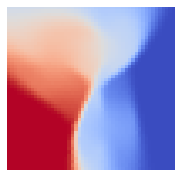

3 1 3100 23.749416508975195 25.123334884643555
3 1 3200 23.977492614251968 25.070772171020508
3 1 3300 24.025819997179347 25.11970329284668
3 1 3400 24.001615021016672 25.0352725982666
3 1 3500 24.177706404738494 25.09393882751465
3 1 3600 24.41102080976272 25.180461883544922
3 1 3700 24.34340618687508 25.097835540771484
3 1 3800 24.249811345768485 25.222673416137695
3 1 3900 24.240833137995494 25.38319969177246
3 1 4000 24.192447470787197 25.13954734802246


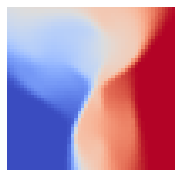

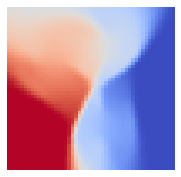

3 1 4100 24.032614972929636 25.176082611083984
3 1 4200 24.152459597054424 25.32364845275879
3 1 4300 24.14302482908091 25.205257415771484
3 1 4400 24.35375407524963 25.043493270874023
3 1 4500 24.36011191889304 25.116056442260742
3 1 4600 24.163533610428736 25.304584503173828
3 1 4700 24.33097463545773 25.302814483642578
3 1 4800 24.369381548070617 25.244882583618164
3 1 4900 24.21417050798747 25.527803421020508
3 1 5000 24.443271445203706 25.25411605834961


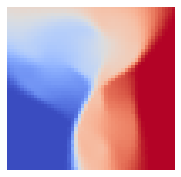

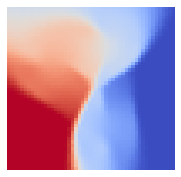

3 1 5100 24.06739611756712 25.246292114257812
3 1 5200 24.451285533829854 25.236291885375977
3 1 5300 24.262337609142325 25.302562713623047
3 1 5400 24.538354963985398 25.24893569946289
3 1 5500 24.56416761489671 25.233686447143555
3 1 5600 24.67919650031069 25.06656837463379
3 1 5700 24.665868828074238 25.3928279876709
3 1 5800 24.47019635447586 25.461044311523438
3 1 5900 24.382629079420813 25.454452514648438
3 1 6000 24.36149131354142 25.202394485473633


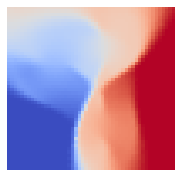

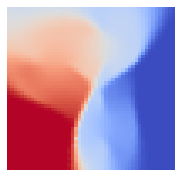

3 1 6100 24.6992997202038 25.477712631225586
3 1 6200 24.509399818927953 25.375812530517578
3 1 6300 24.63253021938946 25.40684700012207
3 1 6400 24.623590867803745 25.197505950927734
3 1 6500 24.460426451887074 25.211360931396484
3 1 6600 24.79389510813281 25.411884307861328
3 1 6700 24.619986956433685 25.39151954650879
3 1 6800 24.69255574319931 25.390274047851562
3 1 6900 24.424996894624382 25.399503707885742
3 1 7000 24.863586108528136 25.361961364746094


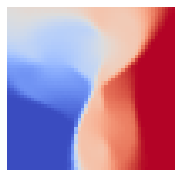

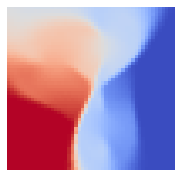

3 1 7100 24.681702724390142 25.20330047607422
3 1 7200 24.716309016184873 25.410371780395508
3 1 7300 24.422806377066568 25.444175720214844
3 1 7400 24.85366320970194 25.326581954956055
3 1 7500 24.509664526703787 25.421281814575195
3 1 7600 24.518021035480324 25.37271499633789
3 1 7700 24.613910820148043 25.307533264160156
3 1 7800 24.722465293356777 25.409549713134766
3 1 7900 24.701594663764922 25.33991813659668
3 1 8000 25.079233090899262 25.47130584716797


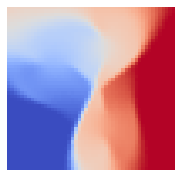

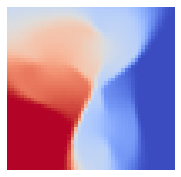

3 1 8100 24.41534841762084 25.331697463989258
3 1 8200 25.06343562225893 25.47086524963379
3 1 8300 24.515237961066518 25.2891902923584
3 1 8400 24.511082777539446 25.670202255249023
3 1 8500 24.83242830335435 25.607135772705078
3 1 8600 24.52943261198162 25.616487503051758
3 1 8700 24.572300700596397 25.449878692626953
3 1 8800 24.85515188737704 25.511838912963867
3 1 8900 24.69060564830028 25.659236907958984
3 1 9000 24.711694843945576 25.34222984313965


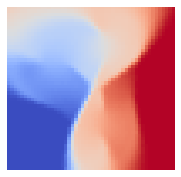

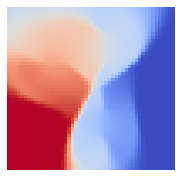

3 1 9100 24.783282511982424 25.621610641479492
3 1 9200 24.592542345656685 25.50095558166504
3 1 9300 24.63261521729913 25.518308639526367
3 1 9400 24.991758099289 25.369003295898438
3 1 9500 24.88691924898875 25.594505310058594
3 1 9600 24.814649169162827 25.499794006347656
3 1 9700 24.564675173843032 25.472410202026367
3 1 9800 24.755347341841034 25.459260940551758
3 1 9900 24.994580029890084 25.4542293548584
3 1 10000 25.098860322498208 25.627574920654297


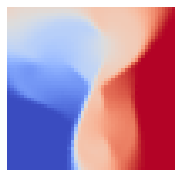

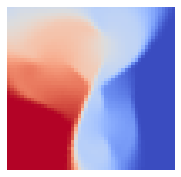

3 1 10100 24.76553494844306 25.544857025146484
3 1 10200 24.598948759534192 25.465190887451172
3 1 10300 24.787658690074643 25.70669937133789
3 1 10400 24.962003973880645 25.42351722717285
3 1 10500 24.895363184186664 25.63652992248535
3 1 10600 24.793615829286747 25.514808654785156
3 1 10700 25.144555198737486 25.550762176513672
3 1 10800 25.04219100186452 25.50701332092285
3 1 10900 24.911403503997487 25.330158233642578
3 1 11000 24.716214304228384 25.439937591552734


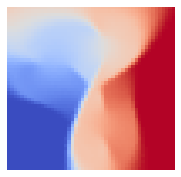

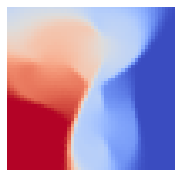

3 1 11100 24.94244231209773 25.612886428833008
3 1 11200 24.83475967459105 25.558502197265625
3 1 11300 24.79695260436927 25.567161560058594
3 1 11400 24.88455630709989 25.662023544311523
3 1 11500 25.08395897467698 25.608783721923828
3 1 11600 24.697084917528937 25.535396575927734
3 1 11700 25.053393726359197 25.46906852722168
3 1 11800 24.95896347722612 25.537445068359375
3 1 11900 24.770901959310876 25.462806701660156
3 1 12000 24.79221700654473 25.445972442626953


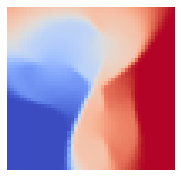

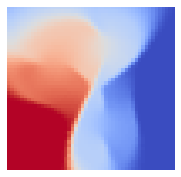

3 1 12100 24.95492486226088 25.58139419555664
3 1 12200 24.990713839255896 25.642858505249023
3 1 12300 24.944946107665473 25.57638168334961
3 1 12400 24.70677953625487 25.753206253051758
3 1 12500 25.097602353435075 25.640718460083008
3 1 12600 24.982048909492836 25.44137954711914
3 1 12700 24.882222507351486 25.5433349609375
3 1 12800 24.978083149878746 25.611297607421875
3 1 12900 24.992688219271972 25.653606414794922
3 1 13000 25.075369328776777 25.639385223388672


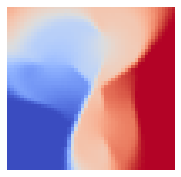

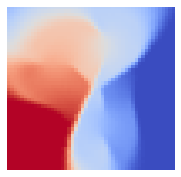

3 1 13100 25.08635348721801 25.86721420288086
3 1 13200 24.723186561333133 25.436962127685547
3 1 13300 25.170044857592046 25.60544776916504
3 1 13400 24.732082199708156 25.500308990478516
3 1 13500 24.861553444231138 25.731489181518555
3 1 13600 25.20764550431891 25.478796005249023
3 1 13700 25.08136046715275 25.64896011352539
3 1 13800 25.054554554954134 25.576904296875
3 1 13900 24.99511187395346 25.4082088470459
3 1 14000 25.149973208351103 25.627365112304688


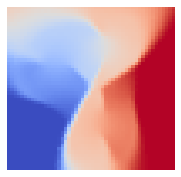

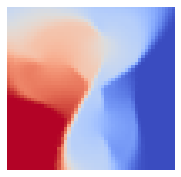

3 1 14100 25.20634382204509 25.599327087402344
3 1 14200 25.012655442509608 25.745439529418945
3 1 14300 24.958307779065798 25.43634033203125
3 1 14400 24.944385121461643 25.604284286499023
3 1 14500 24.93212599437534 25.518558502197266
3 1 14600 25.01421454702415 25.53373908996582
3 1 14700 24.918113481838105 25.707279205322266
3 1 14800 25.085185373087956 25.600038528442383
3 1 14900 25.039169933303633 25.693504333496094
3 1 15000 24.97439181208731 25.51044273376465


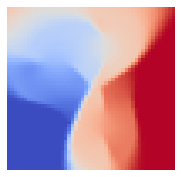

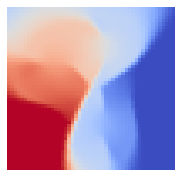

3 1 15100 24.73256547353743 25.58747673034668
3 1 15200 24.984586704224448 25.668210983276367
3 1 15300 24.890756297482483 25.463274002075195
3 1 15400 24.684782077231947 25.65125274658203
3 1 15500 25.028168775280466 25.60358238220215
3 1 15600 25.070089744330335 25.503162384033203
3 1 15700 25.294532796096586 25.7116756439209
3 1 15800 24.955585417444613 25.737003326416016
3 1 15900 24.889583326329017 25.640424728393555
3 1 16000 24.994543602214513 25.628400802612305


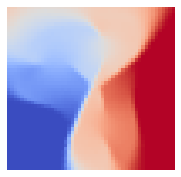

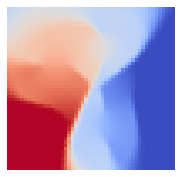

3 1 16100 24.815989707623928 25.785411834716797
3 1 16200 24.848271913717078 25.678211212158203
3 1 16300 25.18763456787059 25.590539932250977
3 1 16400 25.07065315904587 25.667396545410156
3 1 16500 24.891118145726512 25.878002166748047
3 1 16600 25.048475990156785 25.885265350341797
3 1 16700 24.87785847181779 25.46285629272461
3 1 16800 25.111661007694703 25.939682006835938
3 1 16900 24.93424365658201 25.561031341552734
3 1 17000 25.186267315780732 25.5736083984375


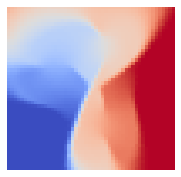

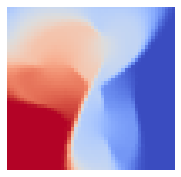

3 1 17100 25.00190684970375 25.6554012298584
3 1 17200 25.10820523553864 25.739177703857422
3 1 17300 24.96930650857726 25.877880096435547
3 1 17400 25.07318852526578 25.642831802368164
3 1 17500 25.073057385633717 25.733905792236328
3 1 17600 25.178624789445433 25.660602569580078
3 1 17700 25.23034966024796 25.581884384155273
3 1 17800 25.17472217113567 25.703393936157227
3 1 17900 25.200068547799642 25.643268585205078
3 1 18000 25.091960920744608 25.655475616455078


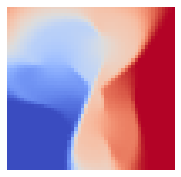

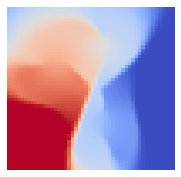

3 1 18100 25.10532259214493 25.605697631835938
3 1 18200 25.102381664470304 25.72766876220703
3 1 18300 25.215166605068966 25.68149185180664
3 1 18400 24.909958539533076 25.625675201416016
3 1 18500 25.148644812448524 25.757875442504883
3 1 18600 25.0613373881459 25.732524871826172
3 1 18700 25.226923030232353 25.6701602935791
3 1 18800 25.359510055272715 25.74485969543457
3 1 18900 25.096575092983905 25.677215576171875
3 1 19000 25.12969027859183 25.47964096069336


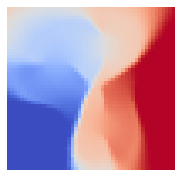

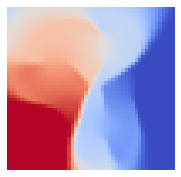

3 1 19100 25.30475197335078 25.50119400024414
3 1 19200 25.07715914190328 25.729637145996094
3 1 19300 25.136446398154845 25.65521812438965
3 1 19400 24.911862492709712 25.55341911315918
3 1 19500 25.00680030078911 25.724210739135742
3 1 19600 24.97831385849071 25.703624725341797
3 1 19700 25.094763423252054 25.544763565063477
3 1 19800 25.183328816617813 25.623470306396484
3 1 19900 24.925904147387406 25.574207305908203
3 1 20000 25.200342969622294 25.599966049194336


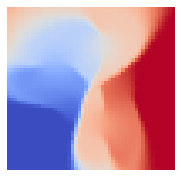

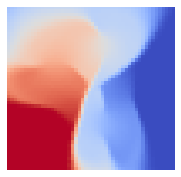

3 3 0 0.5758951407506845 3.707993268966675


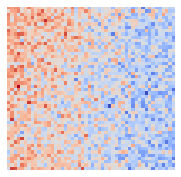

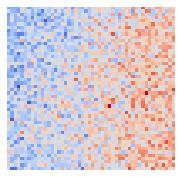

3 3 100 3.2724061655295102 10.671911239624023
3 3 200 6.580935835541384 14.031074523925781
3 3 300 9.103910574475899 15.821731567382812
3 3 400 10.677817474986727 17.522384643554688
3 3 500 11.813689469390447 18.850339889526367
3 3 600 13.026986059713725 19.991230010986328
3 3 700 14.532543105418254 20.867332458496094
3 3 800 16.83412257477616 21.90668487548828
3 3 900 19.49307575534692 22.422197341918945
3 3 1000 20.48859070151047 23.110151290893555


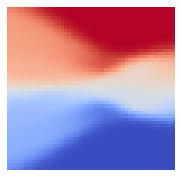

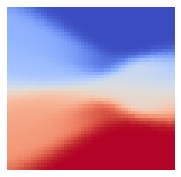

3 3 1100 21.506282816563107 23.48241424560547
3 3 1200 22.165376036247775 23.759286880493164
3 3 1300 22.765169857122352 23.96686553955078
3 3 1400 22.886886863771608 24.1075496673584
3 3 1500 23.099369495391258 24.216197967529297
3 3 1600 22.9133843549837 24.166324615478516
3 3 1700 22.923831812338154 24.408832550048828
3 3 1800 23.672269977645847 24.588926315307617
3 3 1900 23.485325575114857 24.467506408691406
3 3 2000 23.523873341406627 24.45987892150879


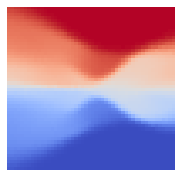

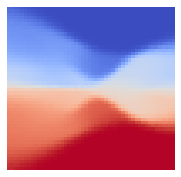

3 3 2100 23.463255260740784 24.810882568359375
3 3 2200 23.710511751462803 24.691303253173828
3 3 2300 23.973208719604536 24.681943893432617
3 3 2400 23.84786108795646 24.828697204589844
3 3 2500 24.196017382993393 24.795616149902344
3 3 2600 24.16946646452379 25.038331985473633
3 3 2700 23.886418568295053 24.938011169433594
3 3 2800 23.687309750634252 24.805830001831055
3 3 2900 24.38700040048962 24.862869262695312
3 3 3000 24.281156146343545 24.85087013244629


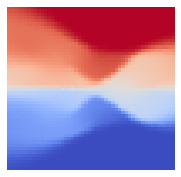

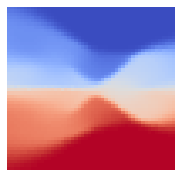

3 3 3100 23.809891307450453 24.779850006103516
3 3 3200 24.295702931455857 24.885385513305664
3 3 3300 24.338556449000407 24.987489700317383
3 3 3400 24.235752691508857 24.819307327270508
3 3 3500 24.202931355817224 25.00648307800293
3 3 3600 24.476515341931993 25.04546546936035
3 3 3700 24.32061703303636 25.05084228515625
3 3 3800 24.392044419300685 25.055400848388672
3 3 3900 24.47572121860449 24.943145751953125
3 3 4000 24.518749588991792 24.934797286987305


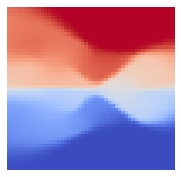

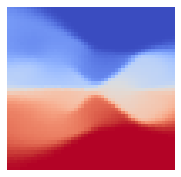

3 3 4100 24.698240889100465 25.23687171936035
3 3 4200 24.79358911565799 24.982685089111328


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



3 5 13100 25.41840632113979 25.697616577148438
3 5 13200 25.44618363802036 25.525283813476562
3 5 13300 25.59944458320448 25.812591552734375
3 5 13400 25.241127395194276 25.769601821899414
3 5 13500 25.53511573665356 25.71827507019043
3 5 13600 25.270546385987355 25.814794540405273
3 5 13700 25.67225379262889 25.824237823486328
3 5 13800 25.55554680562683 25.89099884033203
3 5 13900 25.041132170761188 25.796125411987305
3 5 14000 25.523106746272862 25.69538116455078


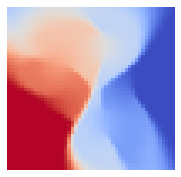

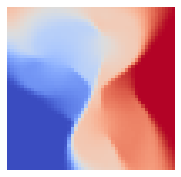

3 5 14100 25.679527185185048 25.884851455688477
3 5 14200 25.393416935696436 25.861631393432617
3 5 14300 25.39949792900549 25.85103416442871
3 5 14400 25.32097686005117 25.928281784057617
3 5 14500 25.363813378013788 25.825603485107422
3 5 14600 25.27555640563455 25.62114906311035
3 5 14700 25.54701787251924 25.69308090209961
3 5 14800 25.61275039883559 25.856613159179688
3 5 14900 25.465485449050856 25.942087173461914
3 5 15000 25.45603853851882 25.968555450439453


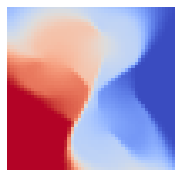

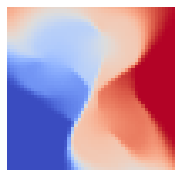

3 5 15100 25.49122524461102 25.840229034423828
3 5 15200 25.654736937701493 25.9608154296875
3 5 15300 25.274184296521284 25.808834075927734
3 5 15400 25.079845075848894 25.936311721801758
3 5 15500 25.78339948782675 25.96804428100586
3 5 15600 25.497813796866396 25.945999145507812
3 5 15700 25.649396640462435 25.934539794921875
3 5 15800 25.595257829025243 26.09433937072754
3 5 15900 25.509822787247096 25.843006134033203
3 5 16000 25.560027409722355 25.886131286621094


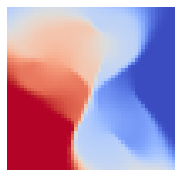

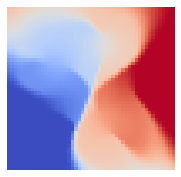

3 5 16100 25.574642193162404 25.865270614624023
3 5 16200 25.390522149744204 25.846511840820312
3 5 16300 25.395639023906416 25.672040939331055
3 5 16400 25.36172000092417 26.08023452758789
3 5 16500 25.81734036741434 26.04656219482422
3 5 16600 25.54780713882333 25.753875732421875
3 5 16700 25.440034646383573 25.96856117248535
3 5 16800 25.792955681385504 25.735551834106445
3 5 16900 25.58920597785665 25.94536018371582
3 5 17000 25.590359520916476 25.629308700561523


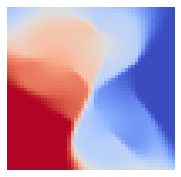

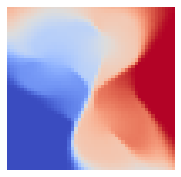

3 5 17100 25.690783336937226 25.72549819946289
3 5 17200 25.433669517205047 25.87806510925293
3 5 17300 25.691545889612563 25.91564178466797
3 5 17400 25.32925322794145 25.92675018310547
3 5 17500 25.158550711692786 25.8986873626709
3 5 17600 25.446006356665904 25.68706703186035
3 5 17700 25.297131303620823 25.989093780517578
3 5 17800 25.56873848120781 25.996679306030273
3 5 17900 25.82202010946967 25.88516616821289
3 5 18000 25.814758859472036 25.82328987121582


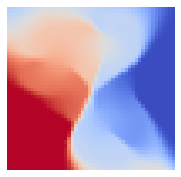

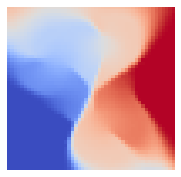

3 5 18100 25.255798034403536 25.856307983398438
3 5 18200 25.550864635059792 25.821884155273438
3 5 18300 25.444240828656447 25.785322189331055
3 5 18400 25.088289011046808 25.892925262451172
3 5 18500 25.625446658028775 26.094453811645508
3 5 18600 25.326212731286923 25.8409423828125
3 5 18700 25.530494278879146 25.983190536499023
3 5 18800 25.60766752383725 25.776229858398438
3 5 18900 25.582646567741733 25.939682006835938
3 5 19000 25.358443938634267 25.9124755859375


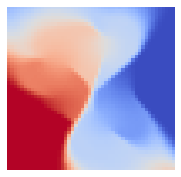

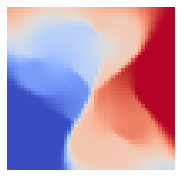

3 5 19100 25.780594556807596 25.882097244262695
3 5 19200 25.43959751427669 25.81242561340332
3 5 19300 25.442383017202204 25.76837158203125
3 5 19400 25.47145230230978 25.841136932373047
3 5 19500 25.470216189851985 25.789405822753906
3 5 19600 25.571295704033062 25.7916202545166
3 5 19700 25.59090836456178 26.020153045654297
3 5 19800 25.60967347450549 25.98796844482422
3 5 19900 25.321256138897233 25.813119888305664
3 5 20000 25.685061763360498 25.76802635192871


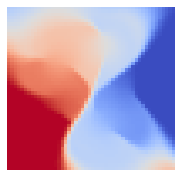

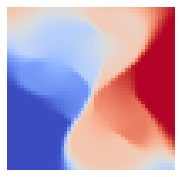

3 30 0 0.5650790429085292 3.7079851627349854


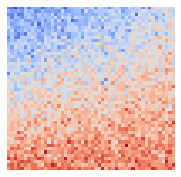

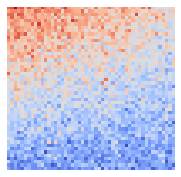

3 30 100 1.8548970884156146 9.959671020507812
3 30 200 5.869800824276705 12.417155265808105
3 30 300 10.34995625226759 14.027848243713379
3 30 400 12.727079435229616 14.872893333435059
3 30 500 14.123667946479726 15.572218894958496
3 30 600 14.866535105936395 16.181312561035156
3 30 700 15.822867229997343 17.67000961303711
3 30 800 17.94966671195407 20.122421264648438
3 30 900 19.642147517840097 21.644121170043945
3 30 1000 21.114976725553632 22.485036849975586


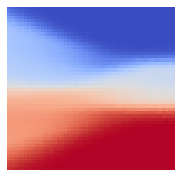

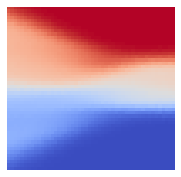

3 30 1100 21.94100098280926 23.219505310058594
3 30 1200 22.4011723802344 23.623638153076172
3 30 1300 22.480312719673467 23.790802001953125
3 30 1400 23.42576389704064 24.027158737182617
3 30 1500 23.243785800946156 24.229736328125
3 30 1600 23.590064856435205 24.43018341064453
3 30 1700 23.563722789972225 24.37416648864746
3 30 1800 23.597432960947852 24.55804443359375
3 30 1900 23.786300744749116 24.69659423828125
3 30 2000 24.085427816975955 24.546350479125977


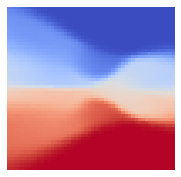

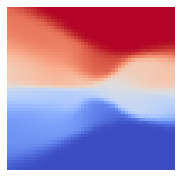

3 30 2100 23.82538521212767 24.719175338745117
3 30 2200 23.74440163230459 24.745771408081055
3 30 2300 24.197833909748653 24.800384521484375
3 30 2400 23.97923628565608 24.69229507446289
3 30 2500 23.98324575848086 24.78525733947754
3 30 2600 24.331120346160024 24.915910720825195
3 30 2700 24.131149406843985 24.904191970825195
3 30 2800 24.28805797660885 24.785511016845703
3 30 2900 24.29410011373063 24.902973175048828
3 30 3000 24.587957315557844 25.115432739257812


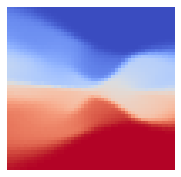

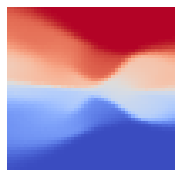

3 30 3100 24.42787468099468 25.067516326904297
3 30 3200 24.27865720779921 25.094999313354492
3 30 3300 24.65450096478363 25.05182456970215
3 30 3400 24.734486426296 24.83306121826172
3 30 3500 24.216113317351386 25.159826278686523
3 30 3600 24.56562229340794 25.105947494506836
3 30 3700 24.587792176761912 24.917316436767578
3 30 3800 24.45771623282441 25.282150268554688
3 30 3900 24.671104699309986 25.263011932373047
3 30 4000 24.66439714998107 25.126937866210938


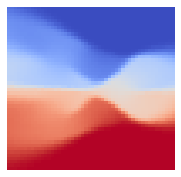

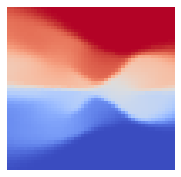

3 30 4100 24.437858292613498 25.15003776550293
3 30 4200 24.93184671552928 25.18065643310547
3 30 4300 24.4689262428542 25.150365829467773
3 30 4400 24.52893719559382 25.106313705444336
3 30 4500 24.669958441785276 25.195192337036133
3 30 4600 24.523327333555518 25.415908813476562
3 30 4700 24.598348917143085 25.107736587524414
3 30 4800 24.571071873673723 25.270639419555664
3 30 4900 24.96155469921524 25.219770431518555
3 30 5000 24.984836840930054 25.35730743408203


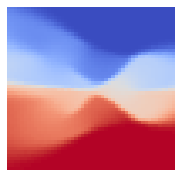

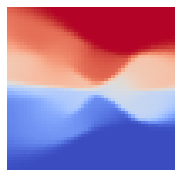

3 30 5100 24.896696437112652 25.452682495117188
3 30 5200 24.989545725125843 25.203182220458984
3 30 5300 24.766693348526296 25.237939834594727
3 30 5400 24.892009409522206 25.232707977294922
3 30 5500 24.520556401700233 25.223325729370117
3 30 5600 25.093447169908004 25.30854034423828
3 30 5700 24.785125752366437 25.39723777770996
3 30 5800 24.730914085578103 25.507375717163086
3 30 5900 24.63977204129345 25.2396183013916
3 30 6000 24.701869085587578 25.398555755615234


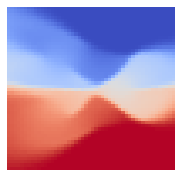

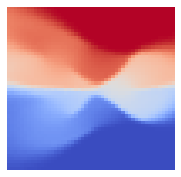

3 30 6100 24.743848338918365 25.125944137573242
3 30 6200 25.12090149473182 25.488445281982422
3 30 6300 25.04463651315135 25.50005531311035
3 30 6400 25.012529159900954 25.485185623168945
3 30 6500 24.93565705039426 25.341732025146484
3 30 6600 25.110599748079665 25.21920394897461
3 30 6700 24.93334025022779 25.504444122314453
3 30 6800 25.09763878111065 25.54444122314453
3 30 6900 25.17507916235629 25.410655975341797
3 30 7000 24.941502478067935 25.439470291137695


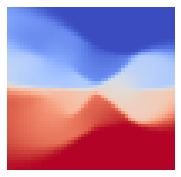

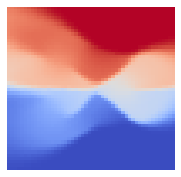

3 30 7100 24.79763258764664 25.286983489990234
3 30 7200 24.765899225198797 25.41229248046875
3 30 7300 24.76497153372753 25.450138092041016
3 30 7400 24.96321094419798 25.353511810302734
3 30 7500 24.79280956340072 25.6329345703125
3 30 7600 24.803446444668154 25.406124114990234
3 30 7700 24.85994091245909 25.225921630859375
3 30 7800 24.93666002572838 25.458946228027344
3 30 7900 24.958905192945203 25.333621978759766
3 30 8000 24.786692142416094 25.259429931640625


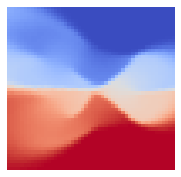

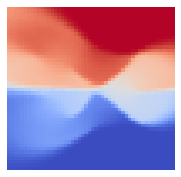

3 30 8100 24.86917168544939 25.642793655395508
3 30 8200 25.17079041068545 25.531248092651367
3 30 8300 24.99692840070872 25.423439025878906
3 30 8400 25.008789251875417 25.536067962646484
3 30 8500 25.18324867573155 25.430561065673828
3 30 8600 25.187433001399082 25.442916870117188
3 30 8700 24.66306146854338 25.580663681030273
3 30 8800 25.245760995527213 25.41716957092285
3 30 8900 25.295591627199922 25.497201919555664
3 30 9000 25.170554845050074 25.62215232849121


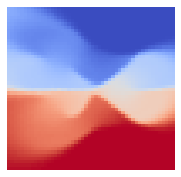

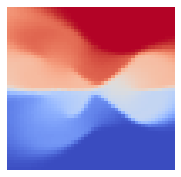

3 30 9100 25.099076460039946 25.459423065185547
3 30 9200 25.207334654820684 25.590373992919922
3 30 9300 25.213864922795143 25.431926727294922
3 30 9400 25.317389948263045 25.502883911132812
3 30 9500 25.1921564566651 25.299684524536133
3 30 9600 25.146719002666543 25.238805770874023
3 30 9700 25.321831696171294 25.675474166870117
3 30 9800 25.277885348359543 25.549896240234375
3 30 9900 25.298515555292614 25.536209106445312
3 30 10000 25.332033873843553 25.44682502746582


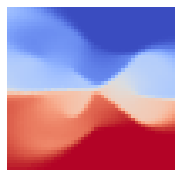

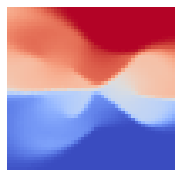

3 30 10100 25.350772270158508 25.33998680114746
3 30 10200 25.340582235044778 25.567590713500977
3 30 10300 25.117215013963794 25.705242156982422
3 30 10400 25.155279506426293 25.548303604125977
3 30 10500 25.309001868834343 25.642444610595703
3 30 10600 25.160148672394605 25.877090454101562
3 30 10700 24.987493632735205 25.44881820678711
3 30 10800 25.05006666532349 25.659446716308594
3 30 10900 24.968473529062482 25.675477981567383
3 30 11000 25.17678154906142 25.748809814453125


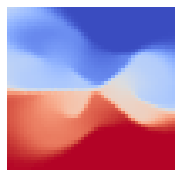

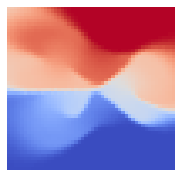

3 30 11100 25.16334216528654 25.698856353759766
3 30 11200 25.23034480322455 25.41486358642578
3 30 11300 24.784389913319856 25.631589889526367
3 30 11400 25.274395577039613 25.526399612426758
3 30 11500 25.10790895711064 25.5958194732666
3 30 11600 25.21347150389895 25.611291885375977
3 30 11700 25.257058431978376 25.550817489624023
3 30 11800 25.495917129224875 25.779882431030273
3 30 11900 25.241821949541876 25.755674362182617
3 30 12000 25.102024673249687 25.667736053466797


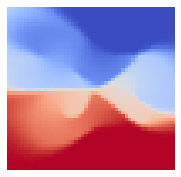

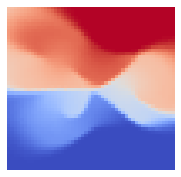

3 30 12100 25.413673151826952 25.608919143676758
3 30 12200 25.61599974749674 25.686649322509766
3 30 12300 25.157290314117944 25.603971481323242
3 30 12400 25.22044861802711 25.59319305419922
3 30 12500 25.422607646389256 25.61591148376465
3 30 12600 25.66249603259863 25.544343948364258
3 30 12700 25.18369552188525 25.769325256347656
3 30 12800 25.397156843721973 25.637258529663086
3 30 12900 25.260016359234935 25.685836791992188
3 30 13000 25.148154253084137 25.483083724975586


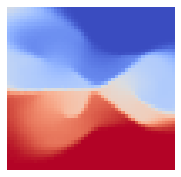

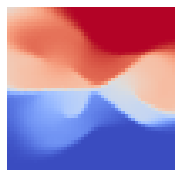

3 30 13100 25.50112142980846 25.57851219177246
3 30 13200 25.353931763886575 25.670255661010742
3 30 13300 25.619943650505487 25.60209083557129
3 30 13400 25.172055665283697 25.657054901123047
3 30 13500 25.654977360360277 25.757871627807617
3 30 13600 25.538134376702743 25.686519622802734
3 30 13700 25.257553848366175 25.915271759033203
3 30 13800 25.137259949575984 25.741729736328125
3 30 13900 25.381133523493087 25.702655792236328
3 30 14000 25.42172609664038 25.679168701171875


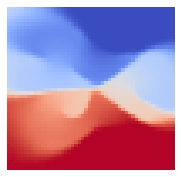

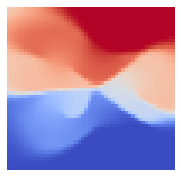

3 30 14100 25.360367319904544 25.78447723388672
3 30 14200 25.02719737059851 25.720897674560547
3 30 14300 25.484007707824077 25.703039169311523
3 30 14400 25.561664226611455 25.679107666015625
3 30 14500 25.53214809535018 25.694196701049805
3 30 14600 25.375598945317634 25.6350154876709
3 30 14700 25.459419026812032 25.59566879272461
3 30 14800 25.57949921657219 25.81094741821289
3 30 14900 25.313351333297806 25.62685203552246
3 30 15000 25.3078386117277 25.706775665283203


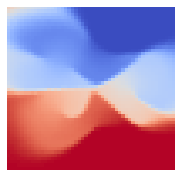

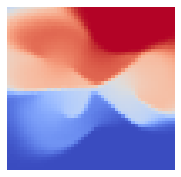

3 30 15100 25.847910472755537 25.71938705444336
3 30 15200 25.679731180168258 25.55504608154297
3 30 15300 25.473535965352575 25.625730514526367
3 30 15400 25.50742341768266 25.821800231933594
3 30 15500 25.399276934440344 25.76024055480957
3 30 15600 25.472974979148745 25.981929779052734
3 30 15700 25.459919300223238 25.594444274902344
3 30 15800 25.31563656281211 25.80430030822754
3 30 15900 25.29971038305142 25.860427856445312
3 30 16000 25.420120850403446 25.674711227416992


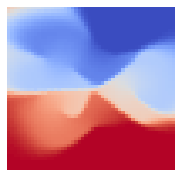

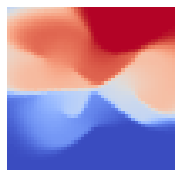

3 30 16100 25.521800206975627 25.744770050048828
3 30 16200 25.07572389148569 25.679590225219727
3 30 16300 25.598405180194785 25.837087631225586
3 30 16400 25.452077635928138 25.580923080444336
3 30 16500 25.701597499559117 25.80474281311035
3 30 16600 25.25357108917015 25.710628509521484
3 30 16700 25.289607774359062 25.64605712890625
3 30 16800 25.369758374667366 25.824085235595703
3 30 16900 25.051008927864988 25.649927139282227
3 30 17000 25.68906637916187 25.850767135620117


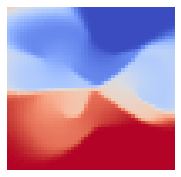

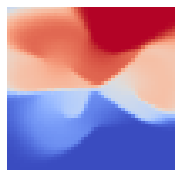

3 30 17100 25.54955809576256 25.721342086791992
3 30 17200 25.707207361597423 25.807214736938477
3 30 17300 25.448340156414307 25.6679630279541
3 30 17400 25.175086447891402 25.754884719848633
3 30 17500 25.43553704270611 25.624797821044922
3 30 17600 25.477645007157257 25.785303115844727
3 30 17700 25.382255495900747 25.897703170776367
3 30 17800 25.561525801444276 25.637842178344727
3 30 17900 25.53776281441189 25.814931869506836
3 30 18000 25.764141390006944 25.770401000976562


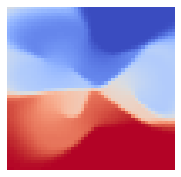

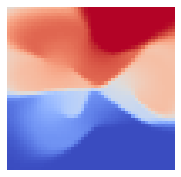

3 30 18100 25.613906370407122 25.71090316772461
3 30 18200 25.41423170951908 25.620302200317383
3 30 18300 25.58771244315814 25.70353126525879
3 30 18400 25.51059505396925 25.748985290527344
3 30 18500 25.216579998881212 25.745262145996094
3 30 18600 25.319667892242233 25.620817184448242
3 30 18700 25.46646171075622 25.688711166381836
3 30 18800 25.628227303930878 25.7928466796875
3 30 18900 25.423630049817017 25.668819427490234
3 30 19000 25.456329959923405 25.563573837280273


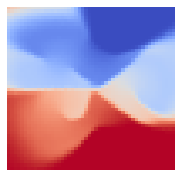

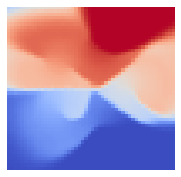

3 30 19100 25.571725550604828 25.76027488708496
3 30 19200 25.526953508813413 25.7967586517334
3 30 19300 25.52423843272734 25.840898513793945
3 30 19400 25.4456566509804 25.787721633911133
3 30 19500 25.553939130878188 25.951269149780273
3 30 19600 25.626260209449914 25.798702239990234
3 30 19700 25.320039454533084 25.87576675415039
3 30 19800 25.645525592804834 25.902393341064453
3 30 19900 25.203395608835347 25.75850486755371
3 30 20000 25.33006677936259 25.819753646850586


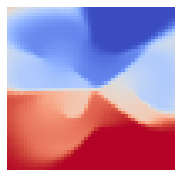

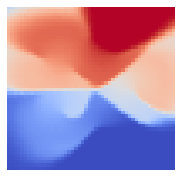

4 1 0 0.5665386163886655 3.2082037925720215


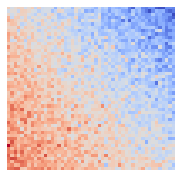

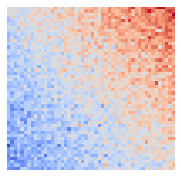

4 1 100 3.966047392727989 10.004886627197266
4 1 200 6.337084118229625 11.706474304199219
4 1 300 8.202026289966588 12.689587593078613
4 1 400 9.518404095243698 13.29007625579834
4 1 500 10.720335857916002 13.926162719726562
4 1 600 11.6089513615977 14.166116714477539
4 1 700 12.427115740720442 14.554832458496094
4 1 800 13.086626664418349 15.126509666442871
4 1 900 13.250213641371674 15.538297653198242
4 1 1000 13.590789337121782 16.09841537475586


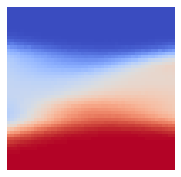

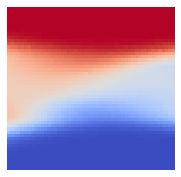

4 1 1100 14.628249537452252 17.279680252075195
4 1 1200 16.391826237754888 18.867408752441406
4 1 1300 17.44731692323834 19.56402015686035
4 1 1400 18.070329744523402 19.992107391357422
4 1 1500 18.901413805916178 20.672971725463867
4 1 1600 18.873170214788267 21.128971099853516
4 1 1700 19.821885311886817 21.196250915527344
4 1 1800 19.850222400715367 21.039213180541992
4 1 1900 19.637050071771526 21.376232147216797
4 1 2000 19.963820892735164 21.504732131958008


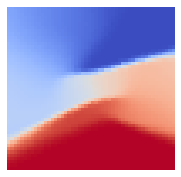

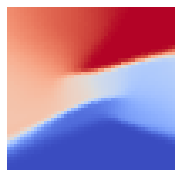

4 1 2100 19.949204895039266 21.683570861816406
4 1 2200 20.279465487322835 21.644758224487305
4 1 2300 20.125036428008663 21.480899810791016
4 1 2400 20.189340989442535 21.90142059326172
4 1 2500 20.19224548944159 21.69645118713379
4 1 2600 20.522757432686614 22.000930786132812
4 1 2700 20.431236540576002 21.93288230895996
4 1 2800 20.397407372526835 22.00756072998047
4 1 2900 20.837944252817913 22.001920700073242
4 1 3000 20.710619812642058 22.106534957885742


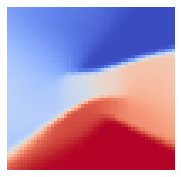

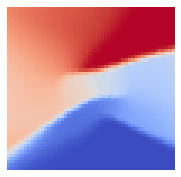

4 1 3100 21.064441825486504 22.102014541625977
4 1 3200 21.04740338736497 21.896148681640625
4 1 3300 20.88131747186731 22.27090072631836
4 1 3400 20.217137734416745 22.02092933654785
4 1 3500 20.65979349117034 22.1358642578125
4 1 3600 20.819633274563017 22.0087947845459
4 1 3700 21.212884603448114 22.072168350219727
4 1 3800 21.023970677924453 21.99087905883789
4 1 3900 21.005042857696516 22.264232635498047
4 1 4000 20.902372668348736 22.02883529663086


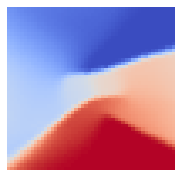

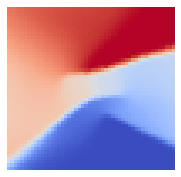

4 1 4100 21.168702690000988 22.094104766845703
4 1 4200 21.1099982765586 22.12189483642578
4 1 4300 20.93305934225177 21.808780670166016
4 1 4400 21.245540800343814 22.127532958984375
4 1 4500 21.16487292704237 22.260631561279297
4 1 4600 21.431210234229738 22.285064697265625
4 1 4700 21.167201869767364 22.042680740356445
4 1 4800 21.59075616770612 22.38179588317871
4 1 4900 21.122378829230147 22.361968994140625
4 1 5000 21.637968863760953 22.51253318786621


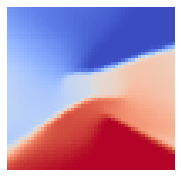

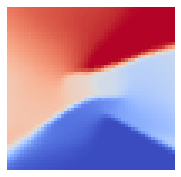

4 1 5100 21.029833105180067 22.084714889526367
4 1 5200 21.511496831193515 22.214786529541016
4 1 5300 21.649562578640115 22.274457931518555
4 1 5400 21.01150755585494 22.19645118713379
4 1 5500 21.87929735741133 22.140947341918945
4 1 5600 21.631550307324922 22.330219268798828
4 1 5700 20.915617771187225 22.520105361938477
4 1 5800 21.52387252684165 22.37818145751953
4 1 5900 21.603850702818907 22.28106117248535
4 1 6000 21.63932154478058 22.340721130371094


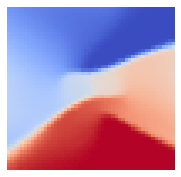

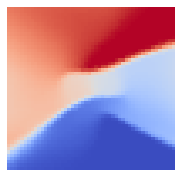

4 1 6100 21.55147499087947 22.285154342651367
4 1 6200 21.966218648352875 22.349750518798828
4 1 6300 21.576801939449805 22.365217208862305
4 1 6400 21.68147079393071 22.43068504333496
4 1 6500 21.492212019744954 22.425241470336914
4 1 6600 21.38771316108339 22.315155029296875
4 1 6700 21.58256722623722 22.47536277770996
4 1 6800 21.838646499983117 22.566259384155273
4 1 6900 21.765439014639103 22.282817840576172
4 1 7000 21.69896093522935 22.244224548339844


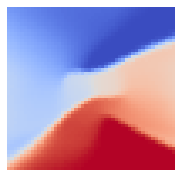

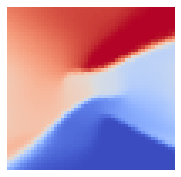

4 1 7100 21.632898131321138 22.495197296142578
4 1 7200 21.558053829088024 22.502004623413086
4 1 7300 21.62361878809674 22.52937126159668
4 1 7400 21.44024429777194 22.442909240722656
4 1 7500 21.28548010384249 22.266342163085938
4 1 7600 21.787013912625376 22.451292037963867
4 1 7700 22.044577007022966 22.524274826049805
4 1 7800 21.43478014643593 22.41672706604004
4 1 7900 21.760506707366467 22.31313705444336
4 1 8000 21.769499486209686 22.385168075561523


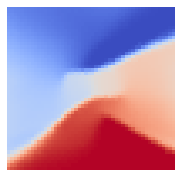

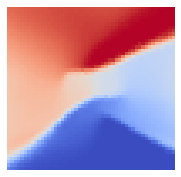

4 1 8100 21.457375019338258 22.63582420349121
4 1 8200 21.477213531455533 22.60105323791504
4 1 8300 21.615080140942332 22.452892303466797
4 1 8400 21.71417556106051 22.616455078125
4 1 8500 21.781654187292677 22.425668716430664
4 1 8600 21.524195518898402 22.468456268310547
4 1 8700 21.657319245025544 22.267229080200195
4 1 8800 21.909857748705708 22.488506317138672
4 1 8900 22.026006178015646 22.637020111083984
4 1 9000 21.556876000911153 22.29421043395996


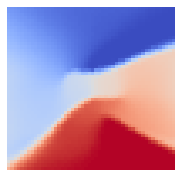

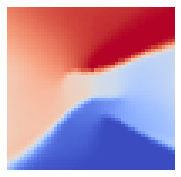

4 1 9100 21.581637106254245 22.37618064880371
4 1 9200 21.669248094519983 22.513931274414062
4 1 9300 21.555586461195855 22.3879337310791
4 1 9400 21.489751937387897 22.547897338867188
4 1 9500 21.983242515404175 22.333532333374023
4 1 9600 21.747188749176832 22.43920135498047
4 1 9700 21.781688186456545 22.26983642578125
4 1 9800 21.73601759533432 22.542770385742188
4 1 9900 21.91953779636141 22.325443267822266
4 1 10000 21.786601065635544 22.429872512817383


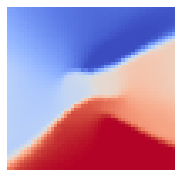

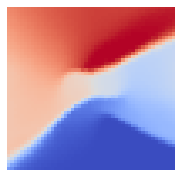

4 1 10100 21.68203663715795 22.45210838317871
4 1 10200 21.76830465845088 22.556381225585938
4 1 10300 21.9364062386636 22.435894012451172
4 1 10400 21.8521368825038 22.538883209228516
4 1 10500 21.89165605347753 22.410531997680664
4 1 10600 21.549318472485524 22.354658126831055
4 1 10700 21.728938483714558 22.212974548339844
4 1 10800 21.78752632859511 22.461666107177734
4 1 10900 21.66465577888603 22.39087677001953
4 1 11000 21.6423596129234 22.49808692932129


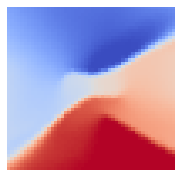

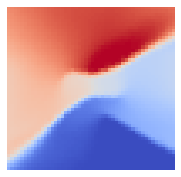

4 1 11100 21.6827069063885 22.512765884399414
4 1 11200 21.601283765946835 22.251630783081055
4 1 11300 21.692719660147777 22.481414794921875
4 1 11400 21.784342549749994 22.631731033325195
4 1 11500 22.005298258708017 22.49803924560547
4 1 11600 21.904279457319568 22.585956573486328
4 1 11700 22.177788159571485 22.52313232421875
4 1 11800 21.719916562730877 22.71269989013672
4 1 11900 21.92041934611029 22.50833511352539
4 1 12000 21.692054247940636 22.57840919494629


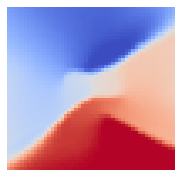

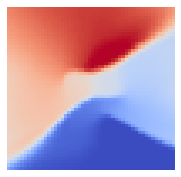

4 1 12100 22.182990031643364 22.483125686645508
4 1 12200 21.986914425101975 22.35116195678711
4 1 12300 21.756509377100212 22.66184425354004
4 1 12400 22.268942346414658 22.638975143432617
4 1 12500 21.693402071936852 22.57195281982422
4 1 12600 21.91462977420582 22.64447784423828
4 1 12700 22.171882019105183 22.565147399902344
4 1 12800 21.603350429407698 22.624828338623047
4 1 12900 21.929749688080488 22.517004013061523
4 1 13000 21.915032907148834 22.569128036499023


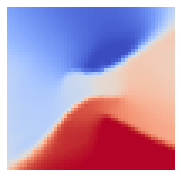

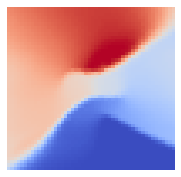

4 1 13100 21.70919711206548 22.515058517456055
4 1 13200 21.647357490012073 22.29571533203125
4 1 13300 22.031977888297977 22.63393783569336
4 1 13400 21.73991778513238 22.453283309936523
4 1 13500 21.90223707897575 22.518247604370117
4 1 13600 21.75300017768664 22.763620376586914
4 1 13700 21.848445544712362 22.527368545532227
4 1 13800 21.849713227822317 22.57598304748535
4 1 13900 21.80094142725294 22.609973907470703
4 1 14000 21.637087314012078 22.5617733001709


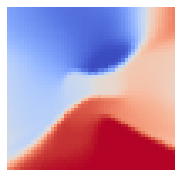

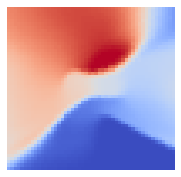

4 1 14100 21.936950225285496 22.619653701782227
4 1 14200 21.983456224434207 22.53921890258789
4 1 14300 22.000552946836656 22.631811141967773
4 1 14400 22.11562797397303 22.59354591369629
4 1 14500 21.825806958599344 22.336669921875
4 1 14600 21.755037699007048 22.449600219726562
4 1 14700 22.18238776074055 22.626548767089844
4 1 14800 21.955618194761012 22.592966079711914
4 1 14900 22.084936443046587 22.447528839111328
4 1 15000 21.88698116844561 22.439069747924805


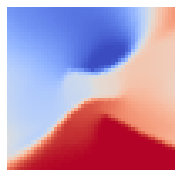

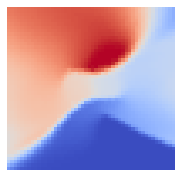

4 1 15100 21.767255541394366 22.488922119140625
4 1 15200 21.819356831511147 22.820241928100586
4 1 15300 21.879559636675456 22.578733444213867
4 1 15400 21.987931971506324 22.86685562133789
4 1 15500 21.947366111987787 22.416400909423828
4 1 15600 21.6982906659988 22.664878845214844
4 1 15700 22.225063996930643 22.581771850585938
4 1 15800 21.90943275915735 22.478410720825195
4 1 15900 21.94848079886033 22.44210433959961
4 1 16000 21.811369456513752 22.701086044311523


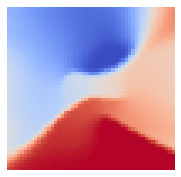

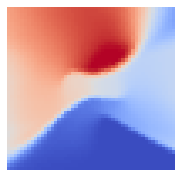

4 1 16100 21.859808550979558 22.458415985107422
4 1 16200 21.69960449083115 22.398088455200195
4 1 16300 21.940894128294243 22.593204498291016
4 1 16400 21.93369601960094 22.469724655151367
4 1 16500 22.1400782298179 22.594154357910156
4 1 16600 21.808761234942697 22.549762725830078
4 1 16700 22.020243319739933 22.566097259521484
4 1 16800 21.72441902343175 22.60709571838379
4 1 16900 21.63008591476687 22.447263717651367
4 1 17000 22.146506500300752 22.706056594848633


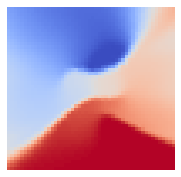

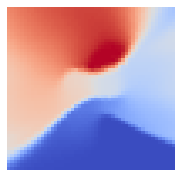

4 1 17100 22.06053961445923 22.499225616455078
4 1 17200 22.108949566784574 22.63848114013672
4 1 17300 21.74079690636955 22.59027099609375
4 1 17400 21.99454480887875 22.639667510986328
4 1 17500 21.900942682237044 22.791810989379883
4 1 17600 22.07412713744811 22.577592849731445
4 1 17700 22.34567360224247 22.572704315185547
4 1 17800 22.21683377076276 22.704294204711914
4 1 17900 21.91133185531058 22.25469970703125
4 1 18000 21.920356204805962 22.488588333129883


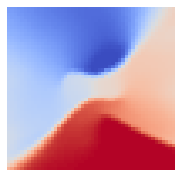

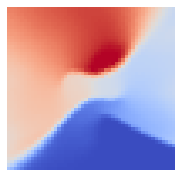

4 1 18100 21.866399531746637 22.48286247253418
4 1 18200 21.785979366639094 22.381187438964844
4 1 18300 21.78278587374716 22.349853515625
4 1 18400 22.30467061061705 22.598426818847656
4 1 18500 22.09972122230598 22.78168487548828


In [ ]:
torch.cuda.set_device(6)

def gauss(A,B,var):
    return torch.exp(-((A.unsqueeze(1) - B.unsqueeze(0))**2).mean(2)/(2*var))

torch.manual_seed(2)
np.random.seed(2)

for set_index in range(0, 6):
    for center in [1, 3, 5, 30]:
    
        train_data = save_dataset[set_index]
        data_dim = train_data.shape[1]
        center_dim = center

        # dim = 10

        E = encoder(input_dim = data_dim, out_dim = 1).cuda()
        D = decoder(input_dim = 1, out_dim = data_dim*center_dim*3).cuda()

        optimizer_E = optim.Adam([
              {'params': E.parameters(), 'lr': 0.00001, 'betas': (0.5, 0.9)},
           ])

        optimizer_D = optim.Adam([
              {'params': D.parameters(), 'lr': 0.00001, 'betas': (0.5, 0.9)},
           ])

        elbo_curve = []
        pdf_curve = []

        var_noise = 0.001
        # batch_data = torch.zeros((5000, data_dim)).float().cuda().uniform_()

        for i in range(0, 20001):

        #     batch_data = torch.zeros((10000, data_dim)).float().cuda().uniform_()

            batch_data = torch.from_numpy(train_data[:5000]).float().cuda()

            # apply encoders

        #     encoded = E(batch_data)
        #     decoded = D(encoded)

            encoded = E(batch_data)
            noise_encoded = encoded + torch.zeros((encoded.shape)).cuda().normal_()*np.sqrt(var_noise)
            decoded = D(noise_encoded)

        #     error = ((decoded - batch_data)**2).mean()  
        #     error.backward()
        #     elbo_curve.append(error.item())

        #     error = get_cost()
            error = get_cost_nd()
            error.backward()
            elbo_curve.append(error.item())

            optimizer_D.step()
            optimizer_E.step()

            optimizer_D.zero_grad()
            optimizer_E.zero_grad()


            if i%1 == 0:
                E.eval()
                pxy_mean = 0
                py_mean = 0

                with torch.no_grad():

                    # sample X_m 
                    X_m = batch_data.detach()
                    Y_m = encoded.detach()

                    Y_m_hat = Y_m + torch.zeros((Y_m.shape)).cuda().normal_()*np.sqrt(var_noise)

                    for n in range(0, 1):
        #                 X_n = torch.zeros((10000, data_dim)).float().cuda().uniform_()
                        X_n = X_m
                        Y_n = E(X_n)

                        gram_x = torch.exp(-((X_m.unsqueeze(1) - X_n.unsqueeze(0))**2).sum(-1)/(2*(0.001*2)))
                        gram_y = torch.exp(-((Y_m_hat.unsqueeze(1) - Y_n.unsqueeze(0))**2).sum(-1)/(2*(0.001)))

                        pxy = (gram_x*gram_y).mean(1)
                        py = gram_y.mean(1)

                        pxy_mean = (pxy_mean*n+pxy)/(n+1)
                        py_mean = (py_mean*n+py)/(n+1)

                pdf_error = (pxy_mean/py_mean).mean().detach().cpu()
                pdf_error = pdf_error*(1/(2*np.pi*(0.001*2))**((data_dim)/2))
                E.train()

                pdf_curve.append(pdf_error.item())

            if i % 100 == 0:

                print(set_index, center_dim, i, -error.item()*(1/((2*np.pi)**(data_dim/2))), pdf_error.item()) 

                if i % 1000 == 0:

                    output_mean = 0

                    grid_size = 50
                    x = np.linspace(0.0, 1, grid_size)
                    y = np.linspace(0.0, 1, grid_size)
                    X, Y = np.meshgrid(x, y)
                    grid_points = np.column_stack([X.flatten(), Y.flatten()])
                    grid_points = torch.from_numpy(grid_points)

                    for n in range(0, 100):

                        E.eval()
                        with torch.no_grad():
                            output = E(grid_points.cuda().float()).detach().cpu().numpy()
                        E.train() 

                        output_mean = (output_mean*n+output)/(n+1)

                    plt.figure(figsize=(3, 3))
                    heatmap_extent = [0, 1, 0, 1]

                    plt.imshow(output_mean.reshape(-1).reshape(50, 50), cmap='coolwarm', extent=[0, 1, 0, 1], origin='lower', aspect='auto', zorder=1)
                    plt.axis('off')
                    plt.savefig('./save_figure_new/mixture_decoder_center_{0}.png'.format(center), dpi=500, bbox_inches='tight')                
                    plt.show()

                    plt.figure(figsize=(3, 3))
                    heatmap_extent = [0, 1, 0, 1]

                    plt.imshow(-output_mean.reshape(-1).reshape(50, 50), cmap='coolwarm', extent=[0, 1, 0, 1], origin='lower', aspect='auto', zorder=1)
                    plt.axis('off')
                    plt.savefig('./save_figure_new/mixture_decoder_center_{0}_negative.png'.format(center), dpi=500, bbox_inches='tight')                
                    plt.show()              
                    
        np.save('./save_figure_new/cost_curve_{0}_center_{1}'.format(set_index, center), np.array(pdf_curve))
        to_save_bound = -np.array(elbo_curve)*(1/((2*np.pi)**(data_dim/2)))
        np.save('./save_figure_new/bound_{0}_center_{1}'.format(set_index, center), to_save_bound)
                    

In [ ]:
!nvidia-smi